In [ ]:


import requests
import zipfile
import io

url = "https://api.pharmgkb.org/v1/download/file/data/clinicalVariants.zip"

# Download the zip file
try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    # Unpack the zip file
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("clinicalVariants")
        print("Successfully downloaded and unpacked the zip file.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except zipfile.BadZipFile as e:
    print(f"Error unpacking the zip file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully downloaded and unpacked the zip file.


In [ ]:
import requests
import zipfile
import io

url = "https://api.pharmgkb.org/v1/download/file/data/variantAnnotations.zip"


# Download the zip file
try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    # Unpack the zip file
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall("variantAnnotations")
        print("Successfully downloaded and unpacked the zip file.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the file: {e}")
except zipfile.BadZipFile as e:
    print(f"Error unpacking the zip file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Successfully downloaded and unpacked the zip file.


# Imports and installs


In [ ]:
!pip install openai biopython playwright


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 11.0 MB/s eta 0:00:00


In [ ]:
!playwright install

164.5 MiB [] 0% 0.0s164.5 MiB [] 0% 33.9s164.5 MiB [] 0% 42.2s164.5 MiB [] 0% 19.6s164.5 MiB [] 0% 14.2s164.5 MiB [] 0% 12.6s164.5 MiB [] 0% 11.1s164.5 MiB [] 1% 9.8s164.5 MiB [] 1% 9.5s164.5 MiB [] 1% 8.9s164.5 MiB [] 1% 9.4s164.5 MiB [] 2% 9.3s164.5 MiB [] 2% 9.1s164.5 MiB [] 2% 9.6s164.5 MiB [] 2% 9.7s164.5 MiB [] 2% 10.0s164.5 MiB [] 2% 9.9s164.5 MiB [] 3% 10.4s164.5 MiB [] 3% 10.5s164.5 MiB [] 3% 10.9s164.5 MiB [] 3% 10.8s164.5 MiB [] 3% 10.7s164.5 MiB [] 3% 10.8s164.5 MiB [] 4% 10.5s164.5 MiB [] 4% 11.1s164.5 MiB [] 4% 11.6s164.5 MiB [] 4% 11.7s164.5 MiB [] 4% 11.6s164.5 MiB [] 4% 11.4s164.5 MiB [] 5% 11.1s164.5 MiB [] 5% 10.8s164.5 MiB [] 5% 10.9s164.5 MiB [] 5% 11.0s164.5 MiB [] 5% 11.1s164.5 MiB [] 5% 11.4s164.5 MiB [] 5% 11.7s164.5 MiB [] 5% 12.1s164.5 MiB [] 6% 12.0s164.5 MiB [] 6% 12.1s164.5 MiB [] 6% 11.9s164.5 MiB [] 6% 11.8s164.5 MiB [] 7% 11.7s164.5 MiB [] 7% 11.6s164.5 MiB [] 7% 11.5s164.5 MiB [] 7% 11.4s164.5 MiB [] 7% 11.2s164.5 MiB [] 8% 11.1s164.5 MiB [] 8% 11.0s16

In [ ]:
import pandas as pd

from openai import OpenAI
import nest_asyncio
import time
import asyncio
from playwright.async_api import async_playwright


from Bio import Entrez

# the following should be used in


In [ ]:
client = OpenAI(
    api_key =



)





#Loading the data



In [ ]:
# can be arbitrary

# load data

var_drug_ann= "/content/variantAnnotations/var_drug_ann.tsv"
df_var_drug_ann=pd.read_csv(var_drug_ann, sep='\t')



In [ ]:
df_var_drug_ann.columns

Index(['Variant Annotation ID', 'Variant/Haplotypes', 'Gene', 'Drug(s)',
       'PMID', 'Phenotype Category', 'Significance', 'Notes', 'Sentence',
       'Alleles', 'Specialty Population', 'Metabolizer types', 'isPlural',
       'Is/Is Not associated', 'Direction of effect', 'PD/PK terms',
       'Multiple drugs And/or', 'Population types',
       'Population Phenotypes or diseases',
       'Multiple phenotypes or diseases And/or',
       'Comparison Allele(s) or Genotype(s)', 'Comparison Metabolizer types'],
      dtype='object')

In [ ]:
# prompt: generate a dictionary with unique values for each column

import pandas as pd

# Assuming df_var_drug_ann is already loaded as in your previous code

def create_unique_value_dict(df):
  """
  Generates a dictionary with unique values for each column of a Pandas DataFrame.

  Args:
    df: The input Pandas DataFrame.

  Returns:
    A dictionary where keys are column names and values are lists of unique values
    for that column. Returns an empty dictionary if the input is invalid.
  """
  unique_dict = {}
  if not isinstance(df, pd.DataFrame):
      print("Invalid input: Input must be a Pandas DataFrame.")
      return unique_dict

  for col in df.columns:
      unique_dict[col] = df[col].unique().tolist()
  return unique_dict

# Example usage (assuming df_var_drug_ann is your DataFrame):
unique_values_per_column = create_unique_value_dict(df_var_drug_ann)

# Print or further process the dictionary
for col, values in unique_values_per_column.items():
 print(f"Column: {col}")
 print(f"Unique Values: {values}")
 print("-" * 20)


Column: Variant Annotation ID
Unique Values: [1451834452, 1451159680, 1451306860, 1448997750, 1448631821, 1451159740, 982047744, 1449191920, 1449192330, 982047720, 1449192352, 1451307925, 1451307920, 1183960706, 1451308040, 1451308140, 1451308160, 1451161620, 1451308144, 1451161780, 1451330400, 1451330363, 1449716734, 1451308122, 1451161820, 1451161371, 1451161360, 1451205960, 1184989377, 1451151724, 1184989363, 981240165, 1445388514, 1451162800, 1451151829, 1451207769, 1451151848, 1451151860, 1451865260, 1451335582, 1451163180, 1451163194, 1451154280, 1451163221, 1451334662, 1451206740, 1451163505, 1451334680, 1451334722, 1451334781, 1451334860, 1451335308, 1451866750, 1451206853, 1451206861, 1451206834, 1451335158, 1451866940, 1451335303, 1451335460, 1451335452, 1451335520, 1451866947, 1451335433, 1451206886, 1451335447, 1451335416, 1451164240, 1451317820, 1451317900, 1451155580, 1451341440, 1451317880, 1451155780, 1451341447, 1451164700, 1451207688, 1451164800, 1449310660, 145116496

In [ ]:



phenotype_category_enum = df_var_drug_ann['Phenotype Category'].unique().tolist()

significance_enum = df_var_drug_ann['Significance'].unique().tolist()
metabolizer_types_enum = df_var_drug_ann['Metabolizer types'].unique().tolist()
specialty_population_enum = df_var_drug_ann['Population types'].unique().tolist()
{
    'Phenotype Category': phenotype_category_enum,
    'Significance': significance_enum,
    'Metabolizer types': metabolizer_types_enum,
    'Specialty Population': specialty_population_enum
}

{'Phenotype Category': ['Other, Metabolism/PK',
  'Dosage',
  'Metabolism/PK',
  nan,
  'Efficacy',
  'Toxicity, Metabolism/PK',
  'PD',
  'Other',
  'Dosage, Efficacy',
  'Toxicity',
  'Dosage, Metabolism/PK',
  'Dosage, Toxicity',
  'PD, Metabolism/PK',
  'Dosage, Other',
  'Dosage, Efficacy, Toxicity',
  'Efficacy, Metabolism/PK',
  'Efficacy, Toxicity',
  'Efficacy, Toxicity, Metabolism/PK',
  'Efficacy, Other',
  'Dosage, Efficacy, Toxicity, Metabolism/PK',
  'Toxicity, Other'],
 'Significance': ['not stated', 'no', 'yes'],
 'Metabolizer types': [nan,
  'slow acetylator',
  'poor metabolizer',
  'intermediate metabolizer',
  'ultrarapid metabolizer',
  'low activity',
  'normal metabolizer',
  'rapid acetylator',
  'high activity',
  'poor metabolizer and ultrarapid metabolizer',
  'intermediate metabolizer and poor metabolizer',
  'deficiency',
  'intermediate activity',
  'rapid metabolizer',
  'normal metabolizer and intermediate metabolizer',
  'low activity and intermediate a

# Isolate the first 100 samples.

In [ ]:
# testdf=df_var_drug_ann.iloc[:100]



NameError: name 'testdf' is not defined

Get PMCID

In [ ]:
# #table extraction is the first step.

# # couple of things I should do in the short period of time.

# from Bio import Entrez

# Entrez.email = "aron7628@gmail.com"  # Your email address

# # Function to get PMCID from PMID
# def get_pmcid_from_pmid(pmid):
#     handle = Entrez.elink(dbfrom="pubmed", db="pmc", id=pmid, linkname="pubmed_pmc")

#     record = Entrez.read(handle)
#     handle.close()

#     try:
#         pmcid = record[0]['LinkSetDb'][0]['Link'][0]['Id']
#         return pmcid
#     except (IndexError, KeyError):
#         return None

# # Example usage
# pmid = "26479518"  # The PMID you provided
# pmcid = get_pmcid_from_pmid(pmid)

# if pmcid:
#     print(f"The PMCID for PMID {pmid} is {pmcid}")
# else:
#     print(f"PMCID not found for PMID {pmid}")


The PMCID for PMID 26479518 is 4724253


In [ ]:

# import logging
# import http.client
# from Bio import Entrez

# # Enable HTTP debugging
# http.client.HTTPConnection.debuglevel = 1

# # Configure logging to show requests and responses
# logging.basicConfig(level=logging.DEBUG)
# logging.getLogger("http.client").setLevel(logging.DEBUG)
# logging.getLogger("urllib3").setLevel(logging.DEBUG)
# logging.getLogger("Bio.Entrez").setLevel(logging.DEBUG)

# # Set your email
# Entrez.email = "aron7628@gmail.com"

# # Function to get PMCID from PMID
# def get_pmcid_from_pmid(pmid):
#     try:
#         handle = Entrez.elink(dbfrom="pubmed", db="pmc", id=pmid, linkname="pubmed_pmc")
#         record = Entrez.read(handle)
#         handle.close()
#         if record and 'LinkSetDb' in record[0] and record[0]['LinkSetDb']:
#             pmcid = record[0]['LinkSetDb'][0]['Link'][0]['Id']
#             return pmcid
#         else:
#             print(f"No PMCID found for PMID {pmid}.")
#             return None
#     except Exception as e:
#         print(f"An error occurred: {e}")
#         return None

# # Example usage
# pmid = "26479518"
# pmcid = get_pmcid_from_pmid(pmid)
# if pmcid:
#     print(f"The PMCID for PMID {pmid} is {pmcid}")
# else:
#     print(f"PMCID not found for PMID {pmid}")


The PMCID for PMID 26479518 is 4724253


In [ ]:
# import nest_asyncio
# nest_asyncio.apply()
# import time
# import asyncio
# from playwright.async_api import async_playwright
# from Bio import Entrez
# import pandas as pd
# from bs4 import BeautifulSoup
# from tqdm import tqdm
# import random
# # Email for NCBI
# Entrez.email = "aron7628@gmail.com"

# # Step 1: Function to get PMCID from PMID

# def get_pmcid_from_pmid(pmid):
#     try:
#         handle = Entrez.elink(dbfrom="pubmed", db="pmc", id=pmid, linkname="pubmed_pmc")
#         record = Entrez.read(handle)
#         handle.close()
#         if record and 'LinkSetDb' in record[0] and record[0]['LinkSetDb']:
#             pmcid = record[0]['LinkSetDb'][0]['Link'][0]['Id']
#             return pmcid
#         else:
#             print(f"No PMCID found for PMID {pmid}.")
#             return None
#     except Exception as e:
#         print(f"An error occurred for pmid {pmid}: {e}")
#         return None


# # Step 2: Function to fetch content using PMCID
# # async def fetch_content(pmcid):
# #     async with async_playwright() as playwright:

# #         browser = await playwright.chromium.launch()
# #         page = await browser.new_page()

# #         # Build the URL from the PMCID
# #         url = f"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC{pmcid}/"
# #         await page.goto(url, wait_until="networkidle")

# #         # Fetch the content and title
# #         content = await page.content()
# #         title = await page.title()

# #         # Close the browser
# #         await browser.close()

# #         return content, title
# def fetch_pmc_content(pmcid):
#     try:
#         handle = Entrez.efetch(db="pmc", id=pmcid, rettype="full", retmode="xml")
#         record = handle.read()
#         handle.close()
#         print(record)
#         return record
#     except Exception as e:
#         print(f"An error occurred while fetching content for PMCID {pmcid}: {e}")
#         return None

# # Function to process each row in the DataFrame
# def process_row(row, processed_pmids, processed_data):
#     time.sleep(0.4+random.uniform(0,0.5))
#     pmid = str(row['PMID'])
#     if pmid in processed_pmids:
#         # Use the previously processed data for duplicate PMIDs
#         return pd.Series(processed_data[pmid])

#     pmcid = get_pmcid_from_pmid(pmid)
#     if pmcid:
#         content, title = asyncio.run(fetch_content(pmcid))
#         soup = BeautifulSoup(content, 'html.parser')
#         clean_text = soup.get_text()

#         # Save processed data for this PMID
#         processed_pmids.add(pmid)
#         processed_data[pmid] = {
#             'PMCID': pmcid,
#             'Title': title,
#             'Content': content,
#             "Content_text": clean_text,
#         }
#         return pd.Series(processed_data[pmid])
#     else:
#         # Save processed data for invalid PMIDs
#         processed_pmids.add(pmid)
#         processed_data[pmid] = {
#             'PMCID': None,
#             'Title': None,
#             'Content': None,
#             "Content_text": None,
#         }
#         return pd.Series(processed_data[pmid])

# # Wrapper function to handle processed PMIDs and data
# def process_dataframe(df):
#     processed_pmids = set()
#     processed_data = {}

#     tqdm.pandas(desc="Processing rows")  # Initialize tqdm for Pandas
#     return df.progress_apply(lambda row: process_row(row, processed_pmids, processed_data), axis=1)

# # Apply the function to each row and store the results in new columns
# testdf=df_var_drug_ann
# result_df = process_dataframe(testdf)

# # Combine the results back with the original DataFrame
# df_new = pd.concat([testdf, result_df], axis=1)

# # Display the updated DataFrame




Processing rows:   0%|          | 2/12232 [00:01<1:58:04,  1.73it/s]

No PMCID found for PMID 15634941.


Processing rows:   0%|          | 3/12232 [00:01<2:12:50,  1.53it/s]

No PMCID found for PMID 22248286.


Processing rows:   0%|          | 4/12232 [00:02<2:37:00,  1.30it/s]

No PMCID found for PMID 33350885.


Processing rows:   0%|          | 5/12232 [00:04<3:07:20,  1.09it/s]

No PMCID found for PMID 16495778.


Processing rows:   0%|          | 6/12232 [00:04<2:58:52,  1.14it/s]

No PMCID found for PMID 28470111.


Processing rows:   0%|          | 7/12232 [00:05<2:53:13,  1.18it/s]

An error occurred for pmid 19088262: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   0%|          | 8/12232 [00:06<2:53:26,  1.17it/s]

No PMCID found for PMID 19692698.


Processing rows:   0%|          | 9/12232 [00:07<3:12:24,  1.06it/s]

No PMCID found for PMID 28325531.


Processing rows:   0%|          | 10/12232 [00:08<3:00:24,  1.13it/s]

No PMCID found for PMID 27334259.


Processing rows:   0%|          | 11/12232 [00:09<2:53:16,  1.18it/s]

An error occurred for pmid 16920476: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:   0%|          | 13/12232 [00:10<2:42:05,  1.26it/s]

No PMCID found for PMID 32371615.


Processing rows:   0%|          | 15/12232 [00:12<2:53:42,  1.17it/s]

No PMCID found for PMID 22293084.


Processing rows:   0%|          | 16/12232 [00:13<2:50:30,  1.19it/s]

No PMCID found for PMID 33165168.


Processing rows:   0%|          | 17/12232 [00:14<3:07:37,  1.09it/s]

An error occurred for pmid 32815870: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:   0%|          | 18/12232 [00:18<3:24:29,  1.00s/it]


KeyboardInterrupt: 

In [ ]:
# from Bio import Entrez
# from bs4 import BeautifulSoup
# import pandas as pd
# import time
# import random

# # Function to fetch PMC content using Entrez's efetch
# def fetch_pmc_content(pmcid):
#     try:
#         handle = Entrez.efetch(db="pmc", id=pmcid, rettype="full", retmode="xml")
#         record = handle.read()
#         handle.close()
#         return record
#     except Exception as e:
#         print(f"An error occurred while fetching content for PMCID {pmcid}: {e}")
#         return None

# # Function to process each row in the DataFrame
# def process_row(row, processed_pmids, processed_data):
#     time.sleep(0.4 + random.uniform(0, 0.5))  # Introduce delay to avoid throttling
#     pmid = str(row['PMID'])

#     if pmid in processed_pmids:
#         # Use the previously processed data for duplicate PMIDs
#         return pd.Series(processed_data[pmid])

#     # Step 1: Get PMCID from PMID
#     pmcid = get_pmcid_from_pmid(pmid)

#     if pmcid:
#         # Step 2: Fetch PMC content using the new fetch_pmc_content function
#         xml_content = fetch_pmc_content(pmcid)

#         if xml_content:
#             # Step 3: Parse the XML content to extract text and title using BeautifulSoup
#             soup = BeautifulSoup(xml_content, 'xml')

#             # Extract the article title
#             title_tag = soup.find('article-title')
#             title = title_tag.get_text() if title_tag else "No Title Found"

#             # Extract the full text of the article
#             clean_text = soup.get_text()

#             # Save processed data for this PMID
#             processed_pmids.add(pmid)
#             processed_data[pmid] = {
#                 'PMCID': pmcid,
#                 'Title': title,
#                 'Content': xml_content,
#                 'Content_text': clean_text,
#             }
#         else:
#             # Save processed data for failed PMC content fetch
#             processed_pmids.add(pmid)
#             processed_data[pmid] = {
#                 'PMCID': pmcid,
#                 'Title': None,
#                 'Content': None,
#                 'Content_text': None,
#             }
#     else:
#         # Save processed data for invalid PMIDs
#         processed_pmids.add(pmid)
#         processed_data[pmid] = {
#             'PMCID': None,
#             'Title': None,
#             'Content': None,
#             'Content_text': None,
#         }

#     # Return the processed data for the current row
#     return pd.Series(processed_data[pmid])

# # Wrapper function to handle processed PMIDs and data
# def process_dataframe(df):
#     processed_pmids = set()
#     processed_data = {}

#     tqdm.pandas(desc="Processing rows")  # Initialize tqdm for Pandas
#     return df.progress_apply(lambda row: process_row(row, processed_pmids, processed_data), axis=1)

# # Apply the function to each row and store the results in new columns
# testdf = df_var_drug_ann
# result_df = process_dataframe(testdf)

# # Combine the results back with the original DataFrame
# df_new = pd.concat([testdf, result_df], axis=1)




Processing rows:   0%|          | 2/12232 [00:00<1:40:18,  2.03it/s]

No PMCID found for PMID 15634941.


Processing rows:   0%|          | 3/12232 [00:02<2:34:21,  1.32it/s]

An error occurred for pmid 22248286: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:   0%|          | 4/12232 [00:03<2:53:23,  1.18it/s]

An error occurred for pmid 33350885: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:   0%|          | 5/12232 [00:04<3:00:30,  1.13it/s]

No PMCID found for PMID 16495778.


Processing rows:   0%|          | 6/12232 [00:05<3:15:09,  1.04it/s]

No PMCID found for PMID 28470111.


Processing rows:   0%|          | 7/12232 [00:06<3:27:37,  1.02s/it]

An error occurred for pmid 19088262: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064



Processing rows:   0%|          | 8/12232 [00:07<3:15:36,  1.04it/s]

No PMCID found for PMID 19692698.


Processing rows:   0%|          | 9/12232 [00:08<3:29:06,  1.03s/it]

No PMCID found for PMID 28325531.


Processing rows:   0%|          | 10/12232 [00:09<3:37:36,  1.07s/it]

No PMCID found for PMID 27334259.


Processing rows:   0%|          | 11/12232 [00:10<3:30:03,  1.03s/it]

An error occurred for pmid 16920476: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   0%|          | 13/12232 [00:11<3:02:58,  1.11it/s]

No PMCID found for PMID 32371615.


Processing rows:   0%|          | 15/12232 [00:13<3:16:45,  1.03it/s]

No PMCID found for PMID 22293084.


Processing rows:   0%|          | 16/12232 [00:14<3:19:37,  1.02it/s]

No PMCID found for PMID 33165168.


Processing rows:   0%|          | 17/12232 [00:15<3:18:31,  1.03it/s]

An error occurred for pmid 32815870: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064



Processing rows:   0%|          | 18/12232 [00:16<2:49:54,  1.20it/s]ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-96' coro=<Connection.run.<locals>.init() done, defined at /usr/local/lib/python3.10/dist-packages/playwright/_impl/_connection.py:273> exception=Exception('Connection.init: Connection closed while reading from the driver')>
Traceback (most recent call last):
  File "/usr/lib/python3.10/asyncio/tasks.py", line 232, in __step
    result = coro.send(None)
  File "/usr/local/lib/python3.10/dist-packages/playwright/_impl/_connection.py", line 274, in init
    self.playwright_future.set_result(await self._root_object.initialize())
  File "/usr/local/lib/python3.10/dist-packages/playwright/_impl/_connection.py", line 216, in initialize
    await self._channel.send(
  File "/usr/local/lib/python3.10/dist-packages/playwright/_impl/_connection.py", line 59, in send
    return await self._connection.wrap_api_call(
  File "/usr/local/lib/python3.10

No PMCID found for PMID 12421483.


Processing rows:   0%|          | 24/12232 [00:22<3:14:25,  1.05it/s]

An error occurred for pmid 29601950: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064



Processing rows:   0%|          | 29/12232 [00:27<3:42:07,  1.09s/it]

An error occurred for pmid 23567787: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   0%|          | 30/12232 [00:28<3:29:26,  1.03s/it]

No PMCID found for PMID 25096692.


Processing rows:   0%|          | 31/12232 [00:29<3:33:16,  1.05s/it]

An error occurred for pmid 32457604: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   0%|          | 33/12232 [00:30<2:53:23,  1.17it/s]

No PMCID found for PMID 19891553.


Processing rows:   0%|          | 34/12232 [00:31<2:51:49,  1.18it/s]

No PMCID found for PMID 26122019.


Processing rows:   0%|          | 36/12232 [00:34<3:38:35,  1.08s/it]

No PMCID found for PMID 32462699.


Processing rows:   0%|          | 37/12232 [00:36<4:34:15,  1.35s/it]

No PMCID found for PMID 32564268.


Processing rows:   0%|          | 40/12232 [00:37<3:00:18,  1.13it/s]

No PMCID found for PMID 35880564.


Processing rows:   0%|          | 41/12232 [00:39<3:13:04,  1.05it/s]

An error occurred for pmid 33378980: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:   0%|          | 42/12232 [00:40<3:29:32,  1.03s/it]

No PMCID found for PMID 32128760.


Processing rows:   0%|          | 44/12232 [00:41<2:47:55,  1.21it/s]

An error occurred for pmid 12191703: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:   0%|          | 46/12232 [00:43<2:53:52,  1.17it/s]

An error occurred for pmid 33586456: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   0%|          | 47/12232 [00:43<2:43:30,  1.24it/s]

An error occurred for pmid 18594531: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064



Processing rows:   0%|          | 48/12232 [00:44<2:57:06,  1.15it/s]

No PMCID found for PMID 19374892.


Processing rows:   0%|          | 54/12232 [00:49<2:30:38,  1.35it/s]

No PMCID found for PMID 35971863.


Processing rows:   0%|          | 55/12232 [00:49<2:39:26,  1.27it/s]

An error occurred for pmid 24747667: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064



Processing rows:   0%|          | 59/12232 [00:52<2:29:35,  1.36it/s]

No PMCID found for PMID 35968761.


Processing rows:   1%|          | 69/12232 [00:59<2:37:43,  1.29it/s]

No PMCID found for PMID 17148966.


Processing rows:   1%|          | 72/12232 [01:02<2:37:46,  1.28it/s]

No PMCID found for PMID 15906019.


Processing rows:   1%|          | 73/12232 [01:03<2:48:33,  1.20it/s]

An error occurred for pmid 30425908: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064



Processing rows:   1%|          | 75/12232 [01:04<2:41:50,  1.25it/s]

No PMCID found for PMID 16763825.


Processing rows:   1%|          | 78/12232 [01:07<2:57:43,  1.14it/s]

No PMCID found for PMID 18300238.


Processing rows:   1%|          | 81/12232 [01:11<4:09:41,  1.23s/it]

An error occurred for pmid 31594719: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   1%|          | 85/12232 [01:14<3:26:57,  1.02s/it]

No PMCID found for PMID 17502774.


Processing rows:   1%|          | 86/12232 [01:15<3:20:27,  1.01it/s]

No PMCID found for PMID 22486182.


Processing rows:   1%|          | 87/12232 [01:17<4:27:21,  1.32s/it]

No PMCID found for PMID 24968714.


Processing rows:   1%|          | 88/12232 [01:18<3:57:56,  1.18s/it]

No PMCID found for PMID 15179405.


Processing rows:   1%|          | 89/12232 [01:19<3:46:57,  1.12s/it]

No PMCID found for PMID 25560051.


Processing rows:   1%|          | 94/12232 [01:23<3:06:52,  1.08it/s]

An error occurred for pmid 27284701: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   1%|          | 95/12232 [01:26<5:03:11,  1.50s/it]

No PMCID found for PMID 29342288.


Processing rows:   1%|          | 96/12232 [01:27<4:18:52,  1.28s/it]

An error occurred for pmid 27286724: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:   1%|          | 99/12232 [01:29<3:07:18,  1.08it/s]

No PMCID found for PMID 17667796.


Processing rows:   1%|          | 100/12232 [01:30<2:52:24,  1.17it/s]

An error occurred for pmid 26926096: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064



Processing rows:   1%|          | 102/12232 [01:32<3:33:34,  1.06s/it]

An error occurred for pmid 17872605: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064



Processing rows:   1%|          | 103/12232 [01:34<4:27:39,  1.32s/it]

No PMCID found for PMID 16911680.


Processing rows:   1%|          | 105/12232 [01:36<3:36:19,  1.07s/it]

An error occurred for pmid 25638254: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:   1%|          | 110/12232 [01:41<3:25:44,  1.02s/it]

An error occurred for pmid 19749758: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   1%|          | 112/12232 [01:43<3:07:31,  1.08it/s]


KeyboardInterrupt: 

In [ ]:
# import nest_asyncio
# nest_asyncio.apply()
# import time
# import asyncio
# from playwright.async_api import async_playwright
# from Bio import Entrez
# import pandas as pd
# from bs4 import BeautifulSoup
# from tqdm import tqdm
# import random

# # Email for NCBI
# Entrez.email = "aron7628@gmail.com"

# # Function to get PMCID from PMID
# def get_pmcid_from_pmid(pmid):
#     try:
#         handle = Entrez.elink(dbfrom="pubmed", db="pmc", id=pmid, linkname="pubmed_pmc")
#         record = Entrez.read(handle)
#         handle.close()
#         time.sleep(0.3 + random.uniform(0, 0.5))  # Add slight randomness

#         if record and record[0]['LinkSetDb']:
#             pmcid = record[0]['LinkSetDb'][0]['Link'][0]['Id']
#             return pmcid
#         else:
#             print(f"PMCID not found for PMID {pmid}. Response structure: {record}")
#             return None
#     except Exception as e:
#         print(f"Error fetching PMCID for PMID {pmid}: {e}")
#         return None

# # Async function to fetch content using Playwright
# async def fetch_content(playwright, pmcid):
#     try:
#         url = f"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC{pmcid}/"
#         browser = await playwright.chromium.launch()
#         page = await browser.new_page()
#         await page.goto(url, wait_until="networkidle")

#         # Fetch the content and title
#         content = await page.content()
#         title = await page.title()
#         await browser.close()
#         return content, title
#     except Exception as e:
#         print(f"Error fetching content for PMCID {pmcid}: {e}")
#         return None, None

# # Function to process each row in the DataFrame
# async def process_row(row, processed_pmids, processed_data, playwright):
#     pmid = str(row['PMID'])
#     if pmid in processed_pmids:
#         return pd.Series(processed_data[pmid])

#     pmcid = get_pmcid_from_pmid(pmid)
#     if pmcid:
#         content, title = await fetch_content(playwright, pmcid)
#         if content:
#             soup = BeautifulSoup(content, 'html.parser')
#             clean_text = soup.get_text()
#             processed_data[pmid] = {'PMCID': pmcid, 'Title': title, 'Content': content, "Content_text": clean_text}
#         else:
#             processed_data[pmid] = {'PMCID': pmcid, 'Title': None, 'Content': None, "Content_text": None}
#     else:
#         processed_data[pmid] = {'PMCID': None, 'Title': None, 'Content': None, "Content_text": None}

#     processed_pmids.add(pmid)
#     return pd.Series(processed_data[pmid])

# # Wrapper to handle async processing
# async def process_dataframe_async(df):
#     processed_pmids = set()
#     processed_data = {}
#     tqdm.pandas(desc="Processing rows")

#     async with async_playwright() as playwright:
#         async def process_row_wrapper(row):
#             return await process_row(row, processed_pmids, processed_data, playwright)

#         # Use asyncio.gather to run all rows in parallel
#         results = await asyncio.gather(*[
#             process_row_wrapper(row) for _, row in df.iterrows()
#         ])

#     # return pd.DataFrame(results)

# # Entry point for processing
# def process_dataframe(df):
#     return asyncio.run(process_dataframe_async(df))

# # Apply the function to the DataFrame
# testdf = df_var_drug_ann
# result_df = process_dataframe(testdf)

# # Combine the results back with the original DataFrame
# df_new = pd.concat([testdf, result_df], axis=1)


PMCID not found for PMID 15634941. Response structure: [{'ERROR': [], 'LinkSetDb': [], 'LinkSetDbHistory': [], 'DbFrom': 'pubmed', 'IdList': ['15634941']}]
Error fetching PMCID for PMID 22248286: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

PMCID not found for PMID 33350885. Response structure: [{'ERROR': [], 'LinkSetDb': [], 'LinkSetDbHistory': [], 'DbFrom': 'pubmed', 'IdList': ['33350885']}]
PMCID not found for PMID 16495778. Response structure: [{'ERROR': [], 'LinkSetDb': [], 'LinkSetDbHistory': [], 'DbFrom': 'pubmed', 'IdList': ['16495778']}]


KeyboardInterrupt: 

In [ ]:
#@title this is currently working

import time
import random
import pandas as pd
from Bio import Entrez
from bs4 import BeautifulSoup
from tqdm import tqdm

# Email for NCBI
Entrez.email = "aron7628@gmail.com"

# Step 1: Function to get PMCID from PMID
def get_pmcid_from_pmid(pmid, retries=3):
    for attempt in range(retries):
        try:
            handle = Entrez.elink(dbfrom="pubmed", db="pmc", id=pmid, linkname="pubmed_pmc")
            record = Entrez.read(handle)
            handle.close()
            if record and 'LinkSetDb' in record[0] and record[0]['LinkSetDb']:
                pmcid = record[0]['LinkSetDb'][0]['Link'][0]['Id']
                return pmcid
            else:
                print(f"No PMCID found for PMID {pmid}.")
                return None
        except Exception as e:
            print(f"An error occurred for pmid {pmid} on attempt {attempt + 1}: {e}")
            if attempt < retries - 1:
                # Backoff time increases exponentially with jitter
                sleep_time = (2 ** attempt) + random.uniform(0, 1)
                print(f"Retrying in {sleep_time:.2f} seconds...")
                time.sleep(sleep_time)
            else:
                return None

# Step 2: Function to fetch content using PMCID
def fetch_pmc_content(pmcid):
    try:
        handle = Entrez.efetch(db="pmc", id=pmcid, rettype="full", retmode="xml")
        record = handle.read()
        handle.close()
        return record
    except Exception as e:
        print(f"An error occurred while fetching content for PMCID {pmcid}: {e}")
        return None

# Function to process each row in the DataFrame
def process_row(row, processed_pmids, processed_data):
    time.sleep(0.4 + random.uniform(0, 0.5))  # Introduce delay to avoid throttling
    pmid = str(row['PMID'])

    if pmid in processed_pmids:
        # Use the previously processed data for duplicate PMIDs
        return pd.Series(processed_data[pmid])

    # Step 1: Get PMCID from PMID
    pmcid = get_pmcid_from_pmid(pmid)

    if pmcid:
        # Step 2: Fetch PMC content using the new fetch_pmc_content function
        xml_content = fetch_pmc_content(pmcid)

        if xml_content:
            # Step 3: Parse the XML content to extract text and title using BeautifulSoup
            soup = BeautifulSoup(xml_content, 'xml')

            # Extract the article title
            title_tag = soup.find('article-title')
            title = title_tag.get_text() if title_tag else "No Title Found"

            # Extract the full text of the article
            clean_text = soup.get_text()

            # Save processed data for this PMID
            processed_pmids.add(pmid)
            processed_data[pmid] = {
                'PMCID': pmcid,
                'Title': title,
                'Content': xml_content,
                'Content_text': clean_text,
            }
        else:
            # Save processed data for failed PMC content fetch
            processed_pmids.add(pmid)
            processed_data[pmid] = {
                'PMCID': pmcid,
                'Title': None,
                'Content': None,
                'Content_text': None,
            }
    else:
        # Save processed data for invalid PMIDs
        processed_pmids.add(pmid)
        processed_data[pmid] = {
            'PMCID': None,
            'Title': None,
            'Content': None,
            'Content_text': None,
        }

    # Return the processed data for the current row
    return pd.Series(processed_data[pmid])

# Wrapper function to handle processed PMIDs and data
def process_dataframe(df):
    processed_pmids = set()
    processed_data = {}

    tqdm.pandas(desc="Processing rows")  # Initialize tqdm for Pandas
    return df.progress_apply(lambda row: process_row(row, processed_pmids, processed_data), axis=1)

# Example usage with a DataFrame named df_var_drug_ann
how_many=5000#@param
testdf = df_var_drug_ann[:how_many]  # Replace this with your actual DataFrame
result_df = process_dataframe(testdf)

# Combine the results back with the original DataFrame
df_new = pd.concat([testdf, result_df], axis=1)
df_new.to_csv(f"first_{how_many}_var_drug.csv")
# Display the updated DataFrame (you can use ace_tools to visually present it)



Processing rows:   0%|          | 2/5000 [00:00<37:13,  2.24it/s]

No PMCID found for PMID 15634941.
An error occurred for pmid 22248286 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.46 seconds...


Processing rows:   0%|          | 3/5000 [00:03<2:01:28,  1.46s/it]

No PMCID found for PMID 22248286.


Processing rows:   0%|          | 4/5000 [00:04<1:51:44,  1.34s/it]

No PMCID found for PMID 33350885.


Processing rows:   0%|          | 5/5000 [00:05<1:36:54,  1.16s/it]

No PMCID found for PMID 16495778.


Processing rows:   0%|          | 6/5000 [00:06<1:35:01,  1.14s/it]

No PMCID found for PMID 28470111.


Processing rows:   0%|          | 7/5000 [00:07<1:33:47,  1.13s/it]

No PMCID found for PMID 19088262.
An error occurred for pmid 19692698 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.42 seconds...


Processing rows:   0%|          | 8/5000 [00:10<2:09:29,  1.56s/it]

No PMCID found for PMID 19692698.


Processing rows:   0%|          | 9/5000 [00:11<1:55:24,  1.39s/it]

No PMCID found for PMID 28325531.
An error occurred for pmid 27334259 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.02 seconds...


Processing rows:   0%|          | 10/5000 [00:13<2:21:03,  1.70s/it]

No PMCID found for PMID 27334259.
An error occurred for pmid 16920476 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.58 seconds...


Processing rows:   0%|          | 11/5000 [00:16<2:55:35,  2.11s/it]

No PMCID found for PMID 16920476.


Processing rows:   0%|          | 13/5000 [00:18<2:03:15,  1.48s/it]

No PMCID found for PMID 32371615.


Processing rows:   0%|          | 14/5000 [00:19<1:45:21,  1.27s/it]

An error occurred for pmid 22293084 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.68 seconds...
An error occurred for pmid 22293084 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 3.00 seconds...


Processing rows:   0%|          | 15/5000 [00:26<4:15:14,  3.07s/it]

No PMCID found for PMID 22293084.


Processing rows:   0%|          | 16/5000 [00:27<3:20:46,  2.42s/it]

No PMCID found for PMID 33165168.


Processing rows:   0%|          | 21/5000 [00:32<1:46:38,  1.29s/it]

An error occurred for pmid 12421483 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.02 seconds...


Processing rows:   0%|          | 22/5000 [00:35<2:09:51,  1.57s/it]

No PMCID found for PMID 12421483.


Processing rows:   0%|          | 24/5000 [00:37<1:46:46,  1.29s/it]

No PMCID found for PMID 29601950.


Processing rows:   1%|          | 29/5000 [00:40<1:02:27,  1.33it/s]

No PMCID found for PMID 23567787.


Processing rows:   1%|          | 30/5000 [00:40<1:03:39,  1.30it/s]

No PMCID found for PMID 25096692.


Processing rows:   1%|          | 33/5000 [00:44<1:16:38,  1.08it/s]

No PMCID found for PMID 19891553.


Processing rows:   1%|          | 34/5000 [00:44<1:11:54,  1.15it/s]

No PMCID found for PMID 26122019.


Processing rows:   1%|          | 36/5000 [00:47<1:22:24,  1.00it/s]

No PMCID found for PMID 32462699.


Processing rows:   1%|          | 37/5000 [00:48<1:19:41,  1.04it/s]

No PMCID found for PMID 32564268.


Processing rows:   1%|          | 39/5000 [00:49<1:05:53,  1.25it/s]

An error occurred for pmid 35880564 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.09 seconds...


Processing rows:   1%|          | 40/5000 [00:52<1:51:20,  1.35s/it]

No PMCID found for PMID 35880564.


Processing rows:   1%|          | 41/5000 [00:53<1:40:53,  1.22s/it]

No PMCID found for PMID 33378980.


Processing rows:   1%|          | 42/5000 [00:54<1:36:19,  1.17s/it]

No PMCID found for PMID 32128760.


Processing rows:   1%|          | 44/5000 [00:55<1:24:03,  1.02s/it]

No PMCID found for PMID 12191703.


Processing rows:   1%|          | 46/5000 [00:57<1:15:01,  1.10it/s]

No PMCID found for PMID 33586456.


Processing rows:   1%|          | 48/5000 [01:00<1:37:03,  1.18s/it]

No PMCID found for PMID 19374892.


Processing rows:   1%|          | 54/5000 [01:04<1:13:37,  1.12it/s]

No PMCID found for PMID 35971863.


Processing rows:   1%|          | 55/5000 [01:05<1:12:10,  1.14it/s]

No PMCID found for PMID 24747667.


Processing rows:   1%|          | 59/5000 [01:08<59:54,  1.37it/s]

No PMCID found for PMID 35968761.


Processing rows:   1%|▏         | 69/5000 [01:15<1:07:26,  1.22it/s]

No PMCID found for PMID 17148966.


Processing rows:   1%|▏         | 71/5000 [01:17<1:01:53,  1.33it/s]

An error occurred for pmid 15906019 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.65 seconds...


Processing rows:   1%|▏         | 72/5000 [01:20<1:59:28,  1.45s/it]

No PMCID found for PMID 15906019.


Processing rows:   2%|▏         | 75/5000 [01:23<1:39:34,  1.21s/it]

No PMCID found for PMID 16763825.


Processing rows:   2%|▏         | 78/5000 [01:26<1:37:19,  1.19s/it]

No PMCID found for PMID 18300238.


Processing rows:   2%|▏         | 79/5000 [01:27<1:18:28,  1.05it/s]

An error occurred for pmid 29681852 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.66 seconds...
An error occurred for pmid 29681852 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.71 seconds...


Processing rows:   2%|▏         | 81/5000 [01:35<3:04:08,  2.25s/it]

No PMCID found for PMID 31594719.


Processing rows:   2%|▏         | 85/5000 [01:39<1:49:15,  1.33s/it]

No PMCID found for PMID 17502774.


Processing rows:   2%|▏         | 86/5000 [01:40<1:42:22,  1.25s/it]

No PMCID found for PMID 22486182.


Processing rows:   2%|▏         | 87/5000 [01:40<1:30:36,  1.11s/it]

No PMCID found for PMID 24968714.


Processing rows:   2%|▏         | 88/5000 [01:41<1:27:56,  1.07s/it]

No PMCID found for PMID 15179405.


Processing rows:   2%|▏         | 89/5000 [01:42<1:21:09,  1.01it/s]

No PMCID found for PMID 25560051.


Processing rows:   2%|▏         | 94/5000 [01:46<1:10:30,  1.16it/s]

No PMCID found for PMID 27284701.


Processing rows:   2%|▏         | 95/5000 [01:47<1:07:42,  1.21it/s]

No PMCID found for PMID 29342288.


Processing rows:   2%|▏         | 96/5000 [01:48<1:06:22,  1.23it/s]

No PMCID found for PMID 27286724.


Processing rows:   2%|▏         | 98/5000 [01:49<1:06:04,  1.24it/s]

An error occurred for pmid 17667796 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.84 seconds...


Processing rows:   2%|▏         | 99/5000 [01:52<2:00:55,  1.48s/it]

No PMCID found for PMID 17667796.


Processing rows:   2%|▏         | 100/5000 [01:54<1:51:44,  1.37s/it]

No PMCID found for PMID 26926096.
An error occurred for pmid 31869433 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.56 seconds...


Processing rows:   2%|▏         | 103/5000 [02:00<2:26:12,  1.79s/it]

No PMCID found for PMID 16911680.


Processing rows:   2%|▏         | 110/5000 [02:08<1:33:28,  1.15s/it]

No PMCID found for PMID 19749758.


Processing rows:   2%|▏         | 115/5000 [02:14<1:43:03,  1.27s/it]

No PMCID found for PMID 32498119.


Processing rows:   2%|▏         | 116/5000 [02:15<1:36:47,  1.19s/it]

No PMCID found for PMID 24350812.


Processing rows:   2%|▏         | 117/5000 [02:16<1:30:07,  1.11s/it]

No PMCID found for PMID 15007088.


Processing rows:   2%|▏         | 124/5000 [02:22<1:12:34,  1.12it/s]

No PMCID found for PMID 21837673.


Processing rows:   3%|▎         | 127/5000 [02:25<1:16:24,  1.06it/s]

An error occurred for pmid 12848631 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.69 seconds...


Processing rows:   3%|▎         | 128/5000 [02:28<2:09:25,  1.59s/it]

No PMCID found for PMID 12848631.
An error occurred for pmid 20831535 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.14 seconds...


Processing rows:   3%|▎         | 129/5000 [02:30<2:27:45,  1.82s/it]

No PMCID found for PMID 20831535.


Processing rows:   3%|▎         | 130/5000 [02:31<2:08:32,  1.58s/it]

No PMCID found for PMID 11990381.


Processing rows:   3%|▎         | 131/5000 [02:32<1:59:44,  1.48s/it]

No PMCID found for PMID 26075959.
An error occurred for pmid 16849011 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.07 seconds...


Processing rows:   3%|▎         | 132/5000 [02:35<2:18:22,  1.71s/it]

No PMCID found for PMID 16849011.


Processing rows:   3%|▎         | 134/5000 [02:37<1:54:00,  1.41s/it]

No PMCID found for PMID 16636344.


Processing rows:   3%|▎         | 136/5000 [02:39<1:34:18,  1.16s/it]

No PMCID found for PMID 21632579.
An error occurred for pmid 26809022 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.84 seconds...


Processing rows:   3%|▎         | 137/5000 [02:43<2:46:46,  2.06s/it]

No PMCID found for PMID 26809022.
An error occurred for pmid 23559402 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.05 seconds...
An error occurred for pmid 23559402 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.57 seconds...


Processing rows:   3%|▎         | 138/5000 [02:48<3:58:31,  2.94s/it]

No PMCID found for PMID 23559402.
An error occurred for pmid 26847964 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.30 seconds...


Processing rows:   3%|▎         | 139/5000 [02:51<3:51:38,  2.86s/it]

No PMCID found for PMID 26847964.


Processing rows:   3%|▎         | 141/5000 [02:52<2:34:53,  1.91s/it]

No PMCID found for PMID 23126384.
An error occurred for pmid 32602170 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.62 seconds...
An error occurred for pmid 32602170 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.67 seconds...


Processing rows:   3%|▎         | 143/5000 [03:00<3:27:51,  2.57s/it]

An error occurred for pmid 19514130 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.82 seconds...


Processing rows:   3%|▎         | 144/5000 [03:03<3:34:41,  2.65s/it]

No PMCID found for PMID 19514130.


Processing rows:   3%|▎         | 145/5000 [03:05<3:24:14,  2.52s/it]

No PMCID found for PMID 25155931.


Processing rows:   3%|▎         | 147/5000 [03:07<2:24:43,  1.79s/it]

No PMCID found for PMID 15284534.


Processing rows:   3%|▎         | 148/5000 [03:08<2:03:23,  1.53s/it]

No PMCID found for PMID 19755414.


Processing rows:   3%|▎         | 150/5000 [03:10<1:35:38,  1.18s/it]

No PMCID found for PMID 12891229.
An error occurred for pmid 15262185 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.62 seconds...


Processing rows:   3%|▎         | 151/5000 [03:12<2:12:08,  1.64s/it]

No PMCID found for PMID 15262185.
An error occurred for pmid 35703273 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.79 seconds...


Processing rows:   3%|▎         | 152/5000 [03:15<2:47:21,  2.07s/it]

No PMCID found for PMID 35703273.


Processing rows:   3%|▎         | 153/5000 [03:16<2:16:04,  1.68s/it]

No PMCID found for PMID 25141896.


Processing rows:   3%|▎         | 154/5000 [03:17<1:58:18,  1.46s/it]

No PMCID found for PMID 24152157.


Processing rows:   3%|▎         | 155/5000 [03:18<1:49:59,  1.36s/it]

No PMCID found for PMID 22838949.


Processing rows:   3%|▎         | 156/5000 [03:19<1:34:54,  1.18s/it]

No PMCID found for PMID 16874005.
An error occurred for pmid 22170007 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.00 seconds...


Processing rows:   3%|▎         | 157/5000 [03:22<2:06:29,  1.57s/it]

No PMCID found for PMID 22170007.


Processing rows:   3%|▎         | 158/5000 [03:23<1:54:41,  1.42s/it]

No PMCID found for PMID 22486528.


Processing rows:   3%|▎         | 159/5000 [03:23<1:32:12,  1.14s/it]

An error occurred for pmid 20833658 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.81 seconds...


Processing rows:   3%|▎         | 160/5000 [03:26<2:16:16,  1.69s/it]

No PMCID found for PMID 20833658.


Processing rows:   3%|▎         | 163/5000 [03:28<1:27:51,  1.09s/it]

No PMCID found for PMID 27488389.


Processing rows:   3%|▎         | 166/5000 [03:31<1:14:17,  1.08it/s]

No PMCID found for PMID 23757359.


Processing rows:   3%|▎         | 167/5000 [03:32<1:16:35,  1.05it/s]

No PMCID found for PMID 20643254.


Processing rows:   3%|▎         | 169/5000 [03:34<1:36:00,  1.19s/it]

An error occurred for pmid 26324139 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.78 seconds...


Processing rows:   3%|▎         | 170/5000 [03:37<2:23:55,  1.79s/it]

No PMCID found for PMID 26324139.


Processing rows:   3%|▎         | 171/5000 [03:38<2:04:31,  1.55s/it]

No PMCID found for PMID 21273624.


Processing rows:   3%|▎         | 173/5000 [03:41<1:54:25,  1.42s/it]

No PMCID found for PMID 30211780.


Processing rows:   4%|▎         | 175/5000 [03:43<1:37:00,  1.21s/it]

No PMCID found for PMID 27116457.


Processing rows:   4%|▎         | 176/5000 [03:44<1:26:17,  1.07s/it]

No PMCID found for PMID 30969062.


Processing rows:   4%|▎         | 177/5000 [03:45<1:18:48,  1.02it/s]

No PMCID found for PMID 33127459.


Processing rows:   4%|▎         | 183/5000 [03:52<1:44:26,  1.30s/it]

No PMCID found for PMID 32838647.


Processing rows:   4%|▎         | 184/5000 [03:53<1:38:02,  1.22s/it]

No PMCID found for PMID 31269327.


Processing rows:   4%|▎         | 187/5000 [03:58<1:54:10,  1.42s/it]

No PMCID found for PMID 31755291.


Processing rows:   4%|▍         | 188/5000 [03:59<1:39:52,  1.25s/it]

No PMCID found for PMID 31022310.


Processing rows:   4%|▍         | 190/5000 [04:01<1:26:33,  1.08s/it]

No PMCID found for PMID 24615047.


Processing rows:   4%|▍         | 191/5000 [04:01<1:12:58,  1.10it/s]

An error occurred for pmid 36134646 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.20 seconds...
An error occurred for pmid 36134646 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.62 seconds...


Processing rows:   4%|▍         | 193/5000 [04:09<2:55:17,  2.19s/it]

No PMCID found for PMID 22676194.
An error occurred for pmid 23469684 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.52 seconds...
An error occurred for pmid 23469684 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.13 seconds...


Processing rows:   4%|▍         | 194/5000 [04:15<4:34:25,  3.43s/it]

No PMCID found for PMID 23469684.
An error occurred for pmid 26774055 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.48 seconds...
An error occurred for pmid 26774055 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 2.42 seconds...


Processing rows:   4%|▍         | 196/5000 [04:24<4:40:36,  3.50s/it]

No PMCID found for PMID 25673568.


Processing rows:   4%|▍         | 199/5000 [04:26<2:26:15,  1.83s/it]

No PMCID found for PMID 15122075.
An error occurred for pmid 29039339 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.13 seconds...


Processing rows:   4%|▍         | 200/5000 [04:29<2:43:55,  2.05s/it]

No PMCID found for PMID 29039339.


Processing rows:   4%|▍         | 205/5000 [04:35<1:56:51,  1.46s/it]

An error occurred for pmid 28435225 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.60 seconds...


Processing rows:   4%|▍         | 213/5000 [04:47<1:29:37,  1.12s/it]

No PMCID found for PMID 26373210.


Processing rows:   4%|▍         | 220/5000 [04:53<1:13:34,  1.08it/s]

An error occurred for pmid 25312789 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.64 seconds...


Processing rows:   4%|▍         | 221/5000 [04:56<2:02:49,  1.54s/it]

No PMCID found for PMID 25312789.


Processing rows:   5%|▍         | 227/5000 [05:02<1:23:12,  1.05s/it]

No PMCID found for PMID 32559398.


Processing rows:   5%|▍         | 228/5000 [05:03<1:25:39,  1.08s/it]

No PMCID found for PMID 32481444.


Processing rows:   5%|▍         | 243/5000 [05:16<1:14:21,  1.07it/s]

No PMCID found for PMID 23588314.


Processing rows:   5%|▍         | 246/5000 [05:18<58:40,  1.35it/s]

An error occurred for pmid 16722833 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.10 seconds...
An error occurred for pmid 16722833 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.31 seconds...


Processing rows:   5%|▍         | 247/5000 [05:27<4:28:09,  3.39s/it]

An error occurred for pmid 23149441 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.13 seconds...


Processing rows:   5%|▍         | 248/5000 [05:30<4:02:22,  3.06s/it]

No PMCID found for PMID 23149441.


Processing rows:   5%|▍         | 249/5000 [05:31<3:11:40,  2.42s/it]

No PMCID found for PMID 27266721.
An error occurred for pmid 21441248 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.48 seconds...
An error occurred for pmid 21441248 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.79 seconds...


Processing rows:   5%|▌         | 255/5000 [05:41<1:37:51,  1.24s/it]

No PMCID found for PMID 26635230.
An error occurred for pmid 25932441 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.84 seconds...
An error occurred for pmid 25932441 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 2.46 seconds...


Processing rows:   5%|▌         | 256/5000 [05:47<3:29:05,  2.64s/it]

An error occurred for pmid 25932441 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

An error occurred for pmid 26915847 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.57 seconds...
An error occurred for pmid 26915847 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unex

Processing rows:   5%|▌         | 257/5000 [05:53<4:52:52,  3.70s/it]

No PMCID found for PMID 26915847.


Processing rows:   5%|▌         | 260/5000 [05:56<2:35:19,  1.97s/it]

No PMCID found for PMID 19343327.


Processing rows:   5%|▌         | 261/5000 [05:57<2:11:54,  1.67s/it]

No PMCID found for PMID 23666583.
An error occurred for pmid 25379722 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.55 seconds...


Processing rows:   5%|▌         | 262/5000 [06:00<2:41:39,  2.05s/it]

No PMCID found for PMID 25379722.


Processing rows:   5%|▌         | 263/5000 [06:01<2:21:45,  1.80s/it]

No PMCID found for PMID 29920880.


Processing rows:   5%|▌         | 265/5000 [06:03<1:48:38,  1.38s/it]

No PMCID found for PMID 29539600.
An error occurred for pmid 28482130 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.09 seconds...


Processing rows:   5%|▌         | 267/5000 [06:07<2:03:41,  1.57s/it]

No PMCID found for PMID 21886016.


Processing rows:   5%|▌         | 268/5000 [06:07<1:36:41,  1.23s/it]

An error occurred for pmid 24089074 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.79 seconds...


Processing rows:   5%|▌         | 269/5000 [06:11<2:27:47,  1.87s/it]

No PMCID found for PMID 24089074.
An error occurred for pmid 26823971 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.98 seconds...


Processing rows:   5%|▌         | 271/5000 [06:17<3:05:36,  2.35s/it]

No PMCID found for PMID 28605053.
An error occurred for pmid 26227094 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.31 seconds...
An error occurred for pmid 26227094 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.48 seconds...


Processing rows:   5%|▌         | 272/5000 [06:22<4:11:03,  3.19s/it]

No PMCID found for PMID 26227094.
An error occurred for pmid 24668570 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.47 seconds...


Processing rows:   5%|▌         | 273/5000 [06:25<3:58:38,  3.03s/it]

No PMCID found for PMID 24668570.


Processing rows:   5%|▌         | 274/5000 [06:26<3:14:11,  2.47s/it]

No PMCID found for PMID 23557867.


Processing rows:   6%|▌         | 275/5000 [06:27<2:37:43,  2.00s/it]

No PMCID found for PMID 20207952.


Processing rows:   6%|▌         | 277/5000 [06:28<1:45:06,  1.34s/it]

An error occurred for pmid 23100282 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.99 seconds...


Processing rows:   6%|▌         | 278/5000 [06:33<3:10:52,  2.43s/it]

An error occurred for pmid 22075549 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.19 seconds...


Processing rows:   6%|▌         | 279/5000 [06:36<3:06:12,  2.37s/it]

No PMCID found for PMID 22075549.
An error occurred for pmid 24238261 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.73 seconds...
An error occurred for pmid 24238261 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.23 seconds...


Processing rows:   6%|▌         | 280/5000 [06:43<5:11:29,  3.96s/it]

No PMCID found for PMID 24238261.


Processing rows:   6%|▌         | 281/5000 [06:44<3:58:47,  3.04s/it]

An error occurred for pmid 25594874 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.30 seconds...


Processing rows:   6%|▌         | 283/5000 [06:49<3:22:28,  2.58s/it]

No PMCID found for PMID 27717793.


Processing rows:   6%|▌         | 284/5000 [06:50<2:49:07,  2.15s/it]

No PMCID found for PMID 29441922.


Processing rows:   6%|▌         | 285/5000 [06:51<2:16:20,  1.73s/it]

No PMCID found for PMID 29279557.


Processing rows:   6%|▌         | 287/5000 [06:54<2:00:28,  1.53s/it]

No PMCID found for PMID 11779172.


Processing rows:   6%|▌         | 288/5000 [06:55<1:46:24,  1.35s/it]

No PMCID found for PMID 16402128.
An error occurred for pmid 32555608 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.13 seconds...


Processing rows:   6%|▌         | 292/5000 [07:00<1:34:00,  1.20s/it]

No PMCID found for PMID 29442027.


Processing rows:   6%|▌         | 293/5000 [07:01<1:27:00,  1.11s/it]

No PMCID found for PMID 20952418.


Processing rows:   6%|▌         | 296/5000 [07:03<55:22,  1.42it/s]

An error occurred for pmid 26637161 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.12 seconds...


Processing rows:   6%|▌         | 301/5000 [07:09<1:22:24,  1.05s/it]

No PMCID found for PMID 30051214.


Processing rows:   6%|▌         | 305/5000 [07:13<1:21:01,  1.04s/it]

No PMCID found for PMID 22331829.


Processing rows:   6%|▌         | 307/5000 [07:15<1:20:50,  1.03s/it]

An error occurred for pmid 17522595 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.68 seconds...


Processing rows:   6%|▌         | 310/5000 [07:20<1:35:20,  1.22s/it]

No PMCID found for PMID 27557342.


Processing rows:   6%|▌         | 311/5000 [07:21<1:32:09,  1.18s/it]

No PMCID found for PMID 19605407.


Processing rows:   6%|▌         | 312/5000 [07:22<1:27:37,  1.12s/it]

No PMCID found for PMID 22594507.
An error occurred for pmid 24330000 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.62 seconds...


Processing rows:   6%|▋         | 314/5000 [07:27<2:12:47,  1.70s/it]

No PMCID found for PMID 20421126.


Processing rows:   6%|▋         | 321/5000 [07:32<1:00:29,  1.29it/s]

No PMCID found for PMID 21981797.


Processing rows:   6%|▋         | 322/5000 [07:33<1:03:17,  1.23it/s]

No PMCID found for PMID 22549502.
An error occurred for pmid 25630984 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.24 seconds...


Processing rows:   6%|▋         | 323/5000 [07:35<1:42:11,  1.31s/it]

No PMCID found for PMID 25630984.


Processing rows:   6%|▋         | 324/5000 [07:36<1:38:59,  1.27s/it]

No PMCID found for PMID 19684573.
An error occurred for pmid 22676192 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.35 seconds...


Processing rows:   6%|▋         | 325/5000 [07:39<2:05:50,  1.62s/it]

No PMCID found for PMID 22676192.
An error occurred for pmid 25080450 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.37 seconds...


Processing rows:   7%|▋         | 326/5000 [07:42<2:36:22,  2.01s/it]

No PMCID found for PMID 25080450.


Processing rows:   7%|▋         | 327/5000 [07:43<2:16:18,  1.75s/it]

No PMCID found for PMID 21572301.
An error occurred for pmid 30094551 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.23 seconds...
An error occurred for pmid 30094551 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.54 seconds...


Processing rows:   7%|▋         | 328/5000 [07:48<3:32:46,  2.73s/it]

No PMCID found for PMID 30094551.


Processing rows:   7%|▋         | 329/5000 [07:49<2:56:04,  2.26s/it]

No PMCID found for PMID 21606533.
An error occurred for pmid 25126975 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.44 seconds...


Processing rows:   7%|▋         | 331/5000 [07:54<2:59:13,  2.30s/it]

An error occurred for pmid 25393304 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.21 seconds...


Processing rows:   7%|▋         | 333/5000 [07:58<2:40:16,  2.06s/it]

No PMCID found for PMID 20833980.


Processing rows:   7%|▋         | 335/5000 [08:00<1:57:21,  1.51s/it]

No PMCID found for PMID 22990331.


Processing rows:   7%|▋         | 338/5000 [08:02<1:19:03,  1.02s/it]

No PMCID found for PMID 21494765.


Processing rows:   7%|▋         | 339/5000 [08:03<1:11:50,  1.08it/s]

No PMCID found for PMID 26984978.


Processing rows:   7%|▋         | 343/5000 [08:07<1:08:54,  1.13it/s]

No PMCID found for PMID 30549267.


Processing rows:   7%|▋         | 344/5000 [08:07<1:06:39,  1.16it/s]

No PMCID found for PMID 23061746.


Processing rows:   7%|▋         | 345/5000 [08:08<1:08:13,  1.14it/s]

No PMCID found for PMID 23651023.


Processing rows:   7%|▋         | 347/5000 [08:09<56:23,  1.38it/s]

An error occurred for pmid 26710337 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.62 seconds...
An error occurred for pmid 26710337 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.09 seconds...


Processing rows:   7%|▋         | 348/5000 [08:15<2:58:39,  2.30s/it]

An error occurred for pmid 26710337 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

An error occurred for pmid 30528195 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.04 seconds...


Processing rows:   7%|▋         | 349/5000 [08:17<2:53:13,  2.23s/it]

No PMCID found for PMID 30528195.


Processing rows:   7%|▋         | 350/5000 [08:20<2:51:51,  2.22s/it]

An error occurred for pmid 26257249 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.20 seconds...
An error occurred for pmid 26257249 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.29:8064

Retrying in 2.90 seconds...


Processing rows:   7%|▋         | 351/5000 [08:29<5:27:05,  4.22s/it]

No PMCID found for PMID 26257249.
An error occurred for pmid 21326313 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.53 seconds...


Processing rows:   7%|▋         | 352/5000 [08:32<4:58:49,  3.86s/it]

No PMCID found for PMID 21326313.


Processing rows:   7%|▋         | 362/5000 [08:41<1:26:45,  1.12s/it]

No PMCID found for PMID 26503813.


Processing rows:   7%|▋         | 369/5000 [08:46<1:15:23,  1.02it/s]

An error occurred for pmid 22111602 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.72 seconds...
An error occurred for pmid 22111602 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.50 seconds...


Processing rows:   7%|▋         | 370/5000 [08:53<3:16:57,  2.55s/it]

An error occurred for pmid 36162369 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.58 seconds...


Processing rows:   7%|▋         | 371/5000 [08:57<4:08:29,  3.22s/it]

No PMCID found for PMID 36162369.


Processing rows:   7%|▋         | 372/5000 [08:59<3:19:14,  2.58s/it]

No PMCID found for PMID 28146264.


Processing rows:   8%|▊         | 375/5000 [09:03<2:19:21,  1.81s/it]

No PMCID found for PMID 22292851.


Processing rows:   8%|▊         | 376/5000 [09:04<1:48:06,  1.40s/it]

An error occurred for pmid 29950617 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.50 seconds...


Processing rows:   8%|▊         | 378/5000 [09:08<2:13:00,  1.73s/it]

No PMCID found for PMID 25521355.


Processing rows:   8%|▊         | 380/5000 [09:09<1:29:20,  1.16s/it]

An error occurred for pmid 30569848 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.06 seconds...


Processing rows:   8%|▊         | 381/5000 [09:14<2:48:00,  2.18s/it]

No PMCID found for PMID 30569848.
An error occurred for pmid 29575099 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.21 seconds...


Processing rows:   8%|▊         | 382/5000 [09:16<2:54:47,  2.27s/it]

No PMCID found for PMID 29575099.
An error occurred for pmid 18221820 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.21 seconds...


Processing rows:   8%|▊         | 383/5000 [09:18<2:52:06,  2.24s/it]

No PMCID found for PMID 18221820.


Processing rows:   8%|▊         | 385/5000 [09:22<2:27:59,  1.92s/it]

No PMCID found for PMID 25567217.


Processing rows:   8%|▊         | 386/5000 [09:23<2:07:28,  1.66s/it]

No PMCID found for PMID 28858994.


Processing rows:   8%|▊         | 387/5000 [09:24<1:54:38,  1.49s/it]

No PMCID found for PMID 28068779.


Processing rows:   8%|▊         | 389/5000 [09:26<1:39:02,  1.29s/it]

No PMCID found for PMID 17989110.


Processing rows:   8%|▊         | 390/5000 [09:27<1:35:51,  1.25s/it]

No PMCID found for PMID 27523435.


Processing rows:   8%|▊         | 393/5000 [09:30<1:12:11,  1.06it/s]

No PMCID found for PMID 32361904.


Processing rows:   8%|▊         | 394/5000 [09:32<1:30:30,  1.18s/it]

An error occurred for pmid 27566695 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.90 seconds...


Processing rows:   8%|▊         | 395/5000 [09:35<2:17:43,  1.79s/it]

No PMCID found for PMID 27566695.


Processing rows:   8%|▊         | 397/5000 [09:36<1:39:42,  1.30s/it]

No PMCID found for PMID 31401678.


Processing rows:   8%|▊         | 398/5000 [09:37<1:30:43,  1.18s/it]

No PMCID found for PMID 2231320.


Processing rows:   8%|▊         | 399/5000 [09:38<1:30:05,  1.17s/it]

No PMCID found for PMID 12656699.


Processing rows:   8%|▊         | 400/5000 [09:39<1:21:30,  1.06s/it]

An error occurred for pmid 22048466 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.38 seconds...


Processing rows:   8%|▊         | 404/5000 [09:45<1:22:18,  1.07s/it]

An error occurred for pmid 29691732 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.04 seconds...


Processing rows:   8%|▊         | 405/5000 [09:47<1:54:18,  1.49s/it]

No PMCID found for PMID 29691732.


Processing rows:   8%|▊         | 408/5000 [09:49<1:14:28,  1.03it/s]

No PMCID found for PMID 23909491.


Processing rows:   8%|▊         | 409/5000 [09:50<1:16:47,  1.00s/it]

No PMCID found for PMID 28834922.


Processing rows:   8%|▊         | 414/5000 [09:57<1:22:29,  1.08s/it]

No PMCID found for PMID 25266159.


Processing rows:   8%|▊         | 419/5000 [10:00<1:01:53,  1.23it/s]

No PMCID found for PMID 25025989.


Processing rows:   8%|▊         | 425/5000 [10:06<1:16:46,  1.01s/it]

No PMCID found for PMID 24236484.


Processing rows:   9%|▊         | 434/5000 [10:11<52:51,  1.44it/s]

An error occurred for pmid 20352314 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.06 seconds...


Processing rows:   9%|▊         | 435/5000 [10:14<1:29:55,  1.18s/it]

No PMCID found for PMID 20352314.


Processing rows:   9%|▉         | 439/5000 [10:18<1:23:21,  1.10s/it]

No PMCID found for PMID 24438215.


Processing rows:   9%|▉         | 449/5000 [10:29<2:19:24,  1.84s/it]

No PMCID found for PMID 28820077.


Processing rows:   9%|▉         | 451/5000 [10:31<1:45:05,  1.39s/it]

No PMCID found for PMID 17585213.


Processing rows:   9%|▉         | 452/5000 [10:32<1:40:48,  1.33s/it]

No PMCID found for PMID 27056297.


Processing rows:   9%|▉         | 453/5000 [10:33<1:31:44,  1.21s/it]

No PMCID found for PMID 29731062.


Processing rows:   9%|▉         | 455/5000 [10:35<1:15:47,  1.00s/it]

No PMCID found for PMID 7298112.


Processing rows:   9%|▉         | 456/5000 [10:36<1:12:24,  1.05it/s]

An error occurred for pmid 36169235 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.49 seconds...
An error occurred for pmid 36169235 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.94 seconds...


Processing rows:   9%|▉         | 457/5000 [10:42<3:07:28,  2.48s/it]

An error occurred for pmid 36169235 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:   9%|▉         | 458/5000 [10:43<2:34:30,  2.04s/it]

No PMCID found for PMID 25240575.


Processing rows:   9%|▉         | 460/5000 [10:44<1:49:25,  1.45s/it]

No PMCID found for PMID 21576632.


Processing rows:   9%|▉         | 462/5000 [10:46<1:24:36,  1.12s/it]

No PMCID found for PMID 18982321.


Processing rows:   9%|▉         | 470/5000 [10:52<1:02:10,  1.21it/s]

No PMCID found for PMID 29502940.


Processing rows:   9%|▉         | 473/5000 [10:56<1:30:48,  1.20s/it]

No PMCID found for PMID 9409631.


Processing rows:   9%|▉         | 474/5000 [10:57<1:30:33,  1.20s/it]

No PMCID found for PMID 15743363.


Processing rows:  10%|▉         | 475/5000 [10:58<1:28:32,  1.17s/it]

No PMCID found for PMID 9827545.


Processing rows:  10%|▉         | 480/5000 [11:03<1:16:29,  1.02s/it]

No PMCID found for PMID 23981149.
An error occurred for pmid 22277678 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.33 seconds...
An error occurred for pmid 22277678 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.15 seconds...


Processing rows:  10%|▉         | 481/5000 [11:08<2:40:36,  2.13s/it]

No PMCID found for PMID 22277678.


Processing rows:  10%|▉         | 483/5000 [11:11<2:09:38,  1.72s/it]

No PMCID found for PMID 29048184.


Processing rows:  10%|▉         | 487/5000 [11:14<1:15:10,  1.00it/s]

No PMCID found for PMID 22763757.


Processing rows:  10%|▉         | 488/5000 [11:15<1:16:14,  1.01s/it]

No PMCID found for PMID 26705892.


Processing rows:  10%|▉         | 491/5000 [11:17<1:02:08,  1.21it/s]

No PMCID found for PMID 29393157.


Processing rows:  10%|▉         | 495/5000 [11:21<1:02:48,  1.20it/s]

No PMCID found for PMID 36193736.


Processing rows:  10%|▉         | 496/5000 [11:21<1:00:07,  1.25it/s]

An error occurred for pmid 17112811 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.53 seconds...
An error occurred for pmid 17112811 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.28 seconds...


Processing rows:  10%|▉         | 497/5000 [11:27<2:46:27,  2.22s/it]

No PMCID found for PMID 17112811.


Processing rows:  10%|▉         | 498/5000 [11:28<2:23:27,  1.91s/it]

No PMCID found for PMID 17652833.


Processing rows:  10%|█         | 503/5000 [11:33<1:18:53,  1.05s/it]

An error occurred for pmid 29457840 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.92 seconds...


Processing rows:  10%|█         | 507/5000 [11:41<1:42:14,  1.37s/it]

No PMCID found for PMID 16543980.


Processing rows:  10%|█         | 510/5000 [11:43<1:09:54,  1.07it/s]

No PMCID found for PMID 8451774.


Processing rows:  10%|█         | 512/5000 [11:45<1:26:00,  1.15s/it]

No PMCID found for PMID 18727922.


Processing rows:  10%|█         | 513/5000 [11:46<1:24:14,  1.13s/it]

No PMCID found for PMID 15812265.


Processing rows:  10%|█         | 514/5000 [11:47<1:11:28,  1.05it/s]

An error occurred for pmid 16319918 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.14 seconds...


Processing rows:  10%|█         | 515/5000 [11:49<1:40:05,  1.34s/it]

No PMCID found for PMID 16319918.


Processing rows:  10%|█         | 520/5000 [11:55<1:24:36,  1.13s/it]

No PMCID found for PMID 15358623.


Processing rows:  10%|█         | 521/5000 [11:56<1:26:00,  1.15s/it]

An error occurred for pmid 10190398 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.20 seconds...


Processing rows:  10%|█         | 522/5000 [11:59<1:56:40,  1.56s/it]

No PMCID found for PMID 10190398.


Processing rows:  10%|█         | 524/5000 [12:01<1:42:36,  1.38s/it]

No PMCID found for PMID 15094935.


Processing rows:  11%|█         | 526/5000 [12:03<1:23:53,  1.13s/it]

No PMCID found for PMID 17049586.


Processing rows:  11%|█         | 527/5000 [12:04<1:25:38,  1.15s/it]

No PMCID found for PMID 19794411.


Processing rows:  11%|█         | 528/5000 [12:05<1:21:09,  1.09s/it]

No PMCID found for PMID 19268736.


Processing rows:  11%|█         | 529/5000 [12:06<1:31:59,  1.23s/it]

An error occurred for pmid 28833329 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.88 seconds...
An error occurred for pmid 28833329 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.62 seconds...


Processing rows:  11%|█         | 530/5000 [12:12<3:16:37,  2.64s/it]

No PMCID found for PMID 28833329.


Processing rows:  11%|█         | 533/5000 [12:16<2:10:43,  1.76s/it]

No PMCID found for PMID 17329852.


Processing rows:  11%|█         | 535/5000 [12:17<1:27:26,  1.18s/it]

An error occurred for pmid 19259652 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.51 seconds...


Processing rows:  11%|█         | 536/5000 [12:20<2:02:24,  1.65s/it]

No PMCID found for PMID 19259652.


Processing rows:  11%|█         | 539/5000 [12:24<1:37:43,  1.31s/it]

No PMCID found for PMID 29126871.


Processing rows:  11%|█         | 542/5000 [12:26<1:01:35,  1.21it/s]

An error occurred for pmid 17699831 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.49 seconds...


Processing rows:  11%|█         | 548/5000 [12:33<1:18:40,  1.06s/it]

No PMCID found for PMID 36222113.


Processing rows:  11%|█         | 549/5000 [12:34<1:18:23,  1.06s/it]

No PMCID found for PMID 25311995.


Processing rows:  11%|█         | 555/5000 [12:41<1:24:59,  1.15s/it]

No PMCID found for PMID 28606620.


Processing rows:  11%|█         | 556/5000 [12:43<1:24:27,  1.14s/it]

No PMCID found for PMID 21128989.
An error occurred for pmid 28079798 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.50 seconds...


Processing rows:  11%|█         | 559/5000 [12:49<2:04:39,  1.68s/it]

No PMCID found for PMID 1136859.


Processing rows:  11%|█▏        | 566/5000 [12:56<1:18:35,  1.06s/it]

An error occurred for pmid 29024493 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.89 seconds...
An error occurred for pmid 29024493 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.35 seconds...


Processing rows:  11%|█▏        | 569/5000 [13:07<2:59:09,  2.43s/it]

An error occurred for pmid 24365989 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.14 seconds...


Processing rows:  11%|█▏        | 570/5000 [13:11<3:21:25,  2.73s/it]

No PMCID found for PMID 24365989.


Processing rows:  11%|█▏        | 571/5000 [13:12<2:54:56,  2.37s/it]

An error occurred for pmid 27511999 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.02 seconds...
An error occurred for pmid 27511999 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.30 seconds...


Processing rows:  11%|█▏        | 572/5000 [13:20<4:56:05,  4.01s/it]

No PMCID found for PMID 27511999.


Processing rows:  11%|█▏        | 574/5000 [13:22<2:55:02,  2.37s/it]

No PMCID found for PMID 26433837.
An error occurred for pmid 20385995 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.31 seconds...
An error occurred for pmid 20385995 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.38 seconds...


Processing rows:  12%|█▏        | 575/5000 [13:27<3:53:49,  3.17s/it]

An error occurred for pmid 20385995 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064



Processing rows:  12%|█▏        | 577/5000 [13:28<2:17:25,  1.86s/it]

An error occurred for pmid 28639471 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.86 seconds...
An error occurred for pmid 28639471 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.39 seconds...


Processing rows:  12%|█▏        | 578/5000 [13:34<3:42:23,  3.02s/it]

No PMCID found for PMID 28639471.


Processing rows:  12%|█▏        | 579/5000 [13:35<2:53:31,  2.35s/it]

An error occurred for pmid 21931540 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.11 seconds...


Processing rows:  12%|█▏        | 582/5000 [13:39<2:04:25,  1.69s/it]

No PMCID found for PMID 318493.


Processing rows:  12%|█▏        | 584/5000 [13:41<1:32:46,  1.26s/it]

No PMCID found for PMID 15447734.


Processing rows:  12%|█▏        | 585/5000 [13:42<1:26:41,  1.18s/it]

No PMCID found for PMID 28418010.


Processing rows:  12%|█▏        | 586/5000 [13:43<1:22:14,  1.12s/it]

No PMCID found for PMID 25346426.


Processing rows:  12%|█▏        | 587/5000 [13:44<1:16:00,  1.03s/it]

No PMCID found for PMID 21934637.


Processing rows:  12%|█▏        | 588/5000 [13:45<1:16:28,  1.04s/it]

No PMCID found for PMID 30031856.
An error occurred for pmid 24167597 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.14 seconds...


Processing rows:  12%|█▏        | 594/5000 [13:51<1:06:16,  1.11it/s]

No PMCID found for PMID 29733390.
An error occurred for pmid 28049362 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.64 seconds...


Processing rows:  12%|█▏        | 604/5000 [14:02<56:43,  1.29it/s]

No PMCID found for PMID 27488176.


Processing rows:  12%|█▏        | 609/5000 [14:06<57:39,  1.27it/s]

No PMCID found for PMID 28639487.


Processing rows:  12%|█▏        | 612/5000 [14:09<59:04,  1.24it/s]

No PMCID found for PMID 16198652.


Processing rows:  12%|█▏        | 615/5000 [14:11<58:47,  1.24it/s]

No PMCID found for PMID 27409003.


Processing rows:  12%|█▏        | 618/5000 [14:13<1:00:24,  1.21it/s]

No PMCID found for PMID 19286758.


Processing rows:  12%|█▏        | 619/5000 [14:14<1:04:51,  1.13it/s]

No PMCID found for PMID 28622951.
An error occurred for pmid 19033450 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.51 seconds...


Processing rows:  12%|█▏        | 620/5000 [14:17<1:40:19,  1.37s/it]

No PMCID found for PMID 19033450.


Processing rows:  12%|█▎        | 625/5000 [14:23<1:32:42,  1.27s/it]

No PMCID found for PMID 18256692.


Processing rows:  13%|█▎        | 630/5000 [14:26<57:06,  1.28it/s]

No PMCID found for PMID 26866747.
An error occurred for pmid 27035272 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.29 seconds...
An error occurred for pmid 27035272 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.11 seconds...


Processing rows:  13%|█▎        | 631/5000 [14:31<2:26:33,  2.01s/it]

An error occurred for pmid 27035272 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064



Processing rows:  13%|█▎        | 632/5000 [14:32<1:59:18,  1.64s/it]

No PMCID found for PMID 7550367.


Processing rows:  13%|█▎        | 633/5000 [14:32<1:40:53,  1.39s/it]

No PMCID found for PMID 15526248.


Processing rows:  13%|█▎        | 634/5000 [14:33<1:32:18,  1.27s/it]

No PMCID found for PMID 30100615.


Processing rows:  13%|█▎        | 637/5000 [14:38<1:36:51,  1.33s/it]

No PMCID found for PMID 25532715.


Processing rows:  13%|█▎        | 640/5000 [14:41<1:15:56,  1.05s/it]

An error occurred for pmid 19387424 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.46 seconds...


Processing rows:  13%|█▎        | 641/5000 [14:45<2:18:39,  1.91s/it]

No PMCID found for PMID 19387424.


Processing rows:  13%|█▎        | 643/5000 [14:46<1:37:57,  1.35s/it]

No PMCID found for PMID 27520898.


Processing rows:  13%|█▎        | 644/5000 [14:47<1:31:25,  1.26s/it]

No PMCID found for PMID 18467186.


Processing rows:  13%|█▎        | 647/5000 [14:50<1:10:04,  1.04it/s]

No PMCID found for PMID 31058543.


Processing rows:  13%|█▎        | 649/5000 [14:51<1:08:37,  1.06it/s]

No PMCID found for PMID 19299322.


Processing rows:  13%|█▎        | 652/5000 [14:55<1:20:23,  1.11s/it]

No PMCID found for PMID 16769602.


Processing rows:  13%|█▎        | 654/5000 [14:57<1:24:04,  1.16s/it]

No PMCID found for PMID 24322170.


Processing rows:  13%|█▎        | 656/5000 [14:59<1:15:39,  1.05s/it]

No PMCID found for PMID 26216193.


Processing rows:  13%|█▎        | 659/5000 [15:02<1:21:52,  1.13s/it]

An error occurred for pmid 36210801 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.00 seconds...


Processing rows:  13%|█▎        | 663/5000 [15:10<2:08:50,  1.78s/it]

An error occurred for pmid 26194361 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.51 seconds...


Processing rows:  13%|█▎        | 664/5000 [15:13<2:31:07,  2.09s/it]

No PMCID found for PMID 26194361.


Processing rows:  13%|█▎        | 667/5000 [15:16<1:44:21,  1.45s/it]

No PMCID found for PMID 31616047.


Processing rows:  13%|█▎        | 668/5000 [15:17<1:26:19,  1.20s/it]

An error occurred for pmid 29855074 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.41 seconds...


Processing rows:  13%|█▎        | 669/5000 [15:20<2:18:07,  1.91s/it]

No PMCID found for PMID 29855074.


Processing rows:  13%|█▎        | 670/5000 [15:21<1:52:18,  1.56s/it]

No PMCID found for PMID 18836275.


Processing rows:  13%|█▎        | 673/5000 [15:23<1:10:22,  1.02it/s]

No PMCID found for PMID 26876050.


Processing rows:  13%|█▎        | 674/5000 [15:23<1:02:59,  1.14it/s]

An error occurred for pmid 28620303 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.82 seconds...
An error occurred for pmid 28620303 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.70 seconds...


Processing rows:  14%|█▎        | 675/5000 [15:29<2:51:38,  2.38s/it]

An error occurred for pmid 28620303 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  14%|█▎        | 676/5000 [15:30<2:21:09,  1.96s/it]

No PMCID found for PMID 23399569.


Processing rows:  14%|█▎        | 678/5000 [15:32<1:44:03,  1.44s/it]

No PMCID found for PMID 17235330.


Processing rows:  14%|█▎        | 680/5000 [15:34<1:30:00,  1.25s/it]

No PMCID found for PMID 16581111.


Processing rows:  14%|█▎        | 683/5000 [15:37<1:11:29,  1.01it/s]

No PMCID found for PMID 18810246.


Processing rows:  14%|█▎        | 684/5000 [15:37<1:08:58,  1.04it/s]

No PMCID found for PMID 25171465.
An error occurred for pmid 27995989 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.12 seconds...


Processing rows:  14%|█▎        | 685/5000 [15:40<1:38:09,  1.36s/it]

No PMCID found for PMID 27995989.


Processing rows:  14%|█▎        | 687/5000 [15:42<1:34:28,  1.31s/it]

No PMCID found for PMID 27500822.


Processing rows:  14%|█▍        | 695/5000 [15:49<1:00:16,  1.19it/s]

No PMCID found for PMID 15470328.
An error occurred for pmid 29791011 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.34 seconds...


Processing rows:  14%|█▍        | 696/5000 [15:53<1:57:46,  1.64s/it]

No PMCID found for PMID 29791011.


Processing rows:  14%|█▍        | 697/5000 [15:54<1:42:54,  1.44s/it]

No PMCID found for PMID 22798433.


Processing rows:  14%|█▍        | 699/5000 [15:55<1:22:31,  1.15s/it]

No PMCID found for PMID 24663076.


Processing rows:  14%|█▍        | 704/5000 [15:59<58:15,  1.23it/s]

No PMCID found for PMID 29878980.


Processing rows:  14%|█▍        | 706/5000 [16:00<56:35,  1.26it/s]

No PMCID found for PMID 15864131.


Processing rows:  14%|█▍        | 707/5000 [16:02<1:04:06,  1.12it/s]

No PMCID found for PMID 22394315.


Processing rows:  14%|█▍        | 709/5000 [16:03<57:50,  1.24it/s]  

An error occurred for pmid 16415111 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.88 seconds...
An error occurred for pmid 16415111 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.75 seconds...


Processing rows:  14%|█▍        | 710/5000 [16:09<2:53:08,  2.42s/it]

No PMCID found for PMID 16415111.


Processing rows:  14%|█▍        | 711/5000 [16:10<2:27:07,  2.06s/it]

No PMCID found for PMID 17918089.


Processing rows:  14%|█▍        | 716/5000 [16:15<1:12:29,  1.02s/it]

No PMCID found for PMID 16906017.


Processing rows:  14%|█▍        | 720/5000 [16:19<1:11:06,  1.00it/s]

An error occurred for pmid 20346718 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.55 seconds...


Processing rows:  14%|█▍        | 724/5000 [16:24<1:21:34,  1.14s/it]

No PMCID found for PMID 22947179.


Processing rows:  15%|█▍        | 733/5000 [16:33<1:10:30,  1.01it/s]

No PMCID found for PMID 27348249.


Processing rows:  15%|█▍        | 734/5000 [16:33<1:07:18,  1.06it/s]

No PMCID found for PMID 26083990.
An error occurred for pmid 36250837 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.28 seconds...


Processing rows:  15%|█▍        | 735/5000 [16:36<1:38:19,  1.38s/it]

No PMCID found for PMID 36250837.
An error occurred for pmid 28187506 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.91 seconds...
An error occurred for pmid 28187506 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.07 seconds...


Processing rows:  15%|█▍        | 737/5000 [16:43<2:35:45,  2.19s/it]

No PMCID found for PMID 28135763.


Processing rows:  15%|█▍        | 741/5000 [16:47<1:53:57,  1.61s/it]

An error occurred for pmid 28419121 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.14 seconds...


Processing rows:  15%|█▍        | 749/5000 [16:57<1:12:40,  1.03s/it]

An error occurred for pmid 26568242 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.33 seconds...


Processing rows:  15%|█▌        | 750/5000 [17:00<1:42:19,  1.44s/it]

No PMCID found for PMID 26568242.


Processing rows:  15%|█▌        | 756/5000 [17:04<56:19,  1.26it/s]

An error occurred for pmid 36246675 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.86 seconds...


Processing rows:  15%|█▌        | 759/5000 [17:14<2:50:07,  2.41s/it]

An error occurred while fetching content for PMCID 5440888: HTTP Error 400: Bad Request


Processing rows:  15%|█▌        | 761/5000 [17:15<1:52:02,  1.59s/it]

An error occurred for pmid 25943212 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.91 seconds...
An error occurred for pmid 25943212 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.15 seconds...


Processing rows:  15%|█▌        | 762/5000 [17:21<3:20:36,  2.84s/it]

No PMCID found for PMID 25943212.


Processing rows:  15%|█▌        | 763/5000 [17:22<2:45:48,  2.35s/it]

No PMCID found for PMID 29914286.


Processing rows:  15%|█▌        | 764/5000 [17:23<2:22:41,  2.02s/it]

No PMCID found for PMID 20235788.


Processing rows:  15%|█▌        | 766/5000 [17:25<1:32:21,  1.31s/it]

An error occurred for pmid 26784512 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.28 seconds...


Processing rows:  15%|█▌        | 767/5000 [17:27<2:00:06,  1.70s/it]

No PMCID found for PMID 26784512.


Processing rows:  15%|█▌        | 768/5000 [17:28<1:43:23,  1.47s/it]

No PMCID found for PMID 9857976.


Processing rows:  15%|█▌        | 770/5000 [17:31<1:39:43,  1.41s/it]

No PMCID found for PMID 27426203.


Processing rows:  15%|█▌        | 771/5000 [17:31<1:18:32,  1.11s/it]

An error occurred for pmid 26164721 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.33 seconds...


Processing rows:  15%|█▌        | 774/5000 [17:36<1:32:53,  1.32s/it]

No PMCID found for PMID 22417933.


Processing rows:  16%|█▌        | 775/5000 [17:37<1:22:43,  1.17s/it]

No PMCID found for PMID 11543734.


Processing rows:  16%|█▌        | 777/5000 [17:39<1:10:12,  1.00it/s]

No PMCID found for PMID 28639493.


Processing rows:  16%|█▌        | 778/5000 [17:43<2:19:50,  1.99s/it]

No PMCID found for PMID 22390861.


Processing rows:  16%|█▌        | 783/5000 [17:51<2:21:53,  2.02s/it]

An error occurred for pmid 25751398 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.00 seconds...


Processing rows:  16%|█▌        | 784/5000 [17:53<2:26:29,  2.08s/it]

No PMCID found for PMID 25751398.


Processing rows:  16%|█▌        | 789/5000 [18:03<1:53:31,  1.62s/it]

An error occurred for pmid 9726242 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.55 seconds...
An error occurred for pmid 9726242 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.37 seconds...


Processing rows:  16%|█▌        | 790/5000 [18:12<4:22:31,  3.74s/it]

No PMCID found for PMID 9726242.


Processing rows:  16%|█▌        | 791/5000 [18:13<3:25:52,  2.93s/it]

No PMCID found for PMID 23007012.


Processing rows:  16%|█▌        | 793/5000 [18:14<2:02:12,  1.74s/it]

An error occurred for pmid 26799664 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.07 seconds...


Processing rows:  16%|█▌        | 794/5000 [18:16<2:16:20,  1.94s/it]

No PMCID found for PMID 26799664.
An error occurred for pmid 29327948 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.04 seconds...


Processing rows:  16%|█▌        | 795/5000 [18:19<2:19:58,  2.00s/it]

No PMCID found for PMID 29327948.


Processing rows:  16%|█▌        | 796/5000 [18:20<1:57:36,  1.68s/it]

No PMCID found for PMID 18713756.


Processing rows:  16%|█▌        | 799/5000 [18:22<1:18:37,  1.12s/it]

No PMCID found for PMID 21902500.


Processing rows:  16%|█▌        | 804/5000 [18:25<45:46,  1.53it/s]

An error occurred for pmid 18594050 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.24 seconds...
An error occurred for pmid 18594050 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.17 seconds...


Processing rows:  16%|█▌        | 805/5000 [18:30<2:20:11,  2.01s/it]

No PMCID found for PMID 18594050.


Processing rows:  16%|█▌        | 808/5000 [18:32<1:17:07,  1.10s/it]

An error occurred for pmid 28115488 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.66 seconds...


Processing rows:  16%|█▌        | 811/5000 [18:36<1:19:07,  1.13s/it]

An error occurred for pmid 29873816 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.14 seconds...
An error occurred for pmid 29873816 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.27 seconds...


Processing rows:  16%|█▌        | 812/5000 [18:41<2:32:14,  2.18s/it]

An error occurred for pmid 29873816 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

An error occurred for pmid 19578179 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.74 seconds...


Processing rows:  16%|█▋        | 813/5000 [18:44<2:46:22,  2.38s/it]

No PMCID found for PMID 19578179.


Processing rows:  16%|█▋        | 815/5000 [18:46<2:05:23,  1.80s/it]

No PMCID found for PMID 25145599.


Processing rows:  16%|█▋        | 816/5000 [18:47<1:44:21,  1.50s/it]

No PMCID found for PMID 15714076.


Processing rows:  16%|█▋        | 817/5000 [18:48<1:39:01,  1.42s/it]

An error occurred for pmid 24059494 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.89 seconds...


Processing rows:  16%|█▋        | 818/5000 [18:52<2:19:28,  2.00s/it]

No PMCID found for PMID 24059494.


Processing rows:  16%|█▋        | 819/5000 [18:53<1:56:04,  1.67s/it]

An error occurred for pmid 29535109 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.62 seconds...
An error occurred for pmid 29535109 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.17 seconds...


Processing rows:  16%|█▋        | 820/5000 [18:58<3:09:09,  2.72s/it]

No PMCID found for PMID 29535109.


Processing rows:  16%|█▋        | 822/5000 [18:59<1:50:09,  1.58s/it]

An error occurred for pmid 23335901 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.37 seconds...


Processing rows:  17%|█▋        | 826/5000 [19:06<1:46:11,  1.53s/it]

No PMCID found for PMID 26254792.


Processing rows:  17%|█▋        | 827/5000 [19:07<1:32:32,  1.33s/it]

No PMCID found for PMID 29451946.


Processing rows:  17%|█▋        | 828/5000 [19:09<1:30:56,  1.31s/it]

An error occurred for pmid 27878474 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.46 seconds...


Processing rows:  17%|█▋        | 829/5000 [19:11<2:03:17,  1.77s/it]

No PMCID found for PMID 27878474.
An error occurred for pmid 28371569 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.13 seconds...


Processing rows:  17%|█▋        | 830/5000 [19:18<3:37:39,  3.13s/it]

No PMCID found for PMID 28371569.


Processing rows:  17%|█▋        | 831/5000 [19:19<2:50:02,  2.45s/it]

No PMCID found for PMID 14700505.


Processing rows:  17%|█▋        | 832/5000 [19:20<2:23:50,  2.07s/it]

No PMCID found for PMID 14624186.


Processing rows:  17%|█▋        | 833/5000 [19:21<2:05:15,  1.80s/it]

No PMCID found for PMID 20417680.


Processing rows:  17%|█▋        | 835/5000 [19:25<2:24:30,  2.08s/it]

No PMCID found for PMID 25730470.
An error occurred for pmid 31624332 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.60 seconds...


Processing rows:  17%|█▋        | 836/5000 [19:28<2:35:51,  2.25s/it]

No PMCID found for PMID 31624332.


Processing rows:  17%|█▋        | 838/5000 [19:29<1:35:35,  1.38s/it]

An error occurred for pmid 11926893 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.89 seconds...


Processing rows:  17%|█▋        | 839/5000 [19:32<2:09:46,  1.87s/it]

No PMCID found for PMID 11926893.


Processing rows:  17%|█▋        | 844/5000 [19:36<1:09:45,  1.01s/it]

No PMCID found for PMID 28723731.


Processing rows:  17%|█▋        | 847/5000 [19:40<1:21:25,  1.18s/it]

No PMCID found for PMID 17934830.


Processing rows:  17%|█▋        | 849/5000 [19:41<1:00:19,  1.15it/s]

An error occurred for pmid 27992301 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.69 seconds...


Processing rows:  17%|█▋        | 850/5000 [19:44<1:45:11,  1.52s/it]

No PMCID found for PMID 27992301.


Processing rows:  17%|█▋        | 851/5000 [19:45<1:30:59,  1.32s/it]

An error occurred for pmid 20523342 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.55 seconds...
An error occurred for pmid 20523342 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.69 seconds...


Processing rows:  17%|█▋        | 853/5000 [19:52<2:39:08,  2.30s/it]

No PMCID found for PMID 17324111.


Processing rows:  17%|█▋        | 856/5000 [19:55<1:34:53,  1.37s/it]

No PMCID found for PMID 16355344.


Processing rows:  17%|█▋        | 857/5000 [19:56<1:26:39,  1.26s/it]

No PMCID found for PMID 26846104.


Processing rows:  17%|█▋        | 861/5000 [19:59<59:14,  1.16it/s]  

No PMCID found for PMID 18570163.


Processing rows:  17%|█▋        | 869/5000 [20:04<45:43,  1.51it/s]

No PMCID found for PMID 26153084.


Processing rows:  18%|█▊        | 876/5000 [20:09<52:35,  1.31it/s]

No PMCID found for PMID 22026923.


Processing rows:  18%|█▊        | 878/5000 [20:10<56:25,  1.22it/s]

No PMCID found for PMID 17178268.


Processing rows:  18%|█▊        | 880/5000 [20:12<54:43,  1.25it/s]

No PMCID found for PMID 23510446.


Processing rows:  18%|█▊        | 881/5000 [20:13<54:16,  1.26it/s]

No PMCID found for PMID 19946932.


Processing rows:  18%|█▊        | 884/5000 [20:15<53:37,  1.28it/s]

No PMCID found for PMID 1655344.


Processing rows:  18%|█▊        | 890/5000 [20:19<55:21,  1.24it/s]

No PMCID found for PMID 22441531.


Processing rows:  18%|█▊        | 895/5000 [20:25<1:07:40,  1.01it/s]

No PMCID found for PMID 23602689.


Processing rows:  18%|█▊        | 903/5000 [20:30<56:18,  1.21it/s]

No PMCID found for PMID 20300048.


Processing rows:  18%|█▊        | 907/5000 [20:33<50:13,  1.36it/s]

An error occurred for pmid 18377430 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.40 seconds...
An error occurred for pmid 18377430 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.89 seconds...


Processing rows:  18%|█▊        | 908/5000 [20:40<2:50:27,  2.50s/it]

An error occurred for pmid 18377430 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:  18%|█▊        | 909/5000 [20:41<2:18:33,  2.03s/it]

No PMCID found for PMID 26804652.


Processing rows:  18%|█▊        | 910/5000 [20:41<1:52:40,  1.65s/it]

No PMCID found for PMID 36256705.


Processing rows:  18%|█▊        | 913/5000 [20:44<1:17:35,  1.14s/it]

No PMCID found for PMID 17725248.


Processing rows:  18%|█▊        | 914/5000 [20:45<1:14:10,  1.09s/it]

No PMCID found for PMID 24602923.


Processing rows:  18%|█▊        | 920/5000 [20:50<58:19,  1.17it/s]

No PMCID found for PMID 19893579.


Processing rows:  18%|█▊        | 921/5000 [20:51<1:03:33,  1.07it/s]

No PMCID found for PMID 22354160.


Processing rows:  18%|█▊        | 922/5000 [20:52<1:09:07,  1.02s/it]

No PMCID found for PMID 26775563.


Processing rows:  18%|█▊        | 923/5000 [20:53<1:12:52,  1.07s/it]

No PMCID found for PMID 23263737.


Processing rows:  18%|█▊        | 925/5000 [20:54<56:12,  1.21it/s]  

An error occurred for pmid 26107754 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.77 seconds...


Processing rows:  19%|█▊        | 926/5000 [20:57<1:39:44,  1.47s/it]

No PMCID found for PMID 26107754.


Processing rows:  19%|█▊        | 927/5000 [20:58<1:29:39,  1.32s/it]

No PMCID found for PMID 24768758.
An error occurred for pmid 19875892 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.74 seconds...


Processing rows:  19%|█▊        | 928/5000 [21:02<2:07:04,  1.87s/it]

No PMCID found for PMID 19875892.


Processing rows:  19%|█▊        | 934/5000 [21:09<1:30:45,  1.34s/it]

No PMCID found for PMID 26189776.


Processing rows:  19%|█▊        | 937/5000 [21:12<1:16:05,  1.12s/it]

No PMCID found for PMID 18050183.


Processing rows:  19%|█▉        | 941/5000 [21:16<1:15:05,  1.11s/it]

An error occurred for pmid 30289819 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.23 seconds...


Processing rows:  19%|█▉        | 944/5000 [21:22<1:44:37,  1.55s/it]

No PMCID found for PMID 24192531.


Processing rows:  19%|█▉        | 946/5000 [21:24<1:43:31,  1.53s/it]

An error occurred for pmid 19926672 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.62 seconds...


Processing rows:  19%|█▉        | 947/5000 [21:27<2:09:28,  1.92s/it]

No PMCID found for PMID 19926672.


Processing rows:  19%|█▉        | 948/5000 [21:29<2:08:54,  1.91s/it]

An error occurred for pmid 24907224 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.36 seconds...


Processing rows:  19%|█▉        | 949/5000 [21:32<2:22:24,  2.11s/it]

No PMCID found for PMID 24907224.


Processing rows:  19%|█▉        | 954/5000 [21:36<1:09:00,  1.02s/it]

No PMCID found for PMID 18781852.
An error occurred for pmid 23241943 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.63 seconds...


Processing rows:  19%|█▉        | 957/5000 [21:43<1:55:42,  1.72s/it]

No PMCID found for PMID 24205831.


Processing rows:  19%|█▉        | 959/5000 [21:45<1:36:48,  1.44s/it]

An error occurred for pmid 36305091 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.82 seconds...


Processing rows:  19%|█▉        | 961/5000 [21:50<1:51:32,  1.66s/it]

An error occurred for pmid 22285300 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.60 seconds...


Processing rows:  19%|█▉        | 962/5000 [21:53<2:21:07,  2.10s/it]

No PMCID found for PMID 22285300.


Processing rows:  19%|█▉        | 963/5000 [21:53<1:48:37,  1.61s/it]

An error occurred for pmid 30420869 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.10 seconds...


Processing rows:  19%|█▉        | 970/5000 [22:01<56:53,  1.18it/s]  

An error occurred for pmid 24102823 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.00 seconds...
An error occurred for pmid 24102823 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.35 seconds...


Processing rows:  19%|█▉        | 971/5000 [22:07<2:39:49,  2.38s/it]

An error occurred for pmid 24102823 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

An error occurred for pmid 20921968 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.85 seconds...


Processing rows:  19%|█▉        | 972/5000 [22:10<2:53:06,  2.58s/it]

No PMCID found for PMID 20921968.


Processing rows:  20%|█▉        | 986/5000 [22:21<59:33,  1.12it/s]

No PMCID found for PMID 26862009.


Processing rows:  20%|█▉        | 987/5000 [22:22<1:05:24,  1.02it/s]

No PMCID found for PMID 17941052.


Processing rows:  20%|█▉        | 988/5000 [22:23<57:45,  1.16it/s]  

An error occurred for pmid 25825958 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.58 seconds...


Processing rows:  20%|█▉        | 989/5000 [22:26<1:39:35,  1.49s/it]

No PMCID found for PMID 25825958.


Processing rows:  20%|█▉        | 991/5000 [22:28<1:22:10,  1.23s/it]

No PMCID found for PMID 31624333.


Processing rows:  20%|█▉        | 992/5000 [22:29<1:18:12,  1.17s/it]

No PMCID found for PMID 17215846.


Processing rows:  20%|█▉        | 996/5000 [22:32<55:45,  1.20it/s]

No PMCID found for PMID 34081644.


Processing rows:  20%|█▉        | 998/5000 [22:33<53:33,  1.25it/s]

An error occurred for pmid 26138512 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.79 seconds...


Processing rows:  20%|██        | 1003/5000 [22:40<1:08:19,  1.03s/it]

No PMCID found for PMID 26371285.


Processing rows:  20%|██        | 1004/5000 [22:41<1:03:06,  1.06it/s]

No PMCID found for PMID 18407954.


Processing rows:  20%|██        | 1007/5000 [22:43<1:02:12,  1.07it/s]

An error occurred for pmid 21110013 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.33 seconds...


Processing rows:  20%|██        | 1019/5000 [22:53<51:08,  1.30it/s]

No PMCID found for PMID 16720636.


Processing rows:  21%|██        | 1027/5000 [23:04<1:09:55,  1.06s/it]

An error occurred for pmid 25677447 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.38 seconds...


Processing rows:  21%|██        | 1028/5000 [23:07<1:45:12,  1.59s/it]

No PMCID found for PMID 25677447.


Processing rows:  21%|██        | 1030/5000 [23:09<1:23:07,  1.26s/it]

No PMCID found for PMID 22840423.


Processing rows:  21%|██        | 1031/5000 [23:09<1:15:01,  1.13s/it]

An error occurred for pmid 25817604 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.61 seconds...


Processing rows:  21%|██        | 1032/5000 [23:12<1:51:05,  1.68s/it]

No PMCID found for PMID 25817604.


Processing rows:  21%|██        | 1038/5000 [23:17<1:01:12,  1.08it/s]

No PMCID found for PMID 15695296.


Processing rows:  21%|██        | 1040/5000 [23:18<54:40,  1.21it/s]

No PMCID found for PMID 22722500.


Processing rows:  21%|██        | 1049/5000 [23:24<47:01,  1.40it/s]

An error occurred for pmid 22249355 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.60 seconds...


Processing rows:  21%|██        | 1050/5000 [23:27<1:32:23,  1.40s/it]

No PMCID found for PMID 22249355.


Processing rows:  21%|██        | 1051/5000 [23:28<1:25:13,  1.29s/it]

No PMCID found for PMID 15903128.


Processing rows:  21%|██        | 1052/5000 [23:29<1:18:32,  1.19s/it]

No PMCID found for PMID 27624150.


Processing rows:  21%|██        | 1053/5000 [23:30<1:07:03,  1.02s/it]

An error occurred for pmid 22370858 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.20 seconds...


Processing rows:  21%|██        | 1057/5000 [23:35<1:09:53,  1.06s/it]

No PMCID found for PMID 23974086.


Processing rows:  21%|██        | 1059/5000 [23:36<1:00:06,  1.09it/s]

No PMCID found for PMID 20452607.


Processing rows:  21%|██▏       | 1066/5000 [23:42<52:51,  1.24it/s]

No PMCID found for PMID 23332809.


Processing rows:  21%|██▏       | 1067/5000 [23:43<48:11,  1.36it/s]

An error occurred for pmid 24073221 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.73 seconds...


Processing rows:  21%|██▏       | 1068/5000 [23:47<1:53:07,  1.73s/it]

An error occurred for pmid 26790665 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.11 seconds...


Processing rows:  21%|██▏       | 1069/5000 [23:49<2:08:34,  1.96s/it]

No PMCID found for PMID 26790665.


Processing rows:  22%|██▏       | 1076/5000 [23:55<57:45,  1.13it/s]

No PMCID found for PMID 15932363.
An error occurred for pmid 31099054 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.17 seconds...


Processing rows:  22%|██▏       | 1077/5000 [23:57<1:24:38,  1.29s/it]

No PMCID found for PMID 31099054.


Processing rows:  22%|██▏       | 1079/5000 [23:59<1:14:28,  1.14s/it]

No PMCID found for PMID 15710002.


Processing rows:  22%|██▏       | 1080/5000 [24:00<1:03:39,  1.03it/s]

An error occurred for pmid 30260084 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.19 seconds...
An error occurred for pmid 30260084 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.20 seconds...


Processing rows:  22%|██▏       | 1081/5000 [24:05<2:23:36,  2.20s/it]

No PMCID found for PMID 30260084.


Processing rows:  22%|██▏       | 1087/5000 [24:09<1:03:31,  1.03it/s]

No PMCID found for PMID 15788353.


Processing rows:  22%|██▏       | 1088/5000 [24:10<1:06:39,  1.02s/it]

No PMCID found for PMID 24474498.


Processing rows:  22%|██▏       | 1089/5000 [24:11<1:09:32,  1.07s/it]

No PMCID found for PMID 26362473.


Processing rows:  22%|██▏       | 1105/5000 [24:24<1:07:43,  1.04s/it]

No PMCID found for PMID 29229354.


Processing rows:  22%|██▏       | 1110/5000 [24:28<57:10,  1.13it/s]

No PMCID found for PMID 17023870.


Processing rows:  22%|██▏       | 1111/5000 [24:29<59:40,  1.09it/s]

No PMCID found for PMID 15963082.


Processing rows:  22%|██▏       | 1113/5000 [24:30<54:29,  1.19it/s]

No PMCID found for PMID 19818381.


Processing rows:  23%|██▎       | 1128/5000 [24:42<50:30,  1.28it/s]

No PMCID found for PMID 12847678.


Processing rows:  23%|██▎       | 1131/5000 [24:44<43:00,  1.50it/s]

An error occurred for pmid 23476897 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.32 seconds...
An error occurred for pmid 23476897 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 3.00 seconds...


Processing rows:  23%|██▎       | 1133/5000 [24:51<2:00:32,  1.87s/it]

An error occurred for pmid 23353631 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.40 seconds...
An error occurred for pmid 23353631 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.41 seconds...


Processing rows:  23%|██▎       | 1134/5000 [24:56<3:05:04,  2.87s/it]

An error occurred for pmid 23353631 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:  23%|██▎       | 1135/5000 [24:57<2:27:25,  2.29s/it]

No PMCID found for PMID 27977511.


Processing rows:  23%|██▎       | 1138/5000 [24:59<1:24:53,  1.32s/it]

An error occurred for pmid 24658827 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.58 seconds...


Processing rows:  23%|██▎       | 1144/5000 [25:09<1:14:10,  1.15s/it]

An error occurred for pmid 29967377 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.92 seconds...
An error occurred for pmid 29967377 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 2.02 seconds...


Processing rows:  23%|██▎       | 1149/5000 [25:20<1:27:37,  1.37s/it]

No PMCID found for PMID 26590936.


Processing rows:  23%|██▎       | 1150/5000 [25:20<1:13:00,  1.14s/it]

An error occurred for pmid 20176026 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.19 seconds...


Processing rows:  23%|██▎       | 1153/5000 [25:25<1:31:24,  1.43s/it]

No PMCID found for PMID 26242222.


Processing rows:  23%|██▎       | 1154/5000 [25:27<1:28:29,  1.38s/it]

No PMCID found for PMID 16081343.


Processing rows:  23%|██▎       | 1155/5000 [25:28<1:24:05,  1.31s/it]

No PMCID found for PMID 20709156.


Processing rows:  23%|██▎       | 1156/5000 [25:29<1:18:05,  1.22s/it]

No PMCID found for PMID 25823782.


Processing rows:  23%|██▎       | 1157/5000 [25:30<1:13:51,  1.15s/it]

No PMCID found for PMID 24597986.


Processing rows:  23%|██▎       | 1159/5000 [25:32<1:04:19,  1.00s/it]

No PMCID found for PMID 25823783.


Processing rows:  23%|██▎       | 1160/5000 [25:32<59:12,  1.08it/s]  

No PMCID found for PMID 28099407.
An error occurred for pmid 27195527 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.65 seconds...


Processing rows:  23%|██▎       | 1161/5000 [25:35<1:36:36,  1.51s/it]

No PMCID found for PMID 27195527.
An error occurred for pmid 29474345 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.79 seconds...
An error occurred for pmid 29474345 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.41 seconds...


Processing rows:  23%|██▎       | 1162/5000 [25:41<2:55:43,  2.75s/it]

No PMCID found for PMID 29474345.


Processing rows:  24%|██▎       | 1175/5000 [25:51<58:37,  1.09it/s]

No PMCID found for PMID 22414228.


Processing rows:  24%|██▎       | 1177/5000 [25:52<44:00,  1.45it/s]

An error occurred for pmid 26712426 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.59 seconds...


Processing rows:  24%|██▎       | 1180/5000 [26:00<1:34:39,  1.49s/it]

No PMCID found for PMID 26100253.


Processing rows:  24%|██▎       | 1181/5000 [26:00<1:22:56,  1.30s/it]

An error occurred for pmid 24329187 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.37 seconds...
An error occurred for pmid 24329187 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.81 seconds...


Processing rows:  24%|██▎       | 1182/5000 [26:08<3:29:40,  3.30s/it]

No PMCID found for PMID 24329187.
An error occurred for pmid 16869811 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.65 seconds...


Processing rows:  24%|██▎       | 1186/5000 [26:13<1:33:34,  1.47s/it]

An error occurred for pmid 26076924 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.90 seconds...
An error occurred for pmid 26076924 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.48 seconds...


Processing rows:  24%|██▎       | 1187/5000 [26:21<3:31:42,  3.33s/it]

No PMCID found for PMID 26076924.


Processing rows:  24%|██▍       | 1189/5000 [26:22<1:56:50,  1.84s/it]

An error occurred for pmid 8018461 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.79 seconds...
An error occurred for pmid 8018461 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.38 seconds...


Processing rows:  24%|██▍       | 1190/5000 [26:27<3:06:50,  2.94s/it]

An error occurred for pmid 8018461 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  24%|██▍       | 1193/5000 [26:30<1:45:34,  1.66s/it]

No PMCID found for PMID 18308786.


Processing rows:  24%|██▍       | 1194/5000 [26:31<1:26:09,  1.36s/it]

An error occurred for pmid 15976989 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.63 seconds...


Processing rows:  24%|██▍       | 1195/5000 [26:34<1:58:25,  1.87s/it]

No PMCID found for PMID 15976989.


Processing rows:  24%|██▍       | 1198/5000 [26:36<1:17:07,  1.22s/it]

No PMCID found for PMID 34320607.


Processing rows:  24%|██▍       | 1204/5000 [26:43<1:06:51,  1.06s/it]

No PMCID found for PMID 24444408.


Processing rows:  24%|██▍       | 1210/5000 [26:48<1:11:56,  1.14s/it]

No PMCID found for PMID 23859573.


Processing rows:  24%|██▍       | 1211/5000 [26:49<1:05:08,  1.03s/it]

An error occurred for pmid 27187662 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.34 seconds...


Processing rows:  24%|██▍       | 1212/5000 [26:51<1:30:55,  1.44s/it]

No PMCID found for PMID 27187662.


Processing rows:  24%|██▍       | 1214/5000 [26:53<1:09:29,  1.10s/it]

No PMCID found for PMID 12190096.


Processing rows:  24%|██▍       | 1221/5000 [26:57<45:21,  1.39it/s]

An error occurred for pmid 25897834 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.29 seconds...


Processing rows:  24%|██▍       | 1224/5000 [27:03<1:29:34,  1.42s/it]

No PMCID found for PMID 30251062.
An error occurred for pmid 36278153 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.35 seconds...


Processing rows:  25%|██▍       | 1227/5000 [27:09<1:45:39,  1.68s/it]

No PMCID found for PMID 33205280.


Processing rows:  25%|██▍       | 1229/5000 [27:10<1:12:18,  1.15s/it]

An error occurred for pmid 19907160 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.63 seconds...
An error occurred for pmid 19907160 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.36 seconds...


Processing rows:  25%|██▍       | 1231/5000 [27:18<2:12:59,  2.12s/it]

An error occurred for pmid 24316028 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.82 seconds...
An error occurred for pmid 24316028 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.36 seconds...


Processing rows:  25%|██▍       | 1232/5000 [27:25<3:44:31,  3.58s/it]

No PMCID found for PMID 24316028.


Processing rows:  25%|██▍       | 1237/5000 [27:31<1:55:31,  1.84s/it]

No PMCID found for PMID 30323313.


Processing rows:  25%|██▍       | 1239/5000 [27:32<1:20:29,  1.28s/it]

An error occurred for pmid 10639689 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.24 seconds...


Processing rows:  25%|██▍       | 1240/5000 [27:35<1:42:42,  1.64s/it]

No PMCID found for PMID 10639689.


Processing rows:  25%|██▍       | 1242/5000 [27:36<1:14:52,  1.20s/it]

No PMCID found for PMID 12545140.


Processing rows:  25%|██▍       | 1248/5000 [27:40<50:37,  1.24it/s]

No PMCID found for PMID 26033531.


Processing rows:  25%|██▌       | 1254/5000 [27:45<1:01:20,  1.02it/s]

An error occurred for pmid 36292717 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.54 seconds...


Processing rows:  25%|██▌       | 1259/5000 [27:52<1:06:51,  1.07s/it]

No PMCID found for PMID 25084205.


Processing rows:  25%|██▌       | 1263/5000 [27:55<55:37,  1.12it/s]

No PMCID found for PMID 26615857.


Processing rows:  25%|██▌       | 1270/5000 [28:00<47:12,  1.32it/s]

No PMCID found for PMID 17185998.
An error occurred for pmid 16863547 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.73 seconds...


Processing rows:  25%|██▌       | 1271/5000 [28:04<1:48:07,  1.74s/it]

No PMCID found for PMID 16863547.


Processing rows:  26%|██▌       | 1280/5000 [28:15<1:17:25,  1.25s/it]

No PMCID found for PMID 27432796.


Processing rows:  26%|██▌       | 1285/5000 [28:20<57:44,  1.07it/s]

No PMCID found for PMID 26122864.


Processing rows:  26%|██▋       | 1315/5000 [28:41<46:02,  1.33it/s]

An error occurred for pmid 30628914 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.16 seconds...


Processing rows:  26%|██▋       | 1316/5000 [28:47<2:37:40,  2.57s/it]

No PMCID found for PMID 30628914.


Processing rows:  26%|██▋       | 1325/5000 [28:53<42:33,  1.44it/s]

An error occurred for pmid 29867468 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.43 seconds...


Processing rows:  27%|██▋       | 1327/5000 [28:59<1:45:42,  1.73s/it]

An error occurred for pmid 23233662 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.78 seconds...


Processing rows:  27%|██▋       | 1328/5000 [29:02<2:14:56,  2.20s/it]

An error occurred for pmid 34545025 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.68 seconds...


Processing rows:  27%|██▋       | 1329/5000 [29:06<2:49:39,  2.77s/it]

No PMCID found for PMID 34545025.


Processing rows:  27%|██▋       | 1331/5000 [29:08<1:53:52,  1.86s/it]

No PMCID found for PMID 30136624.


Processing rows:  27%|██▋       | 1341/5000 [29:16<49:33,  1.23it/s]

No PMCID found for PMID 16951398.


Processing rows:  27%|██▋       | 1344/5000 [29:19<1:10:11,  1.15s/it]

No PMCID found for PMID 15764711.
An error occurred for pmid 17439540 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.46 seconds...
An error occurred for pmid 17439540 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.34 seconds...


Processing rows:  27%|██▋       | 1346/5000 [29:27<2:19:52,  2.30s/it]

No PMCID found for PMID 14687173.


Processing rows:  27%|██▋       | 1347/5000 [29:28<1:59:53,  1.97s/it]

No PMCID found for PMID 23172109.


Processing rows:  27%|██▋       | 1357/5000 [29:37<53:32,  1.13it/s]

No PMCID found for PMID 18698229.


Processing rows:  27%|██▋       | 1364/5000 [29:42<50:23,  1.20it/s]

No PMCID found for PMID 31406237.


Processing rows:  27%|██▋       | 1365/5000 [29:43<56:09,  1.08it/s]

No PMCID found for PMID 16182270.


Processing rows:  27%|██▋       | 1370/5000 [29:48<53:14,  1.14it/s]

An error occurred for pmid 24448396 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.33 seconds...


Processing rows:  28%|██▊       | 1375/5000 [29:57<1:12:57,  1.21s/it]

No PMCID found for PMID 26313487.
An error occurred for pmid 25823785 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.17 seconds...


Processing rows:  28%|██▊       | 1376/5000 [29:59<1:35:44,  1.59s/it]

No PMCID found for PMID 25823785.
An error occurred for pmid 29723426 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.21 seconds...
An error occurred for pmid 29723426 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.50 seconds...


Processing rows:  28%|██▊       | 1377/5000 [30:06<3:13:37,  3.21s/it]

No PMCID found for PMID 29723426.


Processing rows:  28%|██▊       | 1381/5000 [30:12<1:52:40,  1.87s/it]

No PMCID found for PMID 28696415.


Processing rows:  28%|██▊       | 1384/5000 [30:16<1:26:15,  1.43s/it]

No PMCID found for PMID 30181602.


Processing rows:  28%|██▊       | 1385/5000 [30:16<1:09:45,  1.16s/it]

An error occurred for pmid 25311255 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.28 seconds...


Processing rows:  28%|██▊       | 1386/5000 [30:18<1:31:31,  1.52s/it]

No PMCID found for PMID 25311255.


Processing rows:  28%|██▊       | 1387/5000 [30:19<1:22:30,  1.37s/it]

No PMCID found for PMID 15282200.


Processing rows:  28%|██▊       | 1393/5000 [30:24<57:14,  1.05it/s]

No PMCID found for PMID 16123753.


Processing rows:  28%|██▊       | 1399/5000 [30:29<49:23,  1.22it/s]

No PMCID found for PMID 26518946.


Processing rows:  28%|██▊       | 1403/5000 [30:33<54:40,  1.10it/s]  

An error occurred for pmid 27649267 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.93 seconds...


Processing rows:  28%|██▊       | 1404/5000 [30:36<1:34:54,  1.58s/it]

No PMCID found for PMID 27649267.


Processing rows:  28%|██▊       | 1405/5000 [30:37<1:18:45,  1.31s/it]

An error occurred for pmid 24967362 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.64 seconds...


Processing rows:  28%|██▊       | 1408/5000 [30:42<1:28:42,  1.48s/it]

No PMCID found for PMID 23557865.


Processing rows:  28%|██▊       | 1409/5000 [30:44<1:22:04,  1.37s/it]

No PMCID found for PMID 23609393.


Processing rows:  28%|██▊       | 1410/5000 [30:44<1:11:04,  1.19s/it]

No PMCID found for PMID 27314545.


Processing rows:  28%|██▊       | 1412/5000 [30:46<58:54,  1.02it/s]  

No PMCID found for PMID 25989350.


Processing rows:  28%|██▊       | 1413/5000 [30:47<1:02:10,  1.04s/it]

No PMCID found for PMID 26282453.


Processing rows:  28%|██▊       | 1416/5000 [30:52<1:23:53,  1.40s/it]

No PMCID found for PMID 16044105.


Processing rows:  28%|██▊       | 1417/5000 [30:53<1:19:15,  1.33s/it]

No PMCID found for PMID 17554244.


Processing rows:  28%|██▊       | 1418/5000 [30:54<1:11:53,  1.20s/it]

No PMCID found for PMID 24253594.


Processing rows:  28%|██▊       | 1420/5000 [30:56<1:12:38,  1.22s/it]

No PMCID found for PMID 17913323.


Processing rows:  28%|██▊       | 1422/5000 [30:59<1:10:07,  1.18s/it]

No PMCID found for PMID 26010205.
An error occurred for pmid 21652606 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.23 seconds...


Processing rows:  28%|██▊       | 1423/5000 [31:04<2:13:45,  2.24s/it]

No PMCID found for PMID 21652606.


Processing rows:  28%|██▊       | 1424/5000 [31:04<1:47:29,  1.80s/it]

An error occurred for pmid 26898617 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.02 seconds...
An error occurred for pmid 26898617 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.23 seconds...


Processing rows:  28%|██▊       | 1425/5000 [31:09<2:41:49,  2.72s/it]

No PMCID found for PMID 26898617.


Processing rows:  29%|██▊       | 1427/5000 [31:12<1:55:57,  1.95s/it]

No PMCID found for PMID 24891132.


Processing rows:  29%|██▊       | 1428/5000 [31:13<1:35:50,  1.61s/it]

No PMCID found for PMID 23970434.


Processing rows:  29%|██▊       | 1434/5000 [31:21<1:19:20,  1.34s/it]

No PMCID found for PMID 17001296.


Processing rows:  29%|██▉       | 1446/5000 [31:30<52:47,  1.12it/s]

No PMCID found for PMID 28244805.


Processing rows:  29%|██▉       | 1450/5000 [31:35<1:13:21,  1.24s/it]

No PMCID found for PMID 24240480.


Processing rows:  29%|██▉       | 1453/5000 [31:38<1:03:52,  1.08s/it]

No PMCID found for PMID 24589908.


Processing rows:  29%|██▉       | 1454/5000 [31:40<1:27:07,  1.47s/it]

No PMCID found for PMID 24061445.


Processing rows:  29%|██▉       | 1460/5000 [31:46<1:00:19,  1.02s/it]

No PMCID found for PMID 11240980.


Processing rows:  29%|██▉       | 1466/5000 [31:53<1:04:18,  1.09s/it]

No PMCID found for PMID 33799050.


Processing rows:  29%|██▉       | 1468/5000 [31:55<56:10,  1.05it/s]

No PMCID found for PMID 29935595.


Processing rows:  29%|██▉       | 1469/5000 [31:56<59:45,  1.02s/it]

No PMCID found for PMID 21280081.


Processing rows:  29%|██▉       | 1471/5000 [31:59<1:10:01,  1.19s/it]

No PMCID found for PMID 24723432.


Processing rows:  29%|██▉       | 1473/5000 [32:00<57:38,  1.02it/s]  

An error occurred for pmid 21398039 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.95 seconds...


Processing rows:  29%|██▉       | 1474/5000 [32:05<1:57:30,  2.00s/it]

No PMCID found for PMID 21398039.


Processing rows:  30%|██▉       | 1482/5000 [32:13<1:23:42,  1.43s/it]

No PMCID found for PMID 24019055.


Processing rows:  30%|██▉       | 1493/5000 [32:24<58:15,  1.00it/s]

No PMCID found for PMID 35705023.


Processing rows:  30%|██▉       | 1495/5000 [32:26<58:54,  1.01s/it]  

No PMCID found for PMID 11007831.


Processing rows:  30%|██▉       | 1498/5000 [32:28<46:46,  1.25it/s]

No PMCID found for PMID 25682022.


Processing rows:  30%|███       | 1500/5000 [32:31<57:46,  1.01it/s]  

An error occurred for pmid 33812699 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.71 seconds...
An error occurred for pmid 33812699 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.10 seconds...


Processing rows:  30%|███       | 1501/5000 [32:36<2:17:11,  2.35s/it]

An error occurred for pmid 33812699 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

An error occurred for pmid 28611235 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.59 seconds...
An error occurred for pmid 28611235 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has une

Processing rows:  30%|███       | 1502/5000 [32:45<4:08:53,  4.27s/it]

An error occurred for pmid 28611235 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:  30%|███       | 1505/5000 [32:47<1:50:54,  1.90s/it]

An error occurred for pmid 25755212 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.96 seconds...
An error occurred for pmid 25755212 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.10 seconds...


Processing rows:  30%|███       | 1506/5000 [32:57<4:05:19,  4.21s/it]

No PMCID found for PMID 25755212.
An error occurred for pmid 23609392 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.82 seconds...
An error occurred for pmid 23609392 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.94 seconds...


Processing rows:  30%|███       | 1507/5000 [33:06<5:37:59,  5.81s/it]

No PMCID found for PMID 23609392.


Processing rows:  30%|███       | 1509/5000 [33:08<3:12:15,  3.30s/it]

No PMCID found for PMID 28816644.
An error occurred for pmid 28711222 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.65 seconds...


Processing rows:  30%|███       | 1510/5000 [33:13<3:49:06,  3.94s/it]

No PMCID found for PMID 28711222.


Processing rows:  30%|███       | 1513/5000 [33:17<2:11:38,  2.27s/it]

No PMCID found for PMID 18167504.


Processing rows:  30%|███       | 1514/5000 [33:18<1:51:20,  1.92s/it]

No PMCID found for PMID 7408395.


Processing rows:  30%|███       | 1517/5000 [33:21<1:09:21,  1.19s/it]

No PMCID found for PMID 27661060.


Processing rows:  30%|███       | 1521/5000 [33:26<1:06:30,  1.15s/it]

An error occurred for pmid 25554506 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.42 seconds...


Processing rows:  30%|███       | 1522/5000 [33:29<1:40:06,  1.73s/it]

No PMCID found for PMID 25554506.


Processing rows:  30%|███       | 1524/5000 [33:32<1:40:14,  1.73s/it]

No PMCID found for PMID 22926616.


Processing rows:  31%|███       | 1528/5000 [33:35<1:03:33,  1.10s/it]

An error occurred for pmid 24868171 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.95 seconds...
An error occurred for pmid 24868171 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.85 seconds...


Processing rows:  31%|███       | 1531/5000 [33:45<1:58:38,  2.05s/it]

No PMCID found for PMID 25185591.


Processing rows:  31%|███       | 1532/5000 [33:46<1:44:01,  1.80s/it]

No PMCID found for PMID 27611887.


Processing rows:  31%|███       | 1533/5000 [33:48<1:49:47,  1.90s/it]

No PMCID found for PMID 25850964.


Processing rows:  31%|███       | 1535/5000 [33:50<1:18:35,  1.36s/it]

No PMCID found for PMID 16501005.


Processing rows:  31%|███       | 1541/5000 [33:54<44:36,  1.29it/s]

An error occurred for pmid 21311897 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.12 seconds...


Processing rows:  31%|███       | 1542/5000 [33:57<1:18:24,  1.36s/it]

No PMCID found for PMID 21311897.


Processing rows:  31%|███       | 1545/5000 [33:59<1:01:52,  1.07s/it]

No PMCID found for PMID 23773341.


Processing rows:  31%|███       | 1546/5000 [34:01<1:04:19,  1.12s/it]

No PMCID found for PMID 29469606.


Processing rows:  31%|███       | 1547/5000 [34:02<1:12:58,  1.27s/it]

No PMCID found for PMID 10471063.


Processing rows:  31%|███       | 1550/5000 [34:05<1:05:45,  1.14s/it]

No PMCID found for PMID 21319286.
An error occurred for pmid 27098059 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.19 seconds...


Processing rows:  31%|███       | 1551/5000 [34:09<1:49:28,  1.90s/it]

No PMCID found for PMID 27098059.


Processing rows:  31%|███       | 1558/5000 [34:15<1:01:43,  1.08s/it]

No PMCID found for PMID 17092969.


Processing rows:  31%|███       | 1561/5000 [34:19<1:09:41,  1.22s/it]

No PMCID found for PMID 25348619.
An error occurred for pmid 28134748 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.41 seconds...


Processing rows:  31%|███       | 1562/5000 [34:22<1:38:22,  1.72s/it]

No PMCID found for PMID 28134748.


Processing rows:  31%|███▏      | 1563/5000 [34:24<1:33:54,  1.64s/it]

An error occurred for pmid 19290789 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.50 seconds...
An error occurred for pmid 19290789 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.17 seconds...


Processing rows:  31%|███▏      | 1564/5000 [34:29<2:34:56,  2.71s/it]

No PMCID found for PMID 19290789.


Processing rows:  31%|███▏      | 1566/5000 [34:31<1:45:33,  1.84s/it]

No PMCID found for PMID 12425480.


Processing rows:  31%|███▏      | 1569/5000 [34:34<1:14:00,  1.29s/it]

An error occurred for pmid 31549442 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.90 seconds...


Processing rows:  31%|███▏      | 1573/5000 [34:41<1:18:42,  1.38s/it]

No PMCID found for PMID 10208643.


Processing rows:  32%|███▏      | 1575/5000 [34:42<53:17,  1.07it/s]  

An error occurred for pmid 24048425 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.32 seconds...


Processing rows:  32%|███▏      | 1576/5000 [34:46<1:39:23,  1.74s/it]

No PMCID found for PMID 24048425.


Processing rows:  32%|███▏      | 1578/5000 [34:47<1:10:38,  1.24s/it]

An error occurred for pmid 8941024 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.85 seconds...


Processing rows:  32%|███▏      | 1579/5000 [34:50<1:38:52,  1.73s/it]

No PMCID found for PMID 8941024.


Processing rows:  32%|███▏      | 1589/5000 [34:57<49:17,  1.15it/s]

No PMCID found for PMID 21404110.


Processing rows:  32%|███▏      | 1591/5000 [34:59<49:59,  1.14it/s]

No PMCID found for PMID 19604081.


Processing rows:  32%|███▏      | 1592/5000 [35:00<50:02,  1.13it/s]

No PMCID found for PMID 25618758.


Processing rows:  32%|███▏      | 1596/5000 [35:03<49:58,  1.14it/s]

No PMCID found for PMID 27804107.


Processing rows:  32%|███▏      | 1599/5000 [35:06<58:16,  1.03s/it]

No PMCID found for PMID 25963335.


Processing rows:  32%|███▏      | 1601/5000 [35:08<54:45,  1.03it/s]

No PMCID found for PMID 14765194.
An error occurred for pmid 20932673 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.19 seconds...
An error occurred for pmid 20932673 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.07 seconds...


Processing rows:  32%|███▏      | 1602/5000 [35:13<1:59:34,  2.11s/it]

An error occurred for pmid 20932673 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  32%|███▏      | 1606/5000 [35:15<1:00:36,  1.07s/it]

No PMCID found for PMID 25868121.


Processing rows:  32%|███▏      | 1608/5000 [35:17<56:09,  1.01it/s]

No PMCID found for PMID 27336732.


Processing rows:  32%|███▏      | 1609/5000 [35:18<55:45,  1.01it/s]

No PMCID found for PMID 19496924.


Processing rows:  32%|███▏      | 1611/5000 [35:20<49:15,  1.15it/s]

No PMCID found for PMID 24293076.


Processing rows:  32%|███▏      | 1612/5000 [35:21<54:23,  1.04it/s]

No PMCID found for PMID 28664816.


Processing rows:  32%|███▏      | 1615/5000 [35:23<48:44,  1.16it/s]

An error occurred for pmid 23204795 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.83 seconds...
An error occurred for pmid 23204795 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.66 seconds...


Processing rows:  32%|███▏      | 1617/5000 [35:33<2:29:46,  2.66s/it]

An error occurred for pmid 23894093 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.61 seconds...
An error occurred for pmid 23894093 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.73 seconds...


Processing rows:  32%|███▏      | 1618/5000 [35:39<3:28:33,  3.70s/it]

No PMCID found for PMID 23894093.


Processing rows:  32%|███▏      | 1620/5000 [35:41<2:03:37,  2.19s/it]

An error occurred for pmid 23570466 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.05 seconds...


Processing rows:  32%|███▏      | 1621/5000 [35:44<2:24:54,  2.57s/it]

No PMCID found for PMID 23570466.


Processing rows:  32%|███▏      | 1622/5000 [35:46<2:10:17,  2.31s/it]

No PMCID found for PMID 18234403.


Processing rows:  32%|███▏      | 1623/5000 [35:48<2:04:26,  2.21s/it]

An error occurred for pmid 24521642 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.18 seconds...
An error occurred for pmid 24521642 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 2.87 seconds...


Processing rows:  33%|███▎      | 1636/5000 [36:04<34:33,  1.62it/s]

An error occurred for pmid 27180831 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.62 seconds...


Processing rows:  33%|███▎      | 1640/5000 [36:12<1:13:34,  1.31s/it]

No PMCID found for PMID 28181240.


Processing rows:  33%|███▎      | 1652/5000 [36:21<51:38,  1.08it/s]

No PMCID found for PMID 21075428.


Processing rows:  33%|███▎      | 1656/5000 [36:24<43:49,  1.27it/s]

An error occurred for pmid 22951632 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.57 seconds...


Processing rows:  33%|███▎      | 1666/5000 [36:40<1:02:46,  1.13s/it]

No PMCID found for PMID 17178266.
An error occurred for pmid 31557306 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.19 seconds...
An error occurred for pmid 31557306 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.30 seconds...


Processing rows:  33%|███▎      | 1669/5000 [36:50<1:56:18,  2.09s/it]

No PMCID found for PMID 17541557.


Processing rows:  33%|███▎      | 1674/5000 [36:54<59:11,  1.07s/it]

No PMCID found for PMID 23619509.


Processing rows:  34%|███▎      | 1675/5000 [36:56<1:04:03,  1.16s/it]

No PMCID found for PMID 25089947.


Processing rows:  34%|███▎      | 1676/5000 [36:57<1:05:02,  1.17s/it]

No PMCID found for PMID 11954942.


Processing rows:  34%|███▍      | 1688/5000 [37:05<36:59,  1.49it/s]

An error occurred for pmid 29852030 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.95 seconds...


Processing rows:  34%|███▍      | 1691/5000 [37:12<1:27:32,  1.59s/it]

An error occurred for pmid 27021566 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.34 seconds...


Processing rows:  34%|███▍      | 1696/5000 [37:20<1:08:05,  1.24s/it]

No PMCID found for PMID 26762380.


Processing rows:  34%|███▍      | 1698/5000 [37:21<58:24,  1.06s/it]  

No PMCID found for PMID 18408563.


Processing rows:  34%|███▍      | 1703/5000 [37:27<1:15:35,  1.38s/it]

No PMCID found for PMID 36408735.


Processing rows:  34%|███▍      | 1711/5000 [37:33<55:31,  1.01s/it]

No PMCID found for PMID 24997317.


Processing rows:  34%|███▍      | 1718/5000 [37:40<51:46,  1.06it/s]

No PMCID found for PMID 22047493.
An error occurred for pmid 36373739 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.09 seconds...


Processing rows:  34%|███▍      | 1719/5000 [37:43<1:35:14,  1.74s/it]

No PMCID found for PMID 36373739.


Processing rows:  34%|███▍      | 1721/5000 [37:46<1:22:55,  1.52s/it]

An error occurred for pmid 28686080 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.10 seconds...


Processing rows:  35%|███▍      | 1726/5000 [37:55<1:13:13,  1.34s/it]

No PMCID found for PMID 7438695.


Processing rows:  35%|███▍      | 1727/5000 [37:56<1:09:30,  1.27s/it]

No PMCID found for PMID 21178986.


Processing rows:  35%|███▍      | 1729/5000 [37:58<57:52,  1.06s/it]

No PMCID found for PMID 31806882.


Processing rows:  35%|███▍      | 1734/5000 [38:02<49:00,  1.11it/s]

An error occurred for pmid 25039301 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.97 seconds...


Processing rows:  35%|███▍      | 1743/5000 [38:11<36:17,  1.50it/s]

An error occurred for pmid 26244574 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.40 seconds...


Processing rows:  35%|███▌      | 1765/5000 [38:31<49:51,  1.08it/s]

No PMCID found for PMID 27546373.


Processing rows:  35%|███▌      | 1770/5000 [38:38<1:25:43,  1.59s/it]

An error occurred for pmid 15205367 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.72 seconds...


Processing rows:  35%|███▌      | 1771/5000 [38:41<1:51:37,  2.07s/it]

No PMCID found for PMID 15205367.
An error occurred for pmid 18690117 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.03 seconds...


Processing rows:  35%|███▌      | 1774/5000 [38:48<1:42:23,  1.90s/it]

No PMCID found for PMID 31902949.


Processing rows:  36%|███▌      | 1775/5000 [38:48<1:23:43,  1.56s/it]

An error occurred for pmid 27503662 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.34 seconds...


Processing rows:  36%|███▌      | 1776/5000 [38:52<1:54:32,  2.13s/it]

No PMCID found for PMID 27503662.


Processing rows:  36%|███▌      | 1783/5000 [38:59<48:09,  1.11it/s]

An error occurred for pmid 19065121 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.56 seconds...
An error occurred for pmid 19065121 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.92 seconds...


Processing rows:  36%|███▌      | 1784/5000 [39:07<2:46:19,  3.10s/it]

No PMCID found for PMID 19065121.


Processing rows:  36%|███▌      | 1789/5000 [39:11<1:07:55,  1.27s/it]

No PMCID found for PMID 32015456.


Processing rows:  36%|███▌      | 1792/5000 [39:13<49:31,  1.08it/s]

No PMCID found for PMID 12663600.


Processing rows:  36%|███▌      | 1798/5000 [39:18<40:16,  1.33it/s]

An error occurred for pmid 12359989 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.39 seconds...


Processing rows:  36%|███▌      | 1799/5000 [39:23<2:00:57,  2.27s/it]

No PMCID found for PMID 12359989.


Processing rows:  36%|███▌      | 1800/5000 [39:26<2:01:09,  2.27s/it]

No PMCID found for PMID 36029108.


Processing rows:  36%|███▌      | 1802/5000 [39:27<1:19:42,  1.50s/it]

No PMCID found for PMID 21636598.
An error occurred for pmid 19218571 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.57 seconds...


Processing rows:  36%|███▌      | 1803/5000 [39:30<1:43:48,  1.95s/it]

No PMCID found for PMID 19218571.


Processing rows:  36%|███▌      | 1809/5000 [39:36<1:03:01,  1.19s/it]

No PMCID found for PMID 23252946.


Processing rows:  36%|███▌      | 1811/5000 [39:38<51:54,  1.02it/s]

No PMCID found for PMID 19205682.
An error occurred for pmid 12832683 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.12 seconds...


Processing rows:  36%|███▋      | 1813/5000 [39:41<1:12:48,  1.37s/it]

No PMCID found for PMID 18781853.


Processing rows:  36%|███▋      | 1815/5000 [39:44<1:19:44,  1.50s/it]

No PMCID found for PMID 27320564.


Processing rows:  36%|███▋      | 1816/5000 [39:45<1:04:32,  1.22s/it]

An error occurred for pmid 19364831 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.92 seconds...


Processing rows:  36%|███▋      | 1817/5000 [39:48<1:34:01,  1.77s/it]

No PMCID found for PMID 19364831.


Processing rows:  37%|███▋      | 1830/5000 [40:00<1:00:37,  1.15s/it]

No PMCID found for PMID 25989180.


Processing rows:  37%|███▋      | 1833/5000 [40:02<48:34,  1.09it/s]

No PMCID found for PMID 18600531.


Processing rows:  37%|███▋      | 1834/5000 [40:04<1:09:12,  1.31s/it]

No PMCID found for PMID 19468717.


Processing rows:  37%|███▋      | 1838/5000 [40:07<39:18,  1.34it/s]

An error occurred for pmid 15592325 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.54 seconds...
An error occurred for pmid 15592325 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.41 seconds...


Processing rows:  37%|███▋      | 1839/5000 [40:12<1:53:34,  2.16s/it]

No PMCID found for PMID 15592325.


Processing rows:  37%|███▋      | 1848/5000 [40:19<55:17,  1.05s/it]

An error occurred for pmid 22909202 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.31 seconds...


Processing rows:  37%|███▋      | 1849/5000 [40:24<1:56:38,  2.22s/it]

No PMCID found for PMID 22909202.


Processing rows:  37%|███▋      | 1851/5000 [40:28<1:41:19,  1.93s/it]

No PMCID found for PMID 19481584.


Processing rows:  37%|███▋      | 1859/5000 [40:35<54:10,  1.03s/it]

No PMCID found for PMID 19683391.


Processing rows:  37%|███▋      | 1860/5000 [40:36<51:00,  1.03it/s]

No PMCID found for PMID 24583629.


Processing rows:  37%|███▋      | 1862/5000 [40:38<54:35,  1.04s/it]

No PMCID found for PMID 16094537.


Processing rows:  37%|███▋      | 1863/5000 [40:38<48:19,  1.08it/s]

An error occurred for pmid 23305195 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.78 seconds...
An error occurred for pmid 23305195 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.69 seconds...


Processing rows:  37%|███▋      | 1864/5000 [40:44<2:04:47,  2.39s/it]

An error occurred for pmid 23305195 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:  37%|███▋      | 1865/5000 [40:46<1:48:28,  2.08s/it]

No PMCID found for PMID 30207196.


Processing rows:  37%|███▋      | 1869/5000 [40:48<53:17,  1.02s/it]

No PMCID found for PMID 32461666.


Processing rows:  37%|███▋      | 1870/5000 [40:49<56:21,  1.08s/it]

No PMCID found for PMID 32448869.


Processing rows:  38%|███▊      | 1875/5000 [40:54<1:02:00,  1.19s/it]

No PMCID found for PMID 15564883.


Processing rows:  38%|███▊      | 1879/5000 [40:57<40:34,  1.28it/s]

An error occurred for pmid 10022751 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.05 seconds...


Processing rows:  38%|███▊      | 1880/5000 [41:00<1:21:14,  1.56s/it]

No PMCID found for PMID 10022751.


Processing rows:  38%|███▊      | 1882/5000 [41:02<1:15:26,  1.45s/it]

No PMCID found for PMID 16906016.


Processing rows:  38%|███▊      | 1889/5000 [41:09<55:40,  1.07s/it]

No PMCID found for PMID 20562211.


Processing rows:  38%|███▊      | 1893/5000 [41:14<55:13,  1.07s/it]

No PMCID found for PMID 21842338.


Processing rows:  38%|███▊      | 1894/5000 [41:15<52:08,  1.01s/it]

No PMCID found for PMID 12185559.


Processing rows:  38%|███▊      | 1907/5000 [41:24<32:23,  1.59it/s]

An error occurred for pmid 18317231 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.84 seconds...
An error occurred for pmid 18317231 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.89 seconds...


Processing rows:  38%|███▊      | 1908/5000 [41:31<1:59:59,  2.33s/it]

No PMCID found for PMID 18317231.
An error occurred for pmid 17577039 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.77 seconds...


Processing rows:  38%|███▊      | 1909/5000 [41:34<2:11:48,  2.56s/it]

No PMCID found for PMID 17577039.


Processing rows:  38%|███▊      | 1913/5000 [41:39<1:30:57,  1.77s/it]

An error occurred for pmid 24442125 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.41 seconds...


Processing rows:  38%|███▊      | 1914/5000 [41:42<1:49:51,  2.14s/it]

No PMCID found for PMID 24442125.
An error occurred for pmid 19031075 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.25 seconds...


Processing rows:  38%|███▊      | 1915/5000 [41:44<1:52:42,  2.19s/it]

No PMCID found for PMID 19031075.


Processing rows:  38%|███▊      | 1916/5000 [41:45<1:35:49,  1.86s/it]

No PMCID found for PMID 33097827.
An error occurred for pmid 20376628 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.26 seconds...


Processing rows:  38%|███▊      | 1917/5000 [41:51<2:35:37,  3.03s/it]

No PMCID found for PMID 20376628.
An error occurred for pmid 36580432 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.35 seconds...


Processing rows:  38%|███▊      | 1918/5000 [41:54<2:30:56,  2.94s/it]

No PMCID found for PMID 36580432.


Processing rows:  38%|███▊      | 1921/5000 [41:56<1:19:48,  1.56s/it]

No PMCID found for PMID 32483200.


Processing rows:  38%|███▊      | 1924/5000 [41:59<55:32,  1.08s/it]

No PMCID found for PMID 18823430.


Processing rows:  39%|███▉      | 1945/5000 [42:14<43:31,  1.17it/s]

No PMCID found for PMID 33589792.


Processing rows:  39%|███▉      | 1948/5000 [42:16<33:18,  1.53it/s]

An error occurred for pmid 35852914 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.57 seconds...


Processing rows:  39%|███▉      | 1949/5000 [42:18<1:08:22,  1.34s/it]

No PMCID found for PMID 35852914.


Processing rows:  39%|███▉      | 1953/5000 [42:22<53:52,  1.06s/it]

No PMCID found for PMID 32843687.
An error occurred for pmid 9352580 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.57 seconds...


Processing rows:  39%|███▉      | 1954/5000 [42:26<1:38:02,  1.93s/it]

No PMCID found for PMID 9352580.


Processing rows:  39%|███▉      | 1957/5000 [42:28<1:03:20,  1.25s/it]

No PMCID found for PMID 17667795.


Processing rows:  39%|███▉      | 1961/5000 [42:32<51:24,  1.01s/it]

No PMCID found for PMID 12107620.


Processing rows:  39%|███▉      | 1963/5000 [42:34<50:02,  1.01it/s]

No PMCID found for PMID 26514968.


Processing rows:  39%|███▉      | 1964/5000 [42:35<46:52,  1.08it/s]

No PMCID found for PMID 29327975.


Processing rows:  39%|███▉      | 1965/5000 [42:36<54:49,  1.08s/it]

No PMCID found for PMID 15570193.


Processing rows:  39%|███▉      | 1966/5000 [42:37<59:51,  1.18s/it]

No PMCID found for PMID 27082504.
An error occurred for pmid 36613935 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.49 seconds...
An error occurred for pmid 36613935 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.75 seconds...


Processing rows:  39%|███▉      | 1969/5000 [42:47<1:36:51,  1.92s/it]

An error occurred for pmid 25042870 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.33 seconds...


Processing rows:  39%|███▉      | 1970/5000 [42:50<1:54:31,  2.27s/it]

No PMCID found for PMID 25042870.


Processing rows:  39%|███▉      | 1971/5000 [42:51<1:35:23,  1.89s/it]

No PMCID found for PMID 23831869.
An error occurred for pmid 15784872 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.52 seconds...


Processing rows:  39%|███▉      | 1972/5000 [42:54<1:52:01,  2.22s/it]

No PMCID found for PMID 15784872.


Processing rows:  39%|███▉      | 1973/5000 [42:55<1:31:19,  1.81s/it]

No PMCID found for PMID 23438946.


Processing rows:  40%|███▉      | 1984/5000 [43:10<1:26:50,  1.73s/it]

No PMCID found for PMID 24394199.


Processing rows:  40%|███▉      | 1986/5000 [43:13<1:12:56,  1.45s/it]

No PMCID found for PMID 21223952.


Processing rows:  40%|███▉      | 1992/5000 [43:19<49:02,  1.02it/s]

No PMCID found for PMID 31773688.


Processing rows:  40%|███▉      | 1993/5000 [43:20<1:00:37,  1.21s/it]

No PMCID found for PMID 29926893.


Processing rows:  40%|███▉      | 1997/5000 [43:24<49:26,  1.01it/s]

No PMCID found for PMID 21635144.


Processing rows:  40%|███▉      | 1998/5000 [43:25<51:08,  1.02s/it]

No PMCID found for PMID 19784640.


Processing rows:  40%|███▉      | 1999/5000 [43:27<1:13:17,  1.47s/it]

No PMCID found for PMID 21535061.


Processing rows:  40%|████      | 2002/5000 [43:29<50:42,  1.01s/it]

No PMCID found for PMID 33887993.


Processing rows:  40%|████      | 2007/5000 [43:33<41:26,  1.20it/s]

No PMCID found for PMID 27020477.


Processing rows:  40%|████      | 2009/5000 [43:37<1:12:17,  1.45s/it]

No PMCID found for PMID 33858192.


Processing rows:  40%|████      | 2010/5000 [43:38<1:12:33,  1.46s/it]

No PMCID found for PMID 15603879.


Processing rows:  40%|████      | 2011/5000 [43:39<1:07:10,  1.35s/it]

No PMCID found for PMID 23360626.


Processing rows:  40%|████      | 2015/5000 [43:47<1:12:23,  1.46s/it]

An error occurred for pmid 29043387 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.45 seconds...
An error occurred for pmid 29043387 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.09 seconds...


Processing rows:  40%|████      | 2016/5000 [43:54<2:36:07,  3.14s/it]

No PMCID found for PMID 29043387.


Processing rows:  40%|████      | 2019/5000 [43:58<1:36:20,  1.94s/it]

No PMCID found for PMID 24224579.


Processing rows:  40%|████      | 2022/5000 [44:00<1:03:06,  1.27s/it]

No PMCID found for PMID 23521149.


Processing rows:  40%|████      | 2023/5000 [44:02<1:02:29,  1.26s/it]

No PMCID found for PMID 28444425.


Processing rows:  40%|████      | 2024/5000 [44:03<1:06:37,  1.34s/it]

No PMCID found for PMID 23313934.


Processing rows:  41%|████      | 2026/5000 [44:04<46:37,  1.06it/s]

An error occurred for pmid 15121303 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.99 seconds...


Processing rows:  41%|████      | 2027/5000 [44:08<1:19:21,  1.60s/it]

No PMCID found for PMID 15121303.


Processing rows:  41%|████      | 2030/5000 [44:10<54:30,  1.10s/it]

No PMCID found for PMID 25976223.


Processing rows:  41%|████      | 2033/5000 [44:13<48:46,  1.01it/s]

An error occurred for pmid 15057902 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.18 seconds...


Processing rows:  41%|████      | 2034/5000 [44:15<1:07:30,  1.37s/it]

No PMCID found for PMID 15057902.
An error occurred for pmid 11756990 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.15 seconds...


Processing rows:  41%|████      | 2035/5000 [44:17<1:20:19,  1.63s/it]

No PMCID found for PMID 11756990.


Processing rows:  41%|████      | 2037/5000 [44:20<1:14:09,  1.50s/it]

No PMCID found for PMID 26615671.
An error occurred for pmid 23510058 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.95 seconds...


Processing rows:  41%|████      | 2038/5000 [44:24<1:54:58,  2.33s/it]

No PMCID found for PMID 23510058.


Processing rows:  41%|████      | 2043/5000 [44:28<53:37,  1.09s/it]

No PMCID found for PMID 17178267.


Processing rows:  41%|████      | 2044/5000 [44:29<54:05,  1.10s/it]

No PMCID found for PMID 24628014.


Processing rows:  41%|████      | 2046/5000 [44:33<1:09:46,  1.42s/it]

An error occurred for pmid 23797529 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.27 seconds...


Processing rows:  41%|████      | 2047/5000 [44:35<1:23:23,  1.69s/it]

No PMCID found for PMID 23797529.


Processing rows:  41%|████      | 2050/5000 [44:37<57:42,  1.17s/it]

No PMCID found for PMID 28316087.


Processing rows:  41%|████      | 2053/5000 [44:41<55:38,  1.13s/it]

No PMCID found for PMID 37098851.
An error occurred for pmid 30562214 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.74 seconds...
An error occurred for pmid 30562214 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.06 seconds...


Processing rows:  41%|████      | 2054/5000 [44:46<1:59:25,  2.43s/it]

No PMCID found for PMID 30562214.


Processing rows:  41%|████      | 2056/5000 [44:49<1:29:58,  1.83s/it]

No PMCID found for PMID 23996211.


Processing rows:  41%|████      | 2058/5000 [44:53<1:25:43,  1.75s/it]

No PMCID found for PMID 23426382.


Processing rows:  41%|████      | 2060/5000 [44:54<1:04:43,  1.32s/it]

No PMCID found for PMID 21734714.


Processing rows:  41%|████▏     | 2070/5000 [45:05<37:18,  1.31it/s]

An error occurred for pmid 32302325 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.62 seconds...
An error occurred for pmid 32302325 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.52 seconds...


Processing rows:  41%|████▏     | 2072/5000 [45:13<1:43:27,  2.12s/it]

No PMCID found for PMID 31870219.


Processing rows:  41%|████▏     | 2073/5000 [45:13<1:24:40,  1.74s/it]

An error occurred for pmid 33915198 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.40 seconds...


Processing rows:  41%|████▏     | 2074/5000 [45:17<1:58:25,  2.43s/it]

An error occurred while fetching content for PMCID 9373641: HTTP Error 400: Bad Request


Processing rows:  42%|████▏     | 2082/5000 [45:22<37:27,  1.30it/s]

An error occurred for pmid 36741090 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.21 seconds...


Processing rows:  42%|████▏     | 2087/5000 [45:29<52:55,  1.09s/it]

No PMCID found for PMID 27225724.
An error occurred for pmid 21387541 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.26 seconds...


Processing rows:  42%|████▏     | 2088/5000 [45:32<1:18:02,  1.61s/it]

No PMCID found for PMID 21387541.


Processing rows:  42%|████▏     | 2091/5000 [45:35<1:10:23,  1.45s/it]

No PMCID found for PMID 33977649.
An error occurred for pmid 22925276 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.61 seconds...


Processing rows:  42%|████▏     | 2098/5000 [45:42<39:08,  1.24it/s]

No PMCID found for PMID 28627804.


Processing rows:  42%|████▏     | 2100/5000 [45:44<42:07,  1.15it/s]

No PMCID found for PMID 31792371.


Processing rows:  42%|████▏     | 2108/5000 [45:50<40:15,  1.20it/s]

No PMCID found for PMID 29136336.


Processing rows:  42%|████▏     | 2111/5000 [45:54<50:32,  1.05s/it]

No PMCID found for PMID 22189199.


Processing rows:  42%|████▏     | 2113/5000 [45:56<45:58,  1.05it/s]

No PMCID found for PMID 16917677.


Processing rows:  42%|████▏     | 2114/5000 [45:57<45:11,  1.06it/s]

No PMCID found for PMID 15548849.
An error occurred for pmid 36766510 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.18 seconds...
An error occurred for pmid 36766510 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.11 seconds...


Processing rows:  42%|████▏     | 2116/5000 [46:03<1:30:45,  1.89s/it]

An error occurred for pmid 20403483 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.88 seconds...


Processing rows:  42%|████▏     | 2117/5000 [46:07<2:03:44,  2.58s/it]

No PMCID found for PMID 20403483.


Processing rows:  42%|████▏     | 2118/5000 [46:09<1:45:11,  2.19s/it]

No PMCID found for PMID 36789833.


Processing rows:  42%|████▏     | 2119/5000 [46:09<1:26:02,  1.79s/it]

No PMCID found for PMID 17047488.


Processing rows:  42%|████▏     | 2120/5000 [46:11<1:16:32,  1.59s/it]

No PMCID found for PMID 18408565.


Processing rows:  42%|████▏     | 2122/5000 [46:12<58:28,  1.22s/it]  

No PMCID found for PMID 36718958.


Processing rows:  42%|████▏     | 2123/5000 [46:13<53:08,  1.11s/it]

No PMCID found for PMID 26744986.


Processing rows:  43%|████▎     | 2126/5000 [46:15<36:05,  1.33it/s]

An error occurred for pmid 20140004 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.69 seconds...


Processing rows:  43%|████▎     | 2130/5000 [46:21<54:16,  1.13s/it]

No PMCID found for PMID 21887680.


Processing rows:  43%|████▎     | 2135/5000 [46:24<38:37,  1.24it/s]

No PMCID found for PMID 22562609.


Processing rows:  43%|████▎     | 2137/5000 [46:28<57:24,  1.20s/it]

No PMCID found for PMID 36229649.


Processing rows:  43%|████▎     | 2138/5000 [46:28<52:03,  1.09s/it]

No PMCID found for PMID 22462821.


Processing rows:  43%|████▎     | 2140/5000 [46:29<37:21,  1.28it/s]

An error occurred for pmid 11910301 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.57 seconds...
An error occurred for pmid 11910301 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.99 seconds...


Processing rows:  43%|████▎     | 2141/5000 [46:36<2:07:13,  2.67s/it]

No PMCID found for PMID 11910301.


Processing rows:  43%|████▎     | 2149/5000 [46:44<52:02,  1.10s/it]

No PMCID found for PMID 21840870.


Processing rows:  43%|████▎     | 2151/5000 [46:45<42:48,  1.11it/s]

No PMCID found for PMID 16847664.


Processing rows:  43%|████▎     | 2152/5000 [46:47<51:55,  1.09s/it]

An error occurred for pmid 34529603 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.62 seconds...
An error occurred for pmid 34529603 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.74 seconds...


Processing rows:  43%|████▎     | 2153/5000 [46:53<2:06:38,  2.67s/it]

No PMCID found for PMID 34529603.
An error occurred for pmid 34482033 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.20 seconds...


Processing rows:  43%|████▎     | 2163/5000 [47:03<38:26,  1.23it/s]

No PMCID found for PMID 34529545.


Processing rows:  43%|████▎     | 2164/5000 [47:05<57:07,  1.21s/it]

No PMCID found for PMID 29935043.


Processing rows:  43%|████▎     | 2165/5000 [47:06<54:58,  1.16s/it]

No PMCID found for PMID 18781850.


Processing rows:  43%|████▎     | 2167/5000 [47:09<1:06:31,  1.41s/it]

An error occurred for pmid 22147369 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.85 seconds...
An error occurred for pmid 22147369 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.58 seconds...


Processing rows:  43%|████▎     | 2168/5000 [47:16<2:26:10,  3.10s/it]

An error occurred for pmid 22147369 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:  43%|████▎     | 2171/5000 [47:18<1:08:05,  1.44s/it]

An error occurred for pmid 36817149 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.69 seconds...


Processing rows:  44%|████▎     | 2176/5000 [47:27<1:06:41,  1.42s/it]

No PMCID found for PMID 22074251.
An error occurred for pmid 34504302 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.66 seconds...


Processing rows:  44%|████▎     | 2177/5000 [47:30<1:29:12,  1.90s/it]

No PMCID found for PMID 34504302.


Processing rows:  44%|████▎     | 2183/5000 [47:35<42:35,  1.10it/s]

No PMCID found for PMID 17568401.


Processing rows:  44%|████▎     | 2186/5000 [47:38<48:44,  1.04s/it]

An error occurred for pmid 36309848 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.86 seconds...


Processing rows:  44%|████▎     | 2187/5000 [47:41<1:20:06,  1.71s/it]

No PMCID found for PMID 36309848.


Processing rows:  44%|████▍     | 2190/5000 [47:45<1:05:57,  1.41s/it]

No PMCID found for PMID 34523354.


Processing rows:  44%|████▍     | 2193/5000 [47:47<49:20,  1.05s/it]

No PMCID found for PMID 20040338.


Processing rows:  44%|████▍     | 2195/5000 [47:49<39:12,  1.19it/s]

An error occurred for pmid 16513443 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.59 seconds...
An error occurred for pmid 16513443 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 2.25 seconds...


Processing rows:  44%|████▍     | 2196/5000 [47:57<2:24:53,  3.10s/it]

No PMCID found for PMID 16513443.


Processing rows:  44%|████▍     | 2199/5000 [48:01<1:29:38,  1.92s/it]

No PMCID found for PMID 33759177.


Processing rows:  44%|████▍     | 2200/5000 [48:02<1:14:53,  1.60s/it]

No PMCID found for PMID 34583027.
An error occurred for pmid 34568359 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.35 seconds...


Processing rows:  44%|████▍     | 2201/5000 [48:07<2:05:50,  2.70s/it]

An error occurred for pmid 25406899 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.38 seconds...


Processing rows:  44%|████▍     | 2202/5000 [48:10<2:11:02,  2.81s/it]

An error occurred for pmid 34719653 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.80 seconds...
An error occurred for pmid 34719653 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.01 seconds...


Processing rows:  44%|████▍     | 2203/5000 [48:18<3:13:08,  4.14s/it]

No PMCID found for PMID 34719653.


Processing rows:  44%|████▍     | 2205/5000 [48:18<1:44:55,  2.25s/it]

An error occurred for pmid 23198157 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.05 seconds...
An error occurred for pmid 23198157 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.91 seconds...


Processing rows:  44%|████▍     | 2206/5000 [48:26<3:03:46,  3.95s/it]

An error occurred for pmid 23198157 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:  44%|████▍     | 2211/5000 [48:31<1:02:12,  1.34s/it]

No PMCID found for PMID 34752647.


Processing rows:  44%|████▍     | 2222/5000 [48:42<49:27,  1.07s/it]

An error occurred for pmid 22871975 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.11 seconds...


Processing rows:  45%|████▍     | 2226/5000 [48:51<1:12:18,  1.56s/it]

No PMCID found for PMID 34489188.


Processing rows:  45%|████▍     | 2230/5000 [48:56<1:00:33,  1.31s/it]

No PMCID found for PMID 35144161.


Processing rows:  45%|████▍     | 2242/5000 [49:07<40:32,  1.13it/s]

An error occurred for pmid 36739459 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.65 seconds...
An error occurred for pmid 36739459 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.04 seconds...


Processing rows:  45%|████▍     | 2243/5000 [49:13<1:52:01,  2.44s/it]

No PMCID found for PMID 36739459.
An error occurred for pmid 35280252 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.79 seconds...


Processing rows:  45%|████▍     | 2244/5000 [49:17<2:15:06,  2.94s/it]

An error occurred for pmid 29306656 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.61 seconds...
An error occurred for pmid 29306656 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.28 seconds...


Processing rows:  45%|████▍     | 2245/5000 [49:24<3:18:01,  4.31s/it]

No PMCID found for PMID 29306656.


Processing rows:  45%|████▍     | 2247/5000 [49:26<2:01:20,  2.64s/it]

No PMCID found for PMID 22266406.


Processing rows:  45%|████▌     | 2250/5000 [49:31<1:27:18,  1.90s/it]

No PMCID found for PMID 29911750.


Processing rows:  45%|████▌     | 2252/5000 [49:33<1:04:05,  1.40s/it]

No PMCID found for PMID 36773010.


Processing rows:  45%|████▌     | 2253/5000 [49:35<1:04:12,  1.40s/it]

No PMCID found for PMID 24718721.


Processing rows:  45%|████▌     | 2254/5000 [49:36<1:01:37,  1.35s/it]

No PMCID found for PMID 24908438.
An error occurred for pmid 30604050 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.93 seconds...


Processing rows:  45%|████▌     | 2255/5000 [49:39<1:30:34,  1.98s/it]

No PMCID found for PMID 30604050.


Processing rows:  45%|████▌     | 2259/5000 [49:42<46:03,  1.01s/it]

No PMCID found for PMID 24927955.


Processing rows:  45%|████▌     | 2269/5000 [49:50<27:49,  1.64it/s]

An error occurred for pmid 32538291 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.77 seconds...


Processing rows:  45%|████▌     | 2270/5000 [49:53<57:47,  1.27s/it]

No PMCID found for PMID 32538291.


Processing rows:  45%|████▌     | 2273/5000 [49:55<43:17,  1.05it/s]

No PMCID found for PMID 36851891.


Processing rows:  46%|████▌     | 2278/5000 [50:00<53:53,  1.19s/it]

An error occurred for pmid 36333412 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.02 seconds...


Processing rows:  46%|████▌     | 2279/5000 [50:04<1:29:18,  1.97s/it]

An error occurred for pmid 32173978 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.13 seconds...


Processing rows:  46%|████▌     | 2280/5000 [50:06<1:34:59,  2.10s/it]

No PMCID found for PMID 32173978.


Processing rows:  46%|████▌     | 2283/5000 [50:09<59:50,  1.32s/it]  

No PMCID found for PMID 18347182.


Processing rows:  46%|████▌     | 2289/5000 [50:13<39:11,  1.15it/s]

An error occurred for pmid 36873097 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.96 seconds...


Processing rows:  46%|████▌     | 2291/5000 [50:18<1:05:25,  1.45s/it]

No PMCID found for PMID 32295690.


Processing rows:  46%|████▌     | 2293/5000 [50:19<50:54,  1.13s/it]

No PMCID found for PMID 36877088.


Processing rows:  46%|████▌     | 2294/5000 [50:21<50:35,  1.12s/it]

No PMCID found for PMID 34747629.


Processing rows:  46%|████▌     | 2300/5000 [50:26<42:41,  1.05it/s]

An error occurred for pmid 34635730 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.15 seconds...


Processing rows:  46%|████▌     | 2301/5000 [50:29<1:11:28,  1.59s/it]

An error occurred for pmid 36350097 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.02 seconds...


Processing rows:  46%|████▌     | 2308/5000 [50:39<55:15,  1.23s/it]

No PMCID found for PMID 33548906.


Processing rows:  46%|████▌     | 2311/5000 [50:41<41:40,  1.08it/s]

No PMCID found for PMID 34843922.


Processing rows:  46%|████▋     | 2318/5000 [50:49<46:25,  1.04s/it]

An error occurred for pmid 12057029 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.49 seconds...


Processing rows:  46%|████▋     | 2319/5000 [50:52<1:07:24,  1.51s/it]

No PMCID found for PMID 12057029.


Processing rows:  46%|████▋     | 2321/5000 [50:53<50:46,  1.14s/it]

An error occurred for pmid 19937159 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.09 seconds...
An error occurred for pmid 19937159 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.38 seconds...


Processing rows:  46%|████▋     | 2322/5000 [50:59<1:56:30,  2.61s/it]

No PMCID found for PMID 19937159.


Processing rows:  46%|████▋     | 2325/5000 [51:01<1:03:11,  1.42s/it]

No PMCID found for PMID 33501733.


Processing rows:  47%|████▋     | 2329/5000 [51:04<42:24,  1.05it/s]

No PMCID found for PMID 33731884.


Processing rows:  47%|████▋     | 2334/5000 [51:08<36:04,  1.23it/s]

An error occurred for pmid 16127283 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.65 seconds...


Processing rows:  47%|████▋     | 2335/5000 [51:12<1:17:55,  1.75s/it]

No PMCID found for PMID 16127283.
An error occurred for pmid 26261165 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.31 seconds...


Processing rows:  47%|████▋     | 2351/5000 [51:29<43:51,  1.01it/s]

No PMCID found for PMID 15052272.


Processing rows:  47%|████▋     | 2355/5000 [51:32<39:32,  1.11it/s]

No PMCID found for PMID 33649523.


Processing rows:  47%|████▋     | 2369/5000 [51:41<34:54,  1.26it/s]

No PMCID found for PMID 29975559.


Processing rows:  47%|████▋     | 2370/5000 [51:42<36:44,  1.19it/s]

No PMCID found for PMID 32800527.


Processing rows:  47%|████▋     | 2372/5000 [51:43<30:44,  1.42it/s]

An error occurred for pmid 32848803 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.46 seconds...


Processing rows:  48%|████▊     | 2375/5000 [51:50<1:07:09,  1.54s/it]

No PMCID found for PMID 32073889.


Processing rows:  48%|████▊     | 2378/5000 [51:52<43:07,  1.01it/s]

No PMCID found for PMID 32986886.


Processing rows:  48%|████▊     | 2382/5000 [51:57<50:26,  1.16s/it]

No PMCID found for PMID 31066578.


Processing rows:  48%|████▊     | 2383/5000 [51:58<48:00,  1.10s/it]

No PMCID found for PMID 15687340.


Processing rows:  48%|████▊     | 2387/5000 [52:01<34:30,  1.26it/s]

No PMCID found for PMID 33131142.


Processing rows:  48%|████▊     | 2391/5000 [52:05<43:53,  1.01s/it]

No PMCID found for PMID 15337646.


Processing rows:  48%|████▊     | 2392/5000 [52:06<42:25,  1.02it/s]

No PMCID found for PMID 30366640.


Processing rows:  48%|████▊     | 2393/5000 [52:07<36:39,  1.19it/s]

An error occurred for pmid 17503984 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.65 seconds...


Processing rows:  48%|████▊     | 2394/5000 [52:10<1:05:38,  1.51s/it]

No PMCID found for PMID 17503984.
An error occurred for pmid 33410778 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.01 seconds...
An error occurred for pmid 33410778 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.20 seconds...


Processing rows:  48%|████▊     | 2399/5000 [52:20<1:03:19,  1.46s/it]

An error occurred for pmid 18253134 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.58 seconds...


Processing rows:  48%|████▊     | 2400/5000 [52:23<1:24:57,  1.96s/it]

No PMCID found for PMID 18253134.


Processing rows:  48%|████▊     | 2402/5000 [52:25<1:04:34,  1.49s/it]

No PMCID found for PMID 20110084.


Processing rows:  48%|████▊     | 2403/5000 [52:26<55:04,  1.27s/it]  

An error occurred for pmid 25710119 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.02 seconds...


Processing rows:  48%|████▊     | 2404/5000 [52:31<1:45:37,  2.44s/it]

An error occurred for pmid 30578947 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.00 seconds...
An error occurred for pmid 30578947 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.20 seconds...


Processing rows:  48%|████▊     | 2405/5000 [52:40<3:09:25,  4.38s/it]

An error occurred for pmid 30578947 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:  48%|████▊     | 2407/5000 [52:41<1:46:08,  2.46s/it]

An error occurred for pmid 27023264 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.34 seconds...
An error occurred for pmid 27023264 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.63:8064

Retrying in 2.86 seconds...


Processing rows:  48%|████▊     | 2408/5000 [52:47<2:29:39,  3.46s/it]

No PMCID found for PMID 27023264.


Processing rows:  48%|████▊     | 2409/5000 [52:48<2:01:26,  2.81s/it]

No PMCID found for PMID 20664233.


Processing rows:  48%|████▊     | 2413/5000 [52:52<1:06:38,  1.55s/it]

No PMCID found for PMID 16702979.


Processing rows:  48%|████▊     | 2414/5000 [52:53<56:31,  1.31s/it]  

An error occurred for pmid 22907732 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.16 seconds...


Processing rows:  48%|████▊     | 2415/5000 [52:56<1:18:44,  1.83s/it]

No PMCID found for PMID 22907732.


Processing rows:  48%|████▊     | 2416/5000 [52:57<1:11:24,  1.66s/it]

No PMCID found for PMID 25295552.


Processing rows:  48%|████▊     | 2417/5000 [52:58<58:27,  1.36s/it]  

An error occurred for pmid 33953123 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.34 seconds...
An error occurred for pmid 33953123 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.90 seconds...


Processing rows:  48%|████▊     | 2418/5000 [53:07<2:45:43,  3.85s/it]

An error occurred for pmid 33953123 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  48%|████▊     | 2419/5000 [53:08<2:07:12,  2.96s/it]

No PMCID found for PMID 24192302.
An error occurred for pmid 19365399 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.63 seconds...


Processing rows:  48%|████▊     | 2420/5000 [53:11<2:06:28,  2.94s/it]

No PMCID found for PMID 19365399.


Processing rows:  48%|████▊     | 2421/5000 [53:13<1:45:09,  2.45s/it]

No PMCID found for PMID 26745768.


Processing rows:  48%|████▊     | 2423/5000 [53:14<1:10:40,  1.65s/it]

No PMCID found for PMID 19095219.


Processing rows:  48%|████▊     | 2424/5000 [53:15<1:04:10,  1.49s/it]

No PMCID found for PMID 34160285.


Processing rows:  49%|████▊     | 2428/5000 [53:18<42:53,  1.00s/it]

No PMCID found for PMID 34246203.
An error occurred for pmid 36951964 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.23 seconds...


Processing rows:  49%|████▊     | 2429/5000 [53:21<1:04:27,  1.50s/it]

No PMCID found for PMID 36951964.


Processing rows:  49%|████▊     | 2432/5000 [53:24<45:11,  1.06s/it]

An error occurred for pmid 17123473 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.64 seconds...


Processing rows:  49%|████▊     | 2433/5000 [53:26<1:07:37,  1.58s/it]

No PMCID found for PMID 17123473.


Processing rows:  49%|████▊     | 2434/5000 [53:28<1:02:14,  1.46s/it]

No PMCID found for PMID 19272758.


Processing rows:  49%|████▉     | 2438/5000 [53:32<56:09,  1.32s/it]  

No PMCID found for PMID 21263010.
An error occurred for pmid 17621383 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.25 seconds...
An error occurred for pmid 17621383 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.27 seconds...


Processing rows:  49%|████▉     | 2439/5000 [53:38<1:46:58,  2.51s/it]

No PMCID found for PMID 17621383.


Processing rows:  49%|████▉     | 2440/5000 [53:39<1:30:38,  2.12s/it]

No PMCID found for PMID 10511065.


Processing rows:  49%|████▉     | 2442/5000 [53:41<1:10:02,  1.64s/it]

No PMCID found for PMID 24014145.


Processing rows:  49%|████▉     | 2451/5000 [53:54<54:54,  1.29s/it]  

An error occurred for pmid 24858363 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.09 seconds...


Processing rows:  49%|████▉     | 2454/5000 [54:00<1:08:40,  1.62s/it]

No PMCID found for PMID 21688171.


Processing rows:  49%|████▉     | 2458/5000 [54:03<41:42,  1.02it/s]

No PMCID found for PMID 34380995.


Processing rows:  49%|████▉     | 2460/5000 [54:06<52:03,  1.23s/it]

No PMCID found for PMID 23580071.


Processing rows:  49%|████▉     | 2461/5000 [54:07<47:42,  1.13s/it]

No PMCID found for PMID 9322235.


Processing rows:  49%|████▉     | 2463/5000 [54:09<51:04,  1.21s/it]

An error occurred for pmid 30520759 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.82 seconds...


Processing rows:  49%|████▉     | 2464/5000 [54:12<1:14:05,  1.75s/it]

No PMCID found for PMID 30520759.


Processing rows:  49%|████▉     | 2465/5000 [54:13<1:03:41,  1.51s/it]

No PMCID found for PMID 36988399.
An error occurred for pmid 12202670 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.84 seconds...


Processing rows:  49%|████▉     | 2466/5000 [54:16<1:22:58,  1.96s/it]

No PMCID found for PMID 12202670.


Processing rows:  49%|████▉     | 2474/5000 [54:21<32:02,  1.31it/s]

An error occurred for pmid 34599645 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.08 seconds...


Processing rows:  50%|████▉     | 2484/5000 [54:31<34:10,  1.23it/s]

An error occurred for pmid 22510778 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.39 seconds...
An error occurred for pmid 22510778 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.59 seconds...


Processing rows:  50%|████▉     | 2485/5000 [54:39<2:08:25,  3.06s/it]

No PMCID found for PMID 22510778.


Processing rows:  50%|████▉     | 2495/5000 [54:48<34:09,  1.22it/s]

No PMCID found for PMID 34689504.
An error occurred for pmid 34461232 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.05 seconds...
An error occurred for pmid 34461232 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.82 seconds...


Processing rows:  50%|████▉     | 2496/5000 [54:56<2:05:20,  3.00s/it]

An error occurred for pmid 34461232 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:  50%|█████     | 2500/5000 [54:59<48:11,  1.16s/it]

An error occurred for pmid 33047329 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.45 seconds...


Processing rows:  50%|█████     | 2501/5000 [55:02<1:18:49,  1.89s/it]

No PMCID found for PMID 33047329.


Processing rows:  50%|█████     | 2506/5000 [55:05<33:46,  1.23it/s]

An error occurred for pmid 25274942 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.10 seconds...


Processing rows:  50%|█████     | 2507/5000 [55:08<53:28,  1.29s/it]

No PMCID found for PMID 25274942.
An error occurred for pmid 33967795 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.17 seconds...


Processing rows:  50%|█████     | 2510/5000 [55:13<56:08,  1.35s/it]  

No PMCID found for PMID 34480108.


Processing rows:  50%|█████     | 2513/5000 [55:15<41:06,  1.01it/s]

No PMCID found for PMID 37114884.


Processing rows:  50%|█████     | 2515/5000 [55:17<39:55,  1.04it/s]

No PMCID found for PMID 37097441.
An error occurred for pmid 37109042 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.61 seconds...


Processing rows:  50%|█████     | 2516/5000 [55:21<1:24:36,  2.04s/it]

An error occurred for pmid 37108150 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.45 seconds...


Processing rows:  50%|█████     | 2523/5000 [55:31<45:47,  1.11s/it]

No PMCID found for PMID 37101315.


Processing rows:  50%|█████     | 2524/5000 [55:32<41:35,  1.01s/it]

An error occurred for pmid 16580902 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.83 seconds...


Processing rows:  50%|█████     | 2525/5000 [55:36<1:23:30,  2.02s/it]

No PMCID found for PMID 16580902.


Processing rows:  51%|█████     | 2529/5000 [55:39<46:24,  1.13s/it]

No PMCID found for PMID 34983973.


Processing rows:  51%|█████     | 2537/5000 [55:45<29:06,  1.41it/s]

An error occurred for pmid 30922102 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.41 seconds...
An error occurred for pmid 30922102 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.80 seconds...


Processing rows:  51%|█████     | 2538/5000 [55:52<1:45:41,  2.58s/it]

No PMCID found for PMID 30922102.


Processing rows:  51%|█████     | 2546/5000 [56:00<52:35,  1.29s/it]

No PMCID found for PMID 10448083.


Processing rows:  51%|█████     | 2547/5000 [56:01<48:43,  1.19s/it]

No PMCID found for PMID 33649516.


Processing rows:  51%|█████     | 2549/5000 [56:03<40:34,  1.01it/s]

No PMCID found for PMID 37146669.


Processing rows:  51%|█████     | 2552/5000 [56:05<35:29,  1.15it/s]

No PMCID found for PMID 15592323.


Processing rows:  51%|█████     | 2554/5000 [56:08<44:43,  1.10s/it]

No PMCID found for PMID 32365274.
An error occurred for pmid 33277605 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.35 seconds...


Processing rows:  51%|█████     | 2555/5000 [56:11<1:09:37,  1.71s/it]

An error occurred for pmid 22760354 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.27 seconds...


Processing rows:  51%|█████     | 2556/5000 [56:13<1:19:42,  1.96s/it]

No PMCID found for PMID 22760354.


Processing rows:  51%|█████     | 2559/5000 [56:16<48:10,  1.18s/it]

An error occurred for pmid 24724887 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.63 seconds...


Processing rows:  51%|█████     | 2560/5000 [56:21<1:42:43,  2.53s/it]

An error occurred for pmid 19365400 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.35 seconds...
An error occurred for pmid 19365400 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.62 seconds...


Processing rows:  51%|█████     | 2562/5000 [56:29<2:03:53,  3.05s/it]

No PMCID found for PMID 17112802.


Processing rows:  51%|█████▏    | 2563/5000 [56:30<1:40:19,  2.47s/it]

No PMCID found for PMID 24117666.


Processing rows:  51%|█████▏    | 2564/5000 [56:32<1:24:57,  2.09s/it]

No PMCID found for PMID 17220563.


Processing rows:  51%|█████▏    | 2565/5000 [56:33<1:12:39,  1.79s/it]

No PMCID found for PMID 33143542.


Processing rows:  51%|█████▏    | 2568/5000 [56:36<56:01,  1.38s/it]  

An error occurred for pmid 19279561 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.76 seconds...
An error occurred for pmid 19279561 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.34 seconds...


Processing rows:  51%|█████▏    | 2571/5000 [56:46<1:33:30,  2.31s/it]

An error occurred for pmid 35108398 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.06 seconds...


Processing rows:  51%|█████▏    | 2572/5000 [56:48<1:33:34,  2.31s/it]

No PMCID found for PMID 35108398.


Processing rows:  51%|█████▏    | 2573/5000 [56:49<1:14:22,  1.84s/it]

No PMCID found for PMID 37149714.


Processing rows:  51%|█████▏    | 2574/5000 [56:49<57:21,  1.42s/it]  

An error occurred for pmid 35115810 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.92 seconds...


Processing rows:  52%|█████▏    | 2578/5000 [56:57<1:03:56,  1.58s/it]

No PMCID found for PMID 35107877.


Processing rows:  52%|█████▏    | 2583/5000 [57:00<35:05,  1.15it/s]

No PMCID found for PMID 35110472.


Processing rows:  52%|█████▏    | 2585/5000 [57:03<44:13,  1.10s/it]

No PMCID found for PMID 22941809.


Processing rows:  52%|█████▏    | 2588/5000 [57:07<41:30,  1.03s/it]

An error occurred for pmid 37203300 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.24 seconds...
An error occurred for pmid 37203300 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.22 seconds...


Processing rows:  52%|█████▏    | 2589/5000 [57:11<1:26:59,  2.16s/it]

An error occurred for pmid 37203300 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  52%|█████▏    | 2599/5000 [57:20<35:20,  1.13it/s]

No PMCID found for PMID 34320604.


Processing rows:  52%|█████▏    | 2601/5000 [57:21<32:56,  1.21it/s]

No PMCID found for PMID 32920985.


Processing rows:  52%|█████▏    | 2623/5000 [57:37<24:36,  1.61it/s]

An error occurred for pmid 17460607 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.99 seconds...


Processing rows:  52%|█████▏    | 2624/5000 [57:40<55:17,  1.40s/it]

No PMCID found for PMID 17460607.


Processing rows:  53%|█████▎    | 2631/5000 [57:45<30:10,  1.31it/s]

An error occurred for pmid 35884569 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.39 seconds...
An error occurred for pmid 35884569 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.61 seconds...


Processing rows:  53%|█████▎    | 2636/5000 [57:55<45:18,  1.15s/it]

An error occurred for pmid 23556337 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.16 seconds...


Processing rows:  53%|█████▎    | 2637/5000 [58:00<1:38:09,  2.49s/it]

No PMCID found for PMID 23556337.


Processing rows:  53%|█████▎    | 2646/5000 [58:12<41:29,  1.06s/it]

An error occurred for pmid 35235559 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.66 seconds...


Processing rows:  53%|█████▎    | 2652/5000 [58:19<40:17,  1.03s/it]

No PMCID found for PMID 33608663.


Processing rows:  53%|█████▎    | 2655/5000 [58:21<26:58,  1.45it/s]

An error occurred for pmid 35253216 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.51 seconds...
An error occurred for pmid 35253216 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.28 seconds...


Processing rows:  53%|█████▎    | 2656/5000 [58:27<1:32:42,  2.37s/it]

An error occurred for pmid 35253216 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  53%|█████▎    | 2657/5000 [58:28<1:16:43,  1.96s/it]

No PMCID found for PMID 35259926.


Processing rows:  53%|█████▎    | 2659/5000 [58:31<1:01:20,  1.57s/it]

No PMCID found for PMID 35272420.


Processing rows:  53%|█████▎    | 2662/5000 [58:35<58:28,  1.50s/it]

No PMCID found for PMID 37212851.


Processing rows:  53%|█████▎    | 2663/5000 [58:36<54:11,  1.39s/it]

No PMCID found for PMID 32112986.


Processing rows:  53%|█████▎    | 2669/5000 [58:41<34:30,  1.13it/s]

No PMCID found for PMID 37269349.
An error occurred for pmid 37272562 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.23 seconds...


Processing rows:  53%|█████▎    | 2671/5000 [58:45<55:50,  1.44s/it]  

No PMCID found for PMID 35303539.


Processing rows:  54%|█████▎    | 2679/5000 [58:53<47:27,  1.23s/it]

No PMCID found for PMID 37273173.


Processing rows:  54%|█████▍    | 2691/5000 [59:04<30:46,  1.25it/s]

No PMCID found for PMID 24189425.


Processing rows:  54%|█████▍    | 2692/5000 [59:05<31:11,  1.23it/s]

An error occurred for pmid 37270865 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.52 seconds...


Processing rows:  54%|█████▍    | 2693/5000 [59:07<55:04,  1.43s/it]

No PMCID found for PMID 37270865.


Processing rows:  54%|█████▍    | 2695/5000 [59:09<41:25,  1.08s/it]

No PMCID found for PMID 37307170.


Processing rows:  54%|█████▍    | 2699/5000 [59:12<36:16,  1.06it/s]

An error occurred for pmid 23459029 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.99 seconds...


Processing rows:  54%|█████▍    | 2700/5000 [59:16<1:04:14,  1.68s/it]

No PMCID found for PMID 23459029.


Processing rows:  54%|█████▍    | 2701/5000 [59:17<54:40,  1.43s/it]  

No PMCID found for PMID 26228923.


Processing rows:  54%|█████▍    | 2702/5000 [59:18<49:42,  1.30s/it]

No PMCID found for PMID 21513075.


Processing rows:  54%|█████▍    | 2704/5000 [59:20<47:45,  1.25s/it]

No PMCID found for PMID 37318060.


Processing rows:  54%|█████▍    | 2719/5000 [59:31<29:36,  1.28it/s]

An error occurred for pmid 24280104 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.86 seconds...


Processing rows:  54%|█████▍    | 2721/5000 [59:36<54:26,  1.43s/it]  

No PMCID found for PMID 37331863.


Processing rows:  55%|█████▍    | 2729/5000 [59:42<34:20,  1.10it/s]

No PMCID found for PMID 31588879.
An error occurred for pmid 35335997 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.87 seconds...
An error occurred for pmid 35335997 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.87 seconds...


Processing rows:  55%|█████▍    | 2730/5000 [59:48<1:35:50,  2.53s/it]

An error occurred for pmid 35335997 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064



Processing rows:  55%|█████▍    | 2731/5000 [59:49<1:19:14,  2.10s/it]

No PMCID found for PMID 25495409.


Processing rows:  55%|█████▍    | 2732/5000 [59:50<1:06:16,  1.75s/it]

No PMCID found for PMID 29502154.


Processing rows:  55%|█████▍    | 2733/5000 [59:50<51:52,  1.37s/it]  

An error occurred for pmid 37353859 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.86 seconds...
An error occurred for pmid 37353859 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.17 seconds...


Processing rows:  55%|█████▍    | 2740/5000 [1:00:04<51:58,  1.38s/it]  

An error occurred for pmid 35873555 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.09 seconds...


Processing rows:  55%|█████▍    | 2744/5000 [1:00:13<59:58,  1.60s/it]  

No PMCID found for PMID 35316848.


Processing rows:  55%|█████▍    | 2745/5000 [1:00:14<54:14,  1.44s/it]

No PMCID found for PMID 32134726.


Processing rows:  55%|█████▍    | 2748/5000 [1:00:16<40:26,  1.08s/it]

No PMCID found for PMID 37340142.


Processing rows:  55%|█████▌    | 2750/5000 [1:00:18<35:23,  1.06it/s]

No PMCID found for PMID 33622083.


Processing rows:  55%|█████▌    | 2752/5000 [1:00:19<26:55,  1.39it/s]

An error occurred for pmid 24192120 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.27 seconds...


Processing rows:  55%|█████▌    | 2753/5000 [1:00:22<51:36,  1.38s/it]

No PMCID found for PMID 24192120.


Processing rows:  55%|█████▌    | 2754/5000 [1:00:23<48:48,  1.30s/it]

No PMCID found for PMID 35081606.


Processing rows:  55%|█████▌    | 2757/5000 [1:00:25<30:58,  1.21it/s]

An error occurred for pmid 35311356 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.18 seconds...
An error occurred for pmid 35311356 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.57 seconds...


Processing rows:  55%|█████▌    | 2758/5000 [1:00:30<1:21:09,  2.17s/it]

No PMCID found for PMID 35311356.


Processing rows:  55%|█████▌    | 2759/5000 [1:00:31<1:09:52,  1.87s/it]

No PMCID found for PMID 23959274.


Processing rows:  55%|█████▌    | 2764/5000 [1:00:36<40:21,  1.08s/it]

No PMCID found for PMID 16753003.


Processing rows:  55%|█████▌    | 2767/5000 [1:00:37<26:02,  1.43it/s]

An error occurred for pmid 32011683 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.83 seconds...
An error occurred for pmid 32011683 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.61 seconds...


Processing rows:  55%|█████▌    | 2768/5000 [1:00:44<1:27:09,  2.34s/it]

No PMCID found for PMID 32011683.


Processing rows:  56%|█████▌    | 2775/5000 [1:00:48<28:54,  1.28it/s]

An error occurred for pmid 35538637 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.41 seconds...


Processing rows:  56%|█████▌    | 2783/5000 [1:00:59<42:53,  1.16s/it]

No PMCID found for PMID 36622792.


Processing rows:  56%|█████▌    | 2785/5000 [1:01:01<39:17,  1.06s/it]

No PMCID found for PMID 35608144.


Processing rows:  56%|█████▌    | 2789/5000 [1:01:04<30:36,  1.20it/s]

An error occurred for pmid 37451178 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.17 seconds...
An error occurred for pmid 37451178 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.93 seconds...


Processing rows:  56%|█████▌    | 2790/5000 [1:01:12<1:58:55,  3.23s/it]

No PMCID found for PMID 37451178.


Processing rows:  56%|█████▌    | 2791/5000 [1:01:13<1:34:14,  2.56s/it]

No PMCID found for PMID 24369049.


Processing rows:  56%|█████▌    | 2792/5000 [1:01:15<1:19:22,  2.16s/it]

No PMCID found for PMID 23374588.


Processing rows:  56%|█████▌    | 2801/5000 [1:01:25<56:31,  1.54s/it]

No PMCID found for PMID 5026380.
An error occurred for pmid 33731885 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.04 seconds...
An error occurred for pmid 33731885 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.66 seconds...


Processing rows:  56%|█████▌    | 2802/5000 [1:01:30<1:35:59,  2.62s/it]

An error occurred for pmid 33731885 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  56%|█████▌    | 2805/5000 [1:01:33<1:04:05,  1.75s/it]

No PMCID found for PMID 33850298.


Processing rows:  56%|█████▌    | 2806/5000 [1:01:34<56:44,  1.55s/it]  

No PMCID found for PMID 35698907.


Processing rows:  56%|█████▌    | 2808/5000 [1:01:36<41:58,  1.15s/it]

An error occurred for pmid 37458773 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.66 seconds...


Processing rows:  56%|█████▌    | 2809/5000 [1:01:40<1:14:02,  2.03s/it]

No PMCID found for PMID 37458773.


Processing rows:  56%|█████▌    | 2811/5000 [1:01:42<49:00,  1.34s/it]  

An error occurred for pmid 37458772 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.26 seconds...
An error occurred for pmid 37458772 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.90 seconds...


Processing rows:  56%|█████▌    | 2812/5000 [1:01:47<1:35:57,  2.63s/it]

No PMCID found for PMID 37458772.


Processing rows:  56%|█████▋    | 2813/5000 [1:01:50<1:34:31,  2.59s/it]

An error occurred for pmid 19582440 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.80 seconds...


Processing rows:  56%|█████▋    | 2814/5000 [1:01:53<1:38:43,  2.71s/it]

No PMCID found for PMID 19582440.
An error occurred for pmid 34302046 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.66 seconds...


Processing rows:  56%|█████▋    | 2818/5000 [1:01:59<58:30,  1.61s/it]  

No PMCID found for PMID 445966.
An error occurred for pmid 37460702 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.26 seconds...
An error occurred for pmid 37460702 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.36 seconds...


Processing rows:  56%|█████▋    | 2819/5000 [1:02:04<1:38:22,  2.71s/it]

No PMCID found for PMID 37460702.


Processing rows:  56%|█████▋    | 2821/5000 [1:02:06<1:07:23,  1.86s/it]

An error occurred for pmid 35434830 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.49 seconds...


Processing rows:  56%|█████▋    | 2822/5000 [1:02:09<1:18:59,  2.18s/it]

No PMCID found for PMID 35434830.


Processing rows:  57%|█████▋    | 2827/5000 [1:02:15<43:47,  1.21s/it]

No PMCID found for PMID 24858822.


Processing rows:  57%|█████▋    | 2833/5000 [1:02:21<32:44,  1.10it/s]

No PMCID found for PMID 35446233.


Processing rows:  57%|█████▋    | 2839/5000 [1:02:26<36:06,  1.00s/it]

No PMCID found for PMID 35105285.


Processing rows:  57%|█████▋    | 2843/5000 [1:02:29<29:13,  1.23it/s]

No PMCID found for PMID 16952495.


Processing rows:  57%|█████▋    | 2846/5000 [1:02:32<28:59,  1.24it/s]

No PMCID found for PMID 12042667.
An error occurred for pmid 21975350 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.71 seconds...


Processing rows:  57%|█████▋    | 2849/5000 [1:02:37<52:56,  1.48s/it]

No PMCID found for PMID 10544257.


Processing rows:  57%|█████▋    | 2852/5000 [1:02:40<35:30,  1.01it/s]

No PMCID found for PMID 15265511.
An error occurred for pmid 35697190 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.46 seconds...


Processing rows:  57%|█████▋    | 2853/5000 [1:02:42<56:16,  1.57s/it]

No PMCID found for PMID 35697190.


Processing rows:  57%|█████▋    | 2855/5000 [1:02:44<42:31,  1.19s/it]

No PMCID found for PMID 15167702.


Processing rows:  57%|█████▋    | 2856/5000 [1:02:45<38:25,  1.08s/it]

No PMCID found for PMID 14578760.


Processing rows:  58%|█████▊    | 2878/5000 [1:03:01<30:27,  1.16it/s]

No PMCID found for PMID 17192506.


Processing rows:  58%|█████▊    | 2883/5000 [1:03:07<53:09,  1.51s/it]

No PMCID found for PMID 30457672.


Processing rows:  58%|█████▊    | 2895/5000 [1:03:16<31:49,  1.10it/s]

No PMCID found for PMID 29279204.


Processing rows:  58%|█████▊    | 2899/5000 [1:03:18<27:03,  1.29it/s]

An error occurred for pmid 17914325 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.55 seconds...
An error occurred for pmid 17914325 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.37 seconds...


Processing rows:  58%|█████▊    | 2900/5000 [1:03:24<1:15:56,  2.17s/it]

An error occurred for pmid 17914325 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064



Processing rows:  58%|█████▊    | 2913/5000 [1:03:32<27:21,  1.27it/s]

No PMCID found for PMID 17111199.


Processing rows:  58%|█████▊    | 2916/5000 [1:03:35<26:56,  1.29it/s]

An error occurred for pmid 24551111 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.57 seconds...


Processing rows:  59%|█████▊    | 2928/5000 [1:03:48<29:32,  1.17it/s]

An error occurred for pmid 25594941 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.30 seconds...
An error occurred for pmid 25594941 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.10 seconds...


Processing rows:  59%|█████▉    | 2938/5000 [1:04:01<25:27,  1.35it/s]

No PMCID found for PMID 28145050.
An error occurred for pmid 27500523 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.43 seconds...


Processing rows:  59%|█████▉    | 2943/5000 [1:04:07<32:00,  1.07it/s]

No PMCID found for PMID 26219158.


Processing rows:  59%|█████▉    | 2946/5000 [1:04:10<32:43,  1.05it/s]

An error occurred for pmid 21127708 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.96 seconds...


Processing rows:  59%|█████▉    | 2951/5000 [1:04:17<37:56,  1.11s/it]

No PMCID found for PMID 23686330.


Processing rows:  59%|█████▉    | 2974/5000 [1:04:33<25:31,  1.32it/s]

An error occurred for pmid 26071206 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.37 seconds...
An error occurred for pmid 26071206 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.04 seconds...


Processing rows:  60%|█████▉    | 2975/5000 [1:04:38<1:07:29,  2.00s/it]

No PMCID found for PMID 26071206.


Processing rows:  60%|█████▉    | 2977/5000 [1:04:39<46:54,  1.39s/it]

No PMCID found for PMID 27031121.


Processing rows:  60%|█████▉    | 2983/5000 [1:04:44<31:43,  1.06it/s]

No PMCID found for PMID 27771748.


Processing rows:  60%|██████    | 3008/5000 [1:05:00<22:52,  1.45it/s]

No PMCID found for PMID 25896535.


Processing rows:  60%|██████    | 3022/5000 [1:05:11<27:50,  1.18it/s]

No PMCID found for PMID 17329985.


Processing rows:  60%|██████    | 3023/5000 [1:05:12<29:13,  1.13it/s]

No PMCID found for PMID 23730840.


Processing rows:  60%|██████    | 3024/5000 [1:05:13<31:01,  1.06it/s]

No PMCID found for PMID 19444285.


Processing rows:  61%|██████    | 3026/5000 [1:05:15<26:25,  1.25it/s]

An error occurred for pmid 28628560 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.25 seconds...


Processing rows:  61%|██████    | 3030/5000 [1:05:20<33:33,  1.02s/it]

No PMCID found for PMID 21391884.


Processing rows:  61%|██████    | 3031/5000 [1:05:20<30:26,  1.08it/s]

An error occurred for pmid 24352002 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.87 seconds...


Processing rows:  61%|██████    | 3032/5000 [1:05:24<52:14,  1.59s/it]

No PMCID found for PMID 24352002.


Processing rows:  61%|██████    | 3036/5000 [1:05:28<39:35,  1.21s/it]

No PMCID found for PMID 29454235.


Processing rows:  61%|██████    | 3039/5000 [1:05:30<29:56,  1.09it/s]

No PMCID found for PMID 21903774.


Processing rows:  61%|██████    | 3040/5000 [1:05:32<38:42,  1.18s/it]

An error occurred for pmid 27287786 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.63:8064

Retrying in 1.40 seconds...


Processing rows:  61%|██████    | 3041/5000 [1:05:34<51:19,  1.57s/it]

No PMCID found for PMID 27287786.


Processing rows:  61%|██████    | 3042/5000 [1:05:35<44:26,  1.36s/it]

No PMCID found for PMID 19183167.


Processing rows:  61%|██████    | 3044/5000 [1:05:38<45:15,  1.39s/it]

An error occurred for pmid 24120259 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.35 seconds...


Processing rows:  61%|██████    | 3045/5000 [1:05:42<1:14:26,  2.28s/it]

No PMCID found for PMID 24120259.


Processing rows:  61%|██████    | 3060/5000 [1:05:55<36:24,  1.13s/it]

An error occurred for pmid 28084894 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.56 seconds...
An error occurred for pmid 28084894 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.78 seconds...


Processing rows:  61%|██████    | 3061/5000 [1:06:01<1:24:02,  2.60s/it]

An error occurred for pmid 28084894 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064



Processing rows:  61%|██████▏   | 3068/5000 [1:06:07<43:10,  1.34s/it]

No PMCID found for PMID 28025020.


Processing rows:  61%|██████▏   | 3069/5000 [1:06:09<41:40,  1.29s/it]

No PMCID found for PMID 20016225.


Processing rows:  61%|██████▏   | 3074/5000 [1:06:14<29:53,  1.07it/s]

An error occurred for pmid 25834819 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.77 seconds...


Processing rows:  62%|██████▏   | 3079/5000 [1:06:22<43:12,  1.35s/it]

No PMCID found for PMID 19236730.


Processing rows:  62%|██████▏   | 3081/5000 [1:06:24<36:54,  1.15s/it]

No PMCID found for PMID 28777242.


Processing rows:  62%|██████▏   | 3094/5000 [1:06:36<33:35,  1.06s/it]

No PMCID found for PMID 22349464.


Processing rows:  62%|██████▏   | 3096/5000 [1:06:37<26:45,  1.19it/s]

An error occurred for pmid 30924126 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.47 seconds...


Processing rows:  62%|██████▏   | 3100/5000 [1:06:45<42:14,  1.33s/it]

No PMCID found for PMID 27406852.


Processing rows:  62%|██████▏   | 3101/5000 [1:06:45<33:58,  1.07s/it]

An error occurred for pmid 30032160 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.99 seconds...


Processing rows:  62%|██████▏   | 3102/5000 [1:06:50<1:14:11,  2.35s/it]

No PMCID found for PMID 30032160.


Processing rows:  62%|██████▏   | 3104/5000 [1:06:54<1:01:00,  1.93s/it]

No PMCID found for PMID 29748862.


Processing rows:  62%|██████▏   | 3105/5000 [1:06:54<46:35,  1.47s/it]  

An error occurred for pmid 28834135 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.24 seconds...


Processing rows:  62%|██████▏   | 3106/5000 [1:06:59<1:15:52,  2.40s/it]

No PMCID found for PMID 28834135.


Processing rows:  62%|██████▏   | 3109/5000 [1:07:01<44:24,  1.41s/it]

No PMCID found for PMID 29207898.


Processing rows:  62%|██████▏   | 3114/5000 [1:07:06<33:35,  1.07s/it]

No PMCID found for PMID 24193570.


Processing rows:  62%|██████▏   | 3116/5000 [1:07:07<28:36,  1.10it/s]

No PMCID found for PMID 23083021.


Processing rows:  62%|██████▏   | 3117/5000 [1:07:09<33:21,  1.06s/it]

An error occurred for pmid 29298995 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.39 seconds...


Processing rows:  62%|██████▏   | 3118/5000 [1:07:12<56:48,  1.81s/it]

An error occurred for pmid 29374517 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.60 seconds...


Processing rows:  62%|██████▏   | 3119/5000 [1:07:15<1:08:16,  2.18s/it]

No PMCID found for PMID 29374517.


Processing rows:  63%|██████▎   | 3127/5000 [1:07:23<35:56,  1.15s/it]

No PMCID found for PMID 22851411.


Processing rows:  63%|██████▎   | 3128/5000 [1:07:25<38:11,  1.22s/it]

An error occurred for pmid 27670765 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.87 seconds...


Processing rows:  63%|██████▎   | 3129/5000 [1:07:28<56:30,  1.81s/it]

No PMCID found for PMID 27670765.


Processing rows:  63%|██████▎   | 3131/5000 [1:07:31<52:19,  1.68s/it]

An error occurred for pmid 25229170 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.12 seconds...
An error occurred for pmid 25229170 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.65 seconds...


Processing rows:  63%|██████▎   | 3132/5000 [1:07:36<1:26:04,  2.76s/it]

An error occurred for pmid 25229170 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  63%|██████▎   | 3137/5000 [1:07:41<37:52,  1.22s/it]

No PMCID found for PMID 21733227.


Processing rows:  63%|██████▎   | 3139/5000 [1:07:42<30:36,  1.01it/s]

An error occurred for pmid 28696414 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.42 seconds...


Processing rows:  63%|██████▎   | 3140/5000 [1:07:45<45:18,  1.46s/it]

No PMCID found for PMID 28696414.


Processing rows:  63%|██████▎   | 3141/5000 [1:07:47<54:14,  1.75s/it]

An error occurred for pmid 26902643 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.24 seconds...


Processing rows:  63%|██████▎   | 3142/5000 [1:07:50<59:13,  1.91s/it]

No PMCID found for PMID 26902643.


Processing rows:  63%|██████▎   | 3145/5000 [1:07:52<37:24,  1.21s/it]

No PMCID found for PMID 28139755.


Processing rows:  63%|██████▎   | 3146/5000 [1:07:52<30:43,  1.01it/s]

An error occurred for pmid 19177029 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.94 seconds...


Processing rows:  63%|██████▎   | 3147/5000 [1:07:56<52:07,  1.69s/it]

No PMCID found for PMID 19177029.


Processing rows:  63%|██████▎   | 3149/5000 [1:07:58<40:41,  1.32s/it]

No PMCID found for PMID 23473641.


Processing rows:  63%|██████▎   | 3152/5000 [1:08:02<38:52,  1.26s/it]

No PMCID found for PMID 27339827.


Processing rows:  63%|██████▎   | 3154/5000 [1:08:04<35:02,  1.14s/it]

No PMCID found for PMID 27564082.


Processing rows:  63%|██████▎   | 3155/5000 [1:08:04<31:22,  1.02s/it]

No PMCID found for PMID 24831655.


Processing rows:  63%|██████▎   | 3157/5000 [1:08:06<30:10,  1.02it/s]

No PMCID found for PMID 24299220.


Processing rows:  63%|██████▎   | 3159/5000 [1:08:08<32:59,  1.08s/it]

No PMCID found for PMID 24293093.


Processing rows:  63%|██████▎   | 3160/5000 [1:08:09<31:20,  1.02s/it]

An error occurred for pmid 22528326 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.00 seconds...


Processing rows:  63%|██████▎   | 3161/5000 [1:08:14<1:01:09,  2.00s/it]

No PMCID found for PMID 22528326.


Processing rows:  63%|██████▎   | 3162/5000 [1:08:15<51:54,  1.69s/it]  

No PMCID found for PMID 15502717.


Processing rows:  63%|██████▎   | 3163/5000 [1:08:16<46:40,  1.52s/it]

No PMCID found for PMID 16906020.
An error occurred for pmid 12694072 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.52 seconds...


Processing rows:  63%|██████▎   | 3164/5000 [1:08:19<1:00:01,  1.96s/it]

No PMCID found for PMID 12694072.


Processing rows:  63%|██████▎   | 3165/5000 [1:08:20<48:46,  1.59s/it]  

No PMCID found for PMID 20415563.


Processing rows:  63%|██████▎   | 3166/5000 [1:08:20<41:44,  1.37s/it]

No PMCID found for PMID 15729180.


Processing rows:  63%|██████▎   | 3167/5000 [1:08:21<39:49,  1.30s/it]

No PMCID found for PMID 17635182.


Processing rows:  63%|██████▎   | 3168/5000 [1:08:22<36:44,  1.20s/it]

No PMCID found for PMID 17032130.
An error occurred for pmid 18334918 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.15 seconds...


Processing rows:  63%|██████▎   | 3169/5000 [1:08:25<50:04,  1.64s/it]

No PMCID found for PMID 18334918.


Processing rows:  63%|██████▎   | 3170/5000 [1:08:26<45:13,  1.48s/it]

No PMCID found for PMID 29407288.


Processing rows:  63%|██████▎   | 3171/5000 [1:08:27<39:20,  1.29s/it]

No PMCID found for PMID 19067682.


Processing rows:  63%|██████▎   | 3173/5000 [1:08:32<57:20,  1.88s/it]  

An error occurred for pmid 28952408 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.59 seconds...
An error occurred for pmid 28952408 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.00 seconds...


Processing rows:  63%|██████▎   | 3174/5000 [1:08:38<1:27:34,  2.88s/it]

An error occurred for pmid 28952408 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  64%|██████▎   | 3175/5000 [1:08:39<1:14:12,  2.44s/it]

An error occurred for pmid 21094797 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.94 seconds...


Processing rows:  64%|██████▎   | 3176/5000 [1:08:42<1:18:38,  2.59s/it]

No PMCID found for PMID 21094797.


Processing rows:  64%|██████▎   | 3178/5000 [1:08:45<1:02:41,  2.06s/it]

No PMCID found for PMID 19531981.


Processing rows:  64%|██████▎   | 3179/5000 [1:08:46<54:38,  1.80s/it]  

No PMCID found for PMID 27027462.
An error occurred for pmid 25622599 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.75 seconds...


Processing rows:  64%|██████▎   | 3180/5000 [1:08:50<1:16:05,  2.51s/it]

An error occurred for pmid 22469198 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.37 seconds...


Processing rows:  64%|██████▎   | 3181/5000 [1:08:53<1:15:10,  2.48s/it]

No PMCID found for PMID 22469198.


Processing rows:  64%|██████▎   | 3182/5000 [1:08:54<1:03:04,  2.08s/it]

No PMCID found for PMID 24024898.


Processing rows:  64%|██████▎   | 3184/5000 [1:08:56<45:20,  1.50s/it]

No PMCID found for PMID 21566507.


Processing rows:  64%|██████▎   | 3185/5000 [1:08:57<40:49,  1.35s/it]

No PMCID found for PMID 21677300.


Processing rows:  64%|██████▎   | 3186/5000 [1:08:58<39:09,  1.30s/it]

No PMCID found for PMID 16146556.
An error occurred for pmid 16249748 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.04 seconds...


Processing rows:  64%|██████▎   | 3187/5000 [1:09:00<46:22,  1.53s/it]

No PMCID found for PMID 16249748.


Processing rows:  64%|██████▍   | 3188/5000 [1:09:01<43:26,  1.44s/it]

No PMCID found for PMID 17430486.


Processing rows:  64%|██████▍   | 3191/5000 [1:09:07<46:33,  1.54s/it]

No PMCID found for PMID 18057928.


Processing rows:  64%|██████▍   | 3194/5000 [1:09:09<32:32,  1.08s/it]

No PMCID found for PMID 17047492.


Processing rows:  64%|██████▍   | 3195/5000 [1:09:10<29:57,  1.00it/s]

No PMCID found for PMID 21273673.


Processing rows:  64%|██████▍   | 3196/5000 [1:09:11<28:46,  1.04it/s]

No PMCID found for PMID 21331500.


Processing rows:  64%|██████▍   | 3199/5000 [1:09:14<30:39,  1.02s/it]

No PMCID found for PMID 21102498.


Processing rows:  64%|██████▍   | 3202/5000 [1:09:17<28:49,  1.04it/s]

An error occurred for pmid 23394390 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.47 seconds...


Processing rows:  64%|██████▍   | 3203/5000 [1:09:20<47:30,  1.59s/it]

No PMCID found for PMID 23394390.
An error occurred for pmid 18341670 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.94 seconds...
An error occurred for pmid 18341670 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.38 seconds...


Processing rows:  64%|██████▍   | 3204/5000 [1:09:27<1:38:18,  3.28s/it]

An error occurred for pmid 22527101 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.00 seconds...
An error occurred for pmid 22527101 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.29:8064

Retrying in 2.35 seconds...


Processing rows:  64%|██████▍   | 3205/5000 [1:09:33<2:04:50,  4.17s/it]

An error occurred for pmid 19738376 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.83 seconds...


Processing rows:  64%|██████▍   | 3206/5000 [1:09:37<2:02:34,  4.10s/it]

No PMCID found for PMID 19738376.


Processing rows:  64%|██████▍   | 3209/5000 [1:09:39<58:50,  1.97s/it]  

No PMCID found for PMID 17049058.


Processing rows:  64%|██████▍   | 3210/5000 [1:09:41<51:25,  1.72s/it]

No PMCID found for PMID 21366650.


Processing rows:  64%|██████▍   | 3211/5000 [1:09:41<43:02,  1.44s/it]

No PMCID found for PMID 27001118.
An error occurred for pmid 18322281 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.17 seconds...
An error occurred for pmid 18322281 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 2.91 seconds...


Processing rows:  64%|██████▍   | 3213/5000 [1:09:51<1:21:13,  2.73s/it]

No PMCID found for PMID 25201288.
An error occurred for pmid 23949431 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.46 seconds...


Processing rows:  64%|██████▍   | 3214/5000 [1:09:55<1:39:48,  3.35s/it]

No PMCID found for PMID 23949431.


Processing rows:  64%|██████▍   | 3215/5000 [1:09:56<1:19:44,  2.68s/it]

No PMCID found for PMID 22871995.


Processing rows:  64%|██████▍   | 3216/5000 [1:09:58<1:06:43,  2.24s/it]

No PMCID found for PMID 30281924.
An error occurred for pmid 20415561 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.66 seconds...


Processing rows:  64%|██████▍   | 3217/5000 [1:10:04<1:41:16,  3.41s/it]

No PMCID found for PMID 20415561.
An error occurred for pmid 28611364 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.06 seconds...


Processing rows:  64%|██████▍   | 3218/5000 [1:10:08<1:43:23,  3.48s/it]

An error occurred for pmid 26810137 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.43 seconds...


Processing rows:  64%|██████▍   | 3219/5000 [1:10:12<1:56:17,  3.92s/it]

No PMCID found for PMID 26810137.


Processing rows:  64%|██████▍   | 3220/5000 [1:10:14<1:31:37,  3.09s/it]

No PMCID found for PMID 17596133.
An error occurred for pmid 30455395 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.44 seconds...


Processing rows:  64%|██████▍   | 3221/5000 [1:10:17<1:31:39,  3.09s/it]

An error occurred for pmid 16103896 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.12 seconds...
An error occurred for pmid 16103896 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.93 seconds...


Processing rows:  64%|██████▍   | 3222/5000 [1:10:24<2:09:58,  4.39s/it]

No PMCID found for PMID 16103896.
An error occurred for pmid 17588543 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.16 seconds...
An error occurred for pmid 17588543 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.57 seconds...


Processing rows:  64%|██████▍   | 3223/5000 [1:10:30<2:25:37,  4.92s/it]

An error occurred for pmid 17588543 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064



Processing rows:  64%|██████▍   | 3225/5000 [1:10:32<1:27:33,  2.96s/it]

No PMCID found for PMID 25939711.
An error occurred for pmid 28685396 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.02 seconds...
An error occurred for pmid 28685396 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.27 seconds...


Processing rows:  65%|██████▍   | 3226/5000 [1:10:37<1:43:32,  3.50s/it]

No PMCID found for PMID 28685396.


Processing rows:  65%|██████▍   | 3227/5000 [1:10:38<1:20:21,  2.72s/it]

No PMCID found for PMID 25245580.
An error occurred for pmid 21047205 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.14 seconds...


Processing rows:  65%|██████▍   | 3228/5000 [1:10:41<1:19:38,  2.70s/it]

No PMCID found for PMID 21047205.


Processing rows:  65%|██████▍   | 3229/5000 [1:10:41<59:34,  2.02s/it]  

An error occurred for pmid 21109570 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.61 seconds...


Processing rows:  65%|██████▍   | 3230/5000 [1:10:44<1:08:03,  2.31s/it]

No PMCID found for PMID 21109570.


Processing rows:  65%|██████▍   | 3232/5000 [1:10:46<48:50,  1.66s/it]

No PMCID found for PMID 29938344.


Processing rows:  65%|██████▍   | 3233/5000 [1:10:47<44:48,  1.52s/it]

No PMCID found for PMID 26222310.


Processing rows:  65%|██████▍   | 3234/5000 [1:10:48<42:05,  1.43s/it]

No PMCID found for PMID 24704000.


Processing rows:  65%|██████▍   | 3235/5000 [1:10:49<36:59,  1.26s/it]

An error occurred for pmid 24435759 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.74 seconds...


Processing rows:  65%|██████▍   | 3236/5000 [1:10:53<57:10,  1.94s/it]

An error occurred for pmid 22660440 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.86 seconds...


Processing rows:  65%|██████▍   | 3237/5000 [1:10:56<1:06:44,  2.27s/it]

No PMCID found for PMID 22660440.


Processing rows:  65%|██████▍   | 3238/5000 [1:10:57<54:44,  1.86s/it]  

No PMCID found for PMID 24739669.
An error occurred for pmid 12189368 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.00 seconds...
An error occurred for pmid 12189368 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.32 seconds...


Processing rows:  65%|██████▍   | 3239/5000 [1:11:02<1:20:13,  2.73s/it]

No PMCID found for PMID 12189368.


Processing rows:  65%|██████▍   | 3241/5000 [1:11:04<55:03,  1.88s/it]  

No PMCID found for PMID 29781049.


Processing rows:  65%|██████▍   | 3244/5000 [1:11:06<34:17,  1.17s/it]

No PMCID found for PMID 29095108.
An error occurred for pmid 22629463 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.81 seconds...
An error occurred for pmid 22629463 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.55 seconds...


Processing rows:  65%|██████▍   | 3245/5000 [1:11:13<1:25:36,  2.93s/it]

An error occurred for pmid 22629463 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064



Processing rows:  65%|██████▌   | 3250/5000 [1:11:16<31:34,  1.08s/it]

An error occurred for pmid 21596874 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.33 seconds...
An error occurred for pmid 21596874 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.02 seconds...


Processing rows:  65%|██████▌   | 3251/5000 [1:11:24<1:30:40,  3.11s/it]

An error occurred for pmid 21596874 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064



Processing rows:  65%|██████▌   | 3258/5000 [1:11:29<27:15,  1.07it/s]

No PMCID found for PMID 17178264.


Processing rows:  65%|██████▌   | 3267/5000 [1:11:37<22:51,  1.26it/s]

An error occurred for pmid 25611810 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.74 seconds...
An error occurred for pmid 25611810 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.04 seconds...


Processing rows:  65%|██████▌   | 3268/5000 [1:11:42<1:01:44,  2.14s/it]

An error occurred for pmid 25611810 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064



Processing rows:  65%|██████▌   | 3271/5000 [1:11:45<37:06,  1.29s/it]

No PMCID found for PMID 18812236.


Processing rows:  66%|██████▌   | 3278/5000 [1:11:49<18:21,  1.56it/s]

An error occurred for pmid 15554460 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.79 seconds...


Processing rows:  66%|██████▌   | 3279/5000 [1:11:52<38:40,  1.35s/it]

No PMCID found for PMID 15554460.


Processing rows:  66%|██████▌   | 3280/5000 [1:11:53<37:37,  1.31s/it]

No PMCID found for PMID 27798726.


Processing rows:  66%|██████▌   | 3281/5000 [1:11:54<35:57,  1.26s/it]

No PMCID found for PMID 17015052.


Processing rows:  66%|██████▌   | 3289/5000 [1:12:00<20:33,  1.39it/s]

An error occurred for pmid 15861037 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.72 seconds...


Processing rows:  66%|██████▌   | 3290/5000 [1:12:03<41:05,  1.44s/it]

No PMCID found for PMID 15861037.


Processing rows:  66%|██████▌   | 3292/5000 [1:12:05<31:19,  1.10s/it]

No PMCID found for PMID 32308125.
An error occurred for pmid 27261537 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.98 seconds...


Processing rows:  66%|██████▌   | 3293/5000 [1:12:08<50:42,  1.78s/it]

No PMCID found for PMID 27261537.
An error occurred for pmid 10975602 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.02 seconds...


Processing rows:  66%|██████▌   | 3294/5000 [1:12:11<1:03:05,  2.22s/it]

No PMCID found for PMID 10975602.


Processing rows:  66%|██████▌   | 3302/5000 [1:12:19<24:02,  1.18it/s]

An error occurred for pmid 20376629 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.03 seconds...


Processing rows:  66%|██████▌   | 3303/5000 [1:12:21<38:24,  1.36s/it]

No PMCID found for PMID 20376629.


Processing rows:  66%|██████▌   | 3304/5000 [1:12:22<35:59,  1.27s/it]

No PMCID found for PMID 27168100.


Processing rows:  66%|██████▌   | 3306/5000 [1:12:27<51:50,  1.84s/it]

No PMCID found for PMID 15883587.


Processing rows:  66%|██████▌   | 3307/5000 [1:12:28<44:26,  1.58s/it]

No PMCID found for PMID 18851956.


Processing rows:  66%|██████▌   | 3308/5000 [1:12:28<35:12,  1.25s/it]

An error occurred for pmid 28951782 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.00 seconds...


Processing rows:  66%|██████▌   | 3311/5000 [1:12:33<33:37,  1.19s/it]

No PMCID found for PMID 28945481.
An error occurred for pmid 24433464 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.07 seconds...
An error occurred for pmid 24433464 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.79 seconds...


Processing rows:  66%|██████▋   | 3313/5000 [1:12:40<1:04:05,  2.28s/it]

No PMCID found for PMID 27977334.


Processing rows:  66%|██████▋   | 3314/5000 [1:12:41<49:26,  1.76s/it]  

An error occurred for pmid 29382897 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.95 seconds...


Processing rows:  67%|██████▋   | 3328/5000 [1:12:54<27:42,  1.01it/s]

No PMCID found for PMID 21770725.


Processing rows:  67%|██████▋   | 3329/5000 [1:12:55<27:39,  1.01it/s]

No PMCID found for PMID 12966368.


Processing rows:  67%|██████▋   | 3333/5000 [1:12:58<24:23,  1.14it/s]

No PMCID found for PMID 26421491.


Processing rows:  67%|██████▋   | 3335/5000 [1:13:01<32:08,  1.16s/it]

No PMCID found for PMID 22471336.
An error occurred for pmid 25026456 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.57 seconds...
An error occurred for pmid 25026456 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.13 seconds...


Processing rows:  67%|██████▋   | 3336/5000 [1:13:06<1:05:53,  2.38s/it]

No PMCID found for PMID 25026456.


Processing rows:  67%|██████▋   | 3338/5000 [1:13:07<43:00,  1.55s/it]

An error occurred for pmid 15707415 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.71 seconds...


Processing rows:  67%|██████▋   | 3339/5000 [1:13:11<1:03:16,  2.29s/it]

No PMCID found for PMID 15707415.


Processing rows:  67%|██████▋   | 3341/5000 [1:13:14<44:42,  1.62s/it]

No PMCID found for PMID 26453102.


Processing rows:  67%|██████▋   | 3345/5000 [1:13:18<33:29,  1.21s/it]

No PMCID found for PMID 27676404.


Processing rows:  67%|██████▋   | 3346/5000 [1:13:18<29:35,  1.07s/it]

No PMCID found for PMID 24029542.


Processing rows:  67%|██████▋   | 3347/5000 [1:13:19<25:33,  1.08it/s]

An error occurred for pmid 19300499 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.24 seconds...


Processing rows:  67%|██████▋   | 3349/5000 [1:13:24<41:43,  1.52s/it]

No PMCID found for PMID 28049954.


Processing rows:  67%|██████▋   | 3350/5000 [1:13:24<36:29,  1.33s/it]

No PMCID found for PMID 12563174.
An error occurred for pmid 23007924 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.23 seconds...
An error occurred for pmid 23007924 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.43 seconds...


Processing rows:  67%|██████▋   | 3351/5000 [1:13:31<1:17:28,  2.82s/it]

No PMCID found for PMID 23007924.


Processing rows:  67%|██████▋   | 3352/5000 [1:13:31<58:31,  2.13s/it]  

An error occurred for pmid 24820765 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.20 seconds...


Processing rows:  67%|██████▋   | 3353/5000 [1:13:34<1:01:49,  2.25s/it]

No PMCID found for PMID 24820765.


Processing rows:  67%|██████▋   | 3354/5000 [1:13:35<50:54,  1.86s/it]  

No PMCID found for PMID 28696418.
An error occurred for pmid 16220110 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.39 seconds...


Processing rows:  67%|██████▋   | 3355/5000 [1:13:37<56:59,  2.08s/it]

No PMCID found for PMID 16220110.
An error occurred for pmid 23774941 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.45 seconds...
An error occurred for pmid 23774941 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.02 seconds...


Processing rows:  67%|██████▋   | 3356/5000 [1:13:43<1:29:49,  3.28s/it]

No PMCID found for PMID 23774941.


Processing rows:  67%|██████▋   | 3357/5000 [1:13:45<1:12:45,  2.66s/it]

No PMCID found for PMID 23223006.


Processing rows:  67%|██████▋   | 3358/5000 [1:13:46<59:36,  2.18s/it]  

No PMCID found for PMID 29580174.


Processing rows:  67%|██████▋   | 3360/5000 [1:13:47<39:29,  1.44s/it]

No PMCID found for PMID 24598718.
An error occurred for pmid 28796378 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.24 seconds...


Processing rows:  67%|██████▋   | 3361/5000 [1:13:50<50:28,  1.85s/it]

No PMCID found for PMID 28796378.


Processing rows:  67%|██████▋   | 3363/5000 [1:13:53<46:42,  1.71s/it]

An error occurred for pmid 23073208 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.92 seconds...


Processing rows:  67%|██████▋   | 3364/5000 [1:13:57<1:01:08,  2.24s/it]

An error occurred for pmid 28112181 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.39 seconds...


Processing rows:  67%|██████▋   | 3366/5000 [1:14:01<57:07,  2.10s/it]  

An error occurred for pmid 24577123 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.00 seconds...
An error occurred for pmid 24577123 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.68 seconds...


Processing rows:  67%|██████▋   | 3367/5000 [1:14:06<1:20:18,  2.95s/it]

No PMCID found for PMID 24577123.


Processing rows:  67%|██████▋   | 3371/5000 [1:14:09<35:23,  1.30s/it]

No PMCID found for PMID 24251363.


Processing rows:  68%|██████▊   | 3376/5000 [1:14:12<20:39,  1.31it/s]

No PMCID found for PMID 19228205.


Processing rows:  68%|██████▊   | 3377/5000 [1:14:13<22:14,  1.22it/s]

No PMCID found for PMID 27262824.


Processing rows:  68%|██████▊   | 3378/5000 [1:14:15<25:08,  1.08it/s]

No PMCID found for PMID 28692418.
An error occurred for pmid 27845419 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.76 seconds...


Processing rows:  68%|██████▊   | 3380/5000 [1:14:21<48:07,  1.78s/it]  

An error occurred for pmid 31940240 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.24 seconds...
An error occurred for pmid 31940240 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.12 seconds...


Processing rows:  68%|██████▊   | 3381/5000 [1:14:25<1:10:44,  2.62s/it]

No PMCID found for PMID 31940240.


Processing rows:  68%|██████▊   | 3382/5000 [1:14:27<1:00:34,  2.25s/it]

No PMCID found for PMID 23073468.


Processing rows:  68%|██████▊   | 3383/5000 [1:14:28<51:14,  1.90s/it]  

No PMCID found for PMID 31854268.
An error occurred for pmid 22854539 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.14 seconds...
An error occurred for pmid 22854539 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.33 seconds...


Processing rows:  68%|██████▊   | 3384/5000 [1:14:33<1:16:26,  2.84s/it]

No PMCID found for PMID 22854539.


Processing rows:  68%|██████▊   | 3391/5000 [1:14:42<31:10,  1.16s/it]

No PMCID found for PMID 22304537.


Processing rows:  68%|██████▊   | 3392/5000 [1:14:43<30:05,  1.12s/it]

No PMCID found for PMID 22310591.
An error occurred for pmid 23364483 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.86 seconds...
An error occurred for pmid 23364483 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.77 seconds...


Processing rows:  68%|██████▊   | 3393/5000 [1:14:49<1:11:43,  2.68s/it]

No PMCID found for PMID 23364483.


Processing rows:  68%|██████▊   | 3394/5000 [1:14:50<56:00,  2.09s/it]  

No PMCID found for PMID 28470127.


Processing rows:  68%|██████▊   | 3396/5000 [1:14:51<38:00,  1.42s/it]

No PMCID found for PMID 30983536.


Processing rows:  68%|██████▊   | 3398/5000 [1:14:53<32:32,  1.22s/it]

No PMCID found for PMID 31395958.


Processing rows:  68%|██████▊   | 3399/5000 [1:14:54<30:44,  1.15s/it]

No PMCID found for PMID 29177570.


Processing rows:  68%|██████▊   | 3400/5000 [1:14:56<32:36,  1.22s/it]

An error occurred for pmid 25487141 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.46 seconds...


Processing rows:  68%|██████▊   | 3401/5000 [1:15:01<1:03:29,  2.38s/it]

No PMCID found for PMID 25487141.


Processing rows:  68%|██████▊   | 3402/5000 [1:15:02<53:03,  1.99s/it]  

No PMCID found for PMID 18030307.


Processing rows:  68%|██████▊   | 3403/5000 [1:15:03<45:54,  1.72s/it]

No PMCID found for PMID 31124411.
An error occurred for pmid 28409297 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.43 seconds...


Processing rows:  68%|██████▊   | 3404/5000 [1:15:06<54:27,  2.05s/it]

No PMCID found for PMID 28409297.


Processing rows:  68%|██████▊   | 3405/5000 [1:15:07<46:23,  1.74s/it]

No PMCID found for PMID 17495880.


Processing rows:  68%|██████▊   | 3412/5000 [1:15:11<16:17,  1.62it/s]

An error occurred for pmid 28696411 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.12 seconds...


Processing rows:  68%|██████▊   | 3418/5000 [1:15:20<30:27,  1.16s/it]

No PMCID found for PMID 29432897.


Processing rows:  68%|██████▊   | 3423/5000 [1:15:24<22:59,  1.14it/s]

An error occurred for pmid 29478026 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.48 seconds...


Processing rows:  69%|██████▊   | 3426/5000 [1:15:30<34:07,  1.30s/it]

An error occurred for pmid 21451505 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.84 seconds...
An error occurred for pmid 21451505 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.95 seconds...


Processing rows:  69%|██████▊   | 3428/5000 [1:15:38<59:52,  2.29s/it]  

An error occurred for pmid 25695618 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.76 seconds...


Processing rows:  69%|██████▊   | 3429/5000 [1:15:41<1:09:13,  2.64s/it]

An error occurred for pmid 27385990 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.56 seconds...
An error occurred for pmid 27385990 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.33 seconds...


Processing rows:  69%|██████▊   | 3430/5000 [1:15:47<1:30:54,  3.47s/it]

An error occurred for pmid 27385990 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064



Processing rows:  69%|██████▊   | 3432/5000 [1:15:49<56:16,  2.15s/it]  

No PMCID found for PMID 25698453.


Processing rows:  69%|██████▊   | 3433/5000 [1:15:50<47:47,  1.83s/it]

No PMCID found for PMID 26902034.


Processing rows:  69%|██████▊   | 3437/5000 [1:15:55<38:35,  1.48s/it]

No PMCID found for PMID 27490376.


Processing rows:  69%|██████▉   | 3441/5000 [1:15:58<26:35,  1.02s/it]

No PMCID found for PMID 24351870.


Processing rows:  69%|██████▉   | 3442/5000 [1:16:00<38:42,  1.49s/it]

No PMCID found for PMID 18496129.


Processing rows:  69%|██████▉   | 3444/5000 [1:16:03<33:50,  1.31s/it]

An error occurred for pmid 20133509 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.78 seconds...


Processing rows:  69%|██████▉   | 3445/5000 [1:16:05<46:17,  1.79s/it]

No PMCID found for PMID 20133509.


Processing rows:  69%|██████▉   | 3451/5000 [1:16:10<22:18,  1.16it/s]

An error occurred for pmid 27035618 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.96 seconds...


Processing rows:  69%|██████▉   | 3456/5000 [1:16:18<30:30,  1.19s/it]

No PMCID found for PMID 28614176.


Processing rows:  69%|██████▉   | 3457/5000 [1:16:19<27:56,  1.09s/it]

An error occurred for pmid 28244604 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.59 seconds...


Processing rows:  69%|██████▉   | 3458/5000 [1:16:21<40:15,  1.57s/it]

No PMCID found for PMID 28244604.


Processing rows:  69%|██████▉   | 3472/5000 [1:16:31<19:59,  1.27it/s]

An error occurred for pmid 15233837 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.83 seconds...


Processing rows:  69%|██████▉   | 3473/5000 [1:16:38<1:01:13,  2.41s/it]

No PMCID found for PMID 15233837.
An error occurred for pmid 28245187 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.35 seconds...


Processing rows:  69%|██████▉   | 3474/5000 [1:16:40<1:02:15,  2.45s/it]

No PMCID found for PMID 28245187.
An error occurred for pmid 19628728 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.08 seconds...
An error occurred for pmid 19628728 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.95 seconds...


Processing rows:  70%|██████▉   | 3475/5000 [1:16:47<1:33:19,  3.67s/it]

An error occurred for pmid 19628728 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

An error occurred for pmid 23590265 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.61 seconds...
An error occurred for pmid 23590265 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unex

Processing rows:  70%|██████▉   | 3491/5000 [1:17:05<20:31,  1.23it/s]

An error occurred for pmid 22428763 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.19 seconds...


Processing rows:  70%|██████▉   | 3492/5000 [1:17:07<31:08,  1.24s/it]

No PMCID found for PMID 22428763.
An error occurred for pmid 15349717 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.51 seconds...


Processing rows:  70%|██████▉   | 3493/5000 [1:17:11<51:20,  2.04s/it]

No PMCID found for PMID 15349717.


Processing rows:  70%|██████▉   | 3495/5000 [1:17:13<37:24,  1.49s/it]

No PMCID found for PMID 20231857.


Processing rows:  70%|██████▉   | 3496/5000 [1:17:14<34:25,  1.37s/it]

No PMCID found for PMID 16270629.


Processing rows:  70%|███████   | 3508/5000 [1:17:23<22:32,  1.10it/s]

No PMCID found for PMID 26141406.


Processing rows:  70%|███████   | 3513/5000 [1:17:26<17:31,  1.41it/s]

No PMCID found for PMID 15857428.


Processing rows:  70%|███████   | 3517/5000 [1:17:30<22:38,  1.09it/s]

No PMCID found for PMID 20580759.


Processing rows:  70%|███████   | 3518/5000 [1:17:31<22:07,  1.12it/s]

No PMCID found for PMID 22045970.


Processing rows:  70%|███████   | 3521/5000 [1:17:33<19:22,  1.27it/s]

No PMCID found for PMID 25084201.


Processing rows:  70%|███████   | 3522/5000 [1:17:35<29:16,  1.19s/it]

No PMCID found for PMID 12844134.


Processing rows:  70%|███████   | 3525/5000 [1:17:37<24:14,  1.01it/s]

No PMCID found for PMID 16580900.
An error occurred for pmid 28290528 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.43 seconds...


Processing rows:  71%|███████   | 3527/5000 [1:17:41<33:46,  1.38s/it]

An error occurred for pmid 19369910 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.44 seconds...
An error occurred for pmid 19369910 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.84 seconds...


Processing rows:  71%|███████   | 3530/5000 [1:17:51<51:40,  2.11s/it]  

No PMCID found for PMID 22795047.


Processing rows:  71%|███████   | 3533/5000 [1:17:53<26:58,  1.10s/it]

An error occurred for pmid 26916827 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.70 seconds...


Processing rows:  71%|███████   | 3534/5000 [1:17:56<41:35,  1.70s/it]

No PMCID found for PMID 26916827.


Processing rows:  71%|███████   | 3543/5000 [1:18:02<20:11,  1.20it/s]

No PMCID found for PMID 28678049.


Processing rows:  71%|███████   | 3547/5000 [1:18:05<16:52,  1.44it/s]

No PMCID found for PMID 20584552.


Processing rows:  71%|███████   | 3550/5000 [1:18:06<16:21,  1.48it/s]

No PMCID found for PMID 18483375.


Processing rows:  71%|███████▏  | 3573/5000 [1:18:23<20:36,  1.15it/s]

No PMCID found for PMID 23057546.


Processing rows:  71%|███████▏  | 3574/5000 [1:18:24<20:42,  1.15it/s]

No PMCID found for PMID 29160302.
An error occurred for pmid 28947035 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.54 seconds...


Processing rows:  72%|███████▏  | 3575/5000 [1:18:26<33:32,  1.41s/it]

No PMCID found for PMID 28947035.


Processing rows:  72%|███████▏  | 3581/5000 [1:18:31<18:11,  1.30it/s]

An error occurred for pmid 21246582 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.33 seconds...


Processing rows:  72%|███████▏  | 3582/5000 [1:18:34<38:15,  1.62s/it]

No PMCID found for PMID 21246582.


Processing rows:  72%|███████▏  | 3590/5000 [1:18:41<18:18,  1.28it/s]

An error occurred for pmid 20854418 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.79 seconds...


Processing rows:  72%|███████▏  | 3604/5000 [1:18:56<16:22,  1.42it/s]

An error occurred for pmid 19357842 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.63:8064

Retrying in 1.96 seconds...


Processing rows:  72%|███████▏  | 3611/5000 [1:19:06<19:42,  1.18it/s]

An error occurred for pmid 11380317 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.38 seconds...


Processing rows:  72%|███████▏  | 3612/5000 [1:19:08<31:22,  1.36s/it]

No PMCID found for PMID 11380317.


Processing rows:  72%|███████▏  | 3624/5000 [1:19:21<21:21,  1.07it/s]

An error occurred for pmid 15136504 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.16 seconds...


Processing rows:  72%|███████▎  | 3625/5000 [1:19:23<32:53,  1.44s/it]

No PMCID found for PMID 15136504.


Processing rows:  73%|███████▎  | 3626/5000 [1:19:24<27:45,  1.21s/it]

An error occurred for pmid 22950382 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.63 seconds...


Processing rows:  73%|███████▎  | 3627/5000 [1:19:27<38:35,  1.69s/it]

No PMCID found for PMID 22950382.


Processing rows:  73%|███████▎  | 3629/5000 [1:19:28<28:30,  1.25s/it]

No PMCID found for PMID 21332319.


Processing rows:  73%|███████▎  | 3630/5000 [1:19:29<24:07,  1.06s/it]

An error occurred for pmid 8952600 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.33 seconds...


Processing rows:  73%|███████▎  | 3631/5000 [1:19:35<56:46,  2.49s/it]

No PMCID found for PMID 8952600.


Processing rows:  73%|███████▎  | 3633/5000 [1:19:37<39:44,  1.74s/it]

No PMCID found for PMID 19414633.


Processing rows:  73%|███████▎  | 3635/5000 [1:19:39<36:02,  1.58s/it]

An error occurred for pmid 11929404 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.86 seconds...


Processing rows:  73%|███████▎  | 3636/5000 [1:19:44<54:23,  2.39s/it]

No PMCID found for PMID 11929404.


Processing rows:  73%|███████▎  | 3639/5000 [1:19:46<30:42,  1.35s/it]

No PMCID found for PMID 19785625.


Processing rows:  73%|███████▎  | 3644/5000 [1:19:50<19:36,  1.15it/s]

No PMCID found for PMID 21038076.
An error occurred for pmid 25403995 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.82 seconds...


Processing rows:  73%|███████▎  | 3645/5000 [1:19:54<39:59,  1.77s/it]

No PMCID found for PMID 25403995.


Processing rows:  73%|███████▎  | 3649/5000 [1:20:01<42:46,  1.90s/it]

An error occurred for pmid 23107770 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.62 seconds...


Processing rows:  73%|███████▎  | 3650/5000 [1:20:04<49:31,  2.20s/it]

No PMCID found for PMID 23107770.
An error occurred for pmid 25060201 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.60 seconds...


Processing rows:  73%|███████▎  | 3651/5000 [1:20:07<53:53,  2.40s/it]

No PMCID found for PMID 25060201.
An error occurred for pmid 21658141 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.83 seconds...


Processing rows:  73%|███████▎  | 3652/5000 [1:20:11<1:04:27,  2.87s/it]

No PMCID found for PMID 21658141.


Processing rows:  73%|███████▎  | 3657/5000 [1:20:14<23:28,  1.05s/it]

No PMCID found for PMID 21057703.


Processing rows:  73%|███████▎  | 3665/5000 [1:20:19<12:31,  1.78it/s]

An error occurred for pmid 22418828 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.44 seconds...
An error occurred for pmid 22418828 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.09 seconds...


Processing rows:  73%|███████▎  | 3669/5000 [1:20:27<28:32,  1.29s/it]

No PMCID found for PMID 23302985.


Processing rows:  74%|███████▎  | 3676/5000 [1:20:32<15:22,  1.44it/s]

An error occurred for pmid 28603840 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.60 seconds...


Processing rows:  74%|███████▎  | 3677/5000 [1:20:36<39:27,  1.79s/it]

An error occurred for pmid 10509530 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.28 seconds...
An error occurred for pmid 10509530 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.88 seconds...


Processing rows:  74%|███████▎  | 3678/5000 [1:20:43<1:10:41,  3.21s/it]

No PMCID found for PMID 10509530.


Processing rows:  74%|███████▎  | 3681/5000 [1:20:45<35:50,  1.63s/it]

No PMCID found for PMID 24521109.
An error occurred for pmid 18797399 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.93 seconds...
An error occurred for pmid 18797399 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.36 seconds...


Processing rows:  74%|███████▎  | 3682/5000 [1:20:52<1:10:55,  3.23s/it]

No PMCID found for PMID 18797399.


Processing rows:  74%|███████▎  | 3685/5000 [1:20:55<42:04,  1.92s/it]

No PMCID found for PMID 31607718.


Processing rows:  74%|███████▎  | 3686/5000 [1:20:57<36:44,  1.68s/it]

No PMCID found for PMID 12121503.


Processing rows:  74%|███████▍  | 3695/5000 [1:21:06<31:05,  1.43s/it]

No PMCID found for PMID 17828532.


Processing rows:  74%|███████▍  | 3697/5000 [1:21:07<20:54,  1.04it/s]

An error occurred for pmid 18241283 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 1.72 seconds...


Processing rows:  74%|███████▍  | 3702/5000 [1:21:13<21:21,  1.01it/s]

An error occurred for pmid 22584460 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.38 seconds...


Processing rows:  74%|███████▍  | 3703/5000 [1:21:16<32:02,  1.48s/it]

No PMCID found for PMID 22584460.


Processing rows:  74%|███████▍  | 3710/5000 [1:21:21<17:50,  1.21it/s]

No PMCID found for PMID 24052064.


Processing rows:  74%|███████▍  | 3711/5000 [1:21:21<15:33,  1.38it/s]

An error occurred for pmid 10223777 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.56 seconds...


Processing rows:  74%|███████▍  | 3712/5000 [1:21:24<28:42,  1.34s/it]

No PMCID found for PMID 10223777.
An error occurred for pmid 17563401 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.06 seconds...
An error occurred for pmid 17563401 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.89 seconds...


Processing rows:  74%|███████▍  | 3713/5000 [1:21:30<55:11,  2.57s/it]

No PMCID found for PMID 17563401.


Processing rows:  74%|███████▍  | 3717/5000 [1:21:34<30:49,  1.44s/it]

No PMCID found for PMID 26967570.


Processing rows:  74%|███████▍  | 3721/5000 [1:21:36<17:23,  1.23it/s]

An error occurred for pmid 26595166 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.61 seconds...
An error occurred for pmid 26595166 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.67 seconds...


Processing rows:  74%|███████▍  | 3722/5000 [1:21:45<1:08:24,  3.21s/it]

No PMCID found for PMID 26595166.


Processing rows:  75%|███████▍  | 3726/5000 [1:21:48<27:57,  1.32s/it]

An error occurred for pmid 27738808 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.16 seconds...


Processing rows:  75%|███████▍  | 3730/5000 [1:21:54<27:41,  1.31s/it]

No PMCID found for PMID 20339978.


Processing rows:  75%|███████▍  | 3731/5000 [1:21:56<27:22,  1.29s/it]

No PMCID found for PMID 27785604.


Processing rows:  75%|███████▍  | 3738/5000 [1:22:00<14:18,  1.47it/s]

An error occurred for pmid 21644011 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.32 seconds...


Processing rows:  75%|███████▍  | 3739/5000 [1:22:03<25:36,  1.22s/it]

No PMCID found for PMID 21644011.


Processing rows:  75%|███████▍  | 3742/5000 [1:22:05<22:02,  1.05s/it]

No PMCID found for PMID 12386647.


Processing rows:  75%|███████▍  | 3744/5000 [1:22:07<18:20,  1.14it/s]

An error occurred for pmid 29550576 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.09 seconds...


Processing rows:  75%|███████▍  | 3745/5000 [1:22:09<27:04,  1.29s/it]

No PMCID found for PMID 29550576.


Processing rows:  75%|███████▍  | 3747/5000 [1:22:10<18:52,  1.11it/s]

An error occurred for pmid 28289864 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.60 seconds...


Processing rows:  75%|███████▍  | 3748/5000 [1:22:13<29:40,  1.42s/it]

No PMCID found for PMID 28289864.


Processing rows:  75%|███████▌  | 3750/5000 [1:22:15<24:33,  1.18s/it]

No PMCID found for PMID 16041240.


Processing rows:  75%|███████▌  | 3752/5000 [1:22:18<26:28,  1.27s/it]

No PMCID found for PMID 24655974.


Processing rows:  75%|███████▌  | 3754/5000 [1:22:19<23:13,  1.12s/it]

No PMCID found for PMID 28289867.


Processing rows:  75%|███████▌  | 3757/5000 [1:22:21<16:40,  1.24it/s]

No PMCID found for PMID 20386359.


Processing rows:  75%|███████▌  | 3759/5000 [1:22:23<15:27,  1.34it/s]

An error occurred for pmid 12844137 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.18 seconds...
An error occurred for pmid 12844137 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.80 seconds...


Processing rows:  75%|███████▌  | 3760/5000 [1:22:29<52:50,  2.56s/it]

No PMCID found for PMID 12844137.


Processing rows:  75%|███████▌  | 3764/5000 [1:22:33<26:10,  1.27s/it]

No PMCID found for PMID 25953735.


Processing rows:  75%|███████▌  | 3770/5000 [1:22:40<29:53,  1.46s/it]

No PMCID found for PMID 24279852.


Processing rows:  75%|███████▌  | 3773/5000 [1:22:42<20:18,  1.01it/s]

No PMCID found for PMID 26556041.


Processing rows:  76%|███████▌  | 3775/5000 [1:22:44<19:36,  1.04it/s]

No PMCID found for PMID 17851566.


Processing rows:  76%|███████▌  | 3777/5000 [1:22:45<15:07,  1.35it/s]

An error occurred for pmid 20375999 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.26 seconds...
An error occurred for pmid 20375999 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.06 seconds...


Processing rows:  76%|███████▌  | 3782/5000 [1:22:54<23:23,  1.15s/it]

No PMCID found for PMID 19940985.


Processing rows:  76%|███████▌  | 3783/5000 [1:22:56<26:19,  1.30s/it]

An error occurred for pmid 26030142 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.54 seconds...
An error occurred for pmid 26030142 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.87 seconds...


Processing rows:  76%|███████▌  | 3784/5000 [1:23:04<1:09:35,  3.43s/it]

An error occurred for pmid 28094348 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.14 seconds...


Processing rows:  76%|███████▌  | 3785/5000 [1:23:09<1:16:25,  3.77s/it]

No PMCID found for PMID 28094348.


Processing rows:  76%|███████▌  | 3787/5000 [1:23:10<46:45,  2.31s/it]

No PMCID found for PMID 24656015.


Processing rows:  76%|███████▌  | 3792/5000 [1:23:14<20:15,  1.01s/it]

No PMCID found for PMID 29603629.


Processing rows:  76%|███████▌  | 3793/5000 [1:23:15<21:01,  1.05s/it]

No PMCID found for PMID 24980946.


Processing rows:  76%|███████▌  | 3794/5000 [1:23:16<20:03,  1.00it/s]

No PMCID found for PMID 19302829.
An error occurred for pmid 7640151 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.59 seconds...


Processing rows:  76%|███████▌  | 3808/5000 [1:23:28<13:25,  1.48it/s]

An error occurred for pmid 26902539 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.21 seconds...
An error occurred for pmid 26902539 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.21 seconds...


Processing rows:  76%|███████▌  | 3809/5000 [1:23:36<56:00,  2.82s/it]

An error occurred for pmid 26902539 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064



Processing rows:  76%|███████▌  | 3810/5000 [1:23:37<44:09,  2.23s/it]

An error occurred for pmid 17156920 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.36 seconds...


Processing rows:  76%|███████▋  | 3814/5000 [1:23:45<34:27,  1.74s/it]

No PMCID found for PMID 24090479.


Processing rows:  76%|███████▋  | 3821/5000 [1:23:52<15:28,  1.27it/s]

An error occurred for pmid 28314991 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.59 seconds...
An error occurred for pmid 28314991 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.74 seconds...


Processing rows:  76%|███████▋  | 3822/5000 [1:24:00<58:21,  2.97s/it]

An error occurred for pmid 28314991 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064



Processing rows:  76%|███████▋  | 3823/5000 [1:24:01<47:58,  2.45s/it]

No PMCID found for PMID 31611591.


Processing rows:  77%|███████▋  | 3826/5000 [1:24:06<40:26,  2.07s/it]

An error occurred for pmid 22383676 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.78 seconds...
An error occurred for pmid 22383676 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.99 seconds...


Processing rows:  77%|███████▋  | 3827/5000 [1:24:12<1:04:05,  3.28s/it]

An error occurred for pmid 22383676 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064



Processing rows:  77%|███████▋  | 3829/5000 [1:24:13<38:30,  1.97s/it]

No PMCID found for PMID 16797284.


Processing rows:  77%|███████▋  | 3830/5000 [1:24:14<31:14,  1.60s/it]

No PMCID found for PMID 29723928.


Processing rows:  77%|███████▋  | 3833/5000 [1:24:16<19:32,  1.00s/it]

No PMCID found for PMID 16236141.


Processing rows:  77%|███████▋  | 3834/5000 [1:24:17<21:07,  1.09s/it]

No PMCID found for PMID 26580670.


Processing rows:  77%|███████▋  | 3835/5000 [1:24:18<20:05,  1.03s/it]

No PMCID found for PMID 25069034.


Processing rows:  77%|███████▋  | 3837/5000 [1:24:20<18:41,  1.04it/s]

No PMCID found for PMID 7969038.


Processing rows:  77%|███████▋  | 3839/5000 [1:24:22<19:26,  1.00s/it]

No PMCID found for PMID 20348464.


Processing rows:  77%|███████▋  | 3844/5000 [1:24:25<13:12,  1.46it/s]

An error occurred for pmid 24522145 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.60 seconds...


Processing rows:  77%|███████▋  | 3847/5000 [1:24:31<25:43,  1.34s/it]

No PMCID found for PMID 9408809.


Processing rows:  77%|███████▋  | 3851/5000 [1:24:35<21:41,  1.13s/it]

No PMCID found for PMID 28050888.


Processing rows:  77%|███████▋  | 3854/5000 [1:24:37<15:54,  1.20it/s]

No PMCID found for PMID 22594510.


Processing rows:  77%|███████▋  | 3856/5000 [1:24:39<16:32,  1.15it/s]

No PMCID found for PMID 8988068.


Processing rows:  77%|███████▋  | 3859/5000 [1:24:41<14:00,  1.36it/s]

An error occurred for pmid 25141893 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.29 seconds...


Processing rows:  77%|███████▋  | 3860/5000 [1:24:43<25:24,  1.34s/it]

No PMCID found for PMID 25141893.
An error occurred for pmid 26882121 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.40 seconds...
An error occurred for pmid 26882121 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.84 seconds...


Processing rows:  77%|███████▋  | 3861/5000 [1:24:49<51:18,  2.70s/it]

No PMCID found for PMID 26882121.


Processing rows:  78%|███████▊  | 3878/5000 [1:25:02<12:27,  1.50it/s]

An error occurred for pmid 24827774 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.30 seconds...


Processing rows:  78%|███████▊  | 3879/5000 [1:25:06<34:37,  1.85s/it]

No PMCID found for PMID 24827774.


Processing rows:  78%|███████▊  | 3880/5000 [1:25:07<30:12,  1.62s/it]

No PMCID found for PMID 25412950.


Processing rows:  78%|███████▊  | 3888/5000 [1:25:13<12:50,  1.44it/s]

An error occurred for pmid 8195181 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.68 seconds...


Processing rows:  78%|███████▊  | 3889/5000 [1:25:16<28:26,  1.54s/it]

No PMCID found for PMID 8195181.


Processing rows:  78%|███████▊  | 3910/5000 [1:25:29<12:14,  1.48it/s]

No PMCID found for PMID 23099353.


Processing rows:  78%|███████▊  | 3919/5000 [1:25:35<14:42,  1.23it/s]

No PMCID found for PMID 29611886.


Processing rows:  78%|███████▊  | 3922/5000 [1:25:38<15:19,  1.17it/s]

No PMCID found for PMID 26856709.


Processing rows:  78%|███████▊  | 3924/5000 [1:25:40<20:56,  1.17s/it]

No PMCID found for PMID 8747407.


Processing rows:  79%|███████▉  | 3956/5000 [1:26:04<16:07,  1.08it/s]

No PMCID found for PMID 26265346.


Processing rows:  79%|███████▉  | 3959/5000 [1:26:07<15:18,  1.13it/s]

No PMCID found for PMID 26521987.


Processing rows:  79%|███████▉  | 3963/5000 [1:26:09<12:59,  1.33it/s]

No PMCID found for PMID 25995169.


Processing rows:  79%|███████▉  | 3968/5000 [1:26:13<13:26,  1.28it/s]

An error occurred for pmid 22981363 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.40 seconds...


Processing rows:  79%|███████▉  | 3969/5000 [1:26:16<24:21,  1.42s/it]

No PMCID found for PMID 22981363.


Processing rows:  79%|███████▉  | 3973/5000 [1:26:19<15:24,  1.11it/s]

An error occurred for pmid 25846690 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.98 seconds...


Processing rows:  79%|███████▉  | 3974/5000 [1:26:23<32:55,  1.92s/it]

No PMCID found for PMID 25846690.


Processing rows:  80%|███████▉  | 3982/5000 [1:26:29<15:28,  1.10it/s]

No PMCID found for PMID 23628510.


Processing rows:  80%|███████▉  | 3984/5000 [1:26:31<15:27,  1.10it/s]

No PMCID found for PMID 26524290.


Processing rows:  80%|███████▉  | 3991/5000 [1:26:35<10:54,  1.54it/s]

No PMCID found for PMID 25339146.


Processing rows:  80%|███████▉  | 3995/5000 [1:26:38<12:42,  1.32it/s]

No PMCID found for PMID 16875718.


Processing rows:  80%|███████▉  | 3999/5000 [1:26:42<18:41,  1.12s/it]

No PMCID found for PMID 29252193.


Processing rows:  80%|████████  | 4000/5000 [1:26:43<18:19,  1.10s/it]

No PMCID found for PMID 29621122.


Processing rows:  80%|████████  | 4002/5000 [1:26:45<15:06,  1.10it/s]

No PMCID found for PMID 12544691.


Processing rows:  80%|████████  | 4006/5000 [1:26:48<14:28,  1.14it/s]

No PMCID found for PMID 17404734.


Processing rows:  81%|████████  | 4055/5000 [1:27:24<11:43,  1.34it/s]

No PMCID found for PMID 31402421.


Processing rows:  81%|████████  | 4059/5000 [1:27:28<15:47,  1.01s/it]

No PMCID found for PMID 20196918.


Processing rows:  81%|████████▏ | 4065/5000 [1:27:33<15:40,  1.01s/it]

No PMCID found for PMID 22462746.


Processing rows:  81%|████████▏ | 4067/5000 [1:27:35<13:38,  1.14it/s]

No PMCID found for PMID 26513304.


Processing rows:  81%|████████▏ | 4069/5000 [1:27:37<14:54,  1.04it/s]

No PMCID found for PMID 25948472.


Processing rows:  82%|████████▏ | 4082/5000 [1:27:47<12:51,  1.19it/s]

An error occurred for pmid 21593757 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.33 seconds...


Processing rows:  82%|████████▏ | 4083/5000 [1:27:50<20:12,  1.32s/it]

No PMCID found for PMID 21593757.


Processing rows:  82%|████████▏ | 4089/5000 [1:27:54<12:08,  1.25it/s]

No PMCID found for PMID 27967318.


Processing rows:  82%|████████▏ | 4093/5000 [1:27:57<11:37,  1.30it/s]

An error occurred for pmid 29967027 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.48 seconds...


Processing rows:  82%|████████▏ | 4099/5000 [1:28:02<10:15,  1.46it/s]

An error occurred for pmid 26903268 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.71 seconds...


Processing rows:  82%|████████▏ | 4111/5000 [1:28:13<09:55,  1.49it/s]

No PMCID found for PMID 16876132.


Processing rows:  82%|████████▏ | 4112/5000 [1:28:14<09:47,  1.51it/s]

An error occurred for pmid 27226358 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.70 seconds...


Processing rows:  83%|████████▎ | 4128/5000 [1:28:29<20:08,  1.39s/it]

No PMCID found for PMID 22294058.
An error occurred for pmid 30883264 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.83 seconds...


Processing rows:  83%|████████▎ | 4129/5000 [1:28:32<27:08,  1.87s/it]

No PMCID found for PMID 30883264.


Processing rows:  83%|████████▎ | 4131/5000 [1:28:34<20:28,  1.41s/it]

No PMCID found for PMID 25040563.
An error occurred for pmid 16604300 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.67 seconds...


Processing rows:  83%|████████▎ | 4132/5000 [1:28:37<27:30,  1.90s/it]

No PMCID found for PMID 16604300.
An error occurred for pmid 17885551 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.73 seconds...
An error occurred for pmid 17885551 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.06 seconds...


Processing rows:  83%|████████▎ | 4133/5000 [1:28:44<48:27,  3.35s/it]

An error occurred for pmid 17667959 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.36 seconds...
An error occurred for pmid 17667959 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.22 seconds...


Processing rows:  83%|████████▎ | 4134/5000 [1:28:50<58:54,  4.08s/it]

An error occurred for pmid 17667959 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  83%|████████▎ | 4135/5000 [1:28:50<43:41,  3.03s/it]

An error occurred for pmid 29555325 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.92 seconds...


Processing rows:  83%|████████▎ | 4136/5000 [1:28:56<56:38,  3.93s/it]

No PMCID found for PMID 29555325.


Processing rows:  83%|████████▎ | 4137/5000 [1:28:58<44:35,  3.10s/it]

No PMCID found for PMID 27115882.


Processing rows:  83%|████████▎ | 4144/5000 [1:29:03<12:45,  1.12it/s]

An error occurred for pmid 23996099 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.60 seconds...


Processing rows:  83%|████████▎ | 4145/5000 [1:29:06<22:09,  1.55s/it]

No PMCID found for PMID 23996099.


Processing rows:  83%|████████▎ | 4150/5000 [1:29:10<12:48,  1.11it/s]

No PMCID found for PMID 19692684.


Processing rows:  83%|████████▎ | 4154/5000 [1:29:15<14:53,  1.06s/it]

No PMCID found for PMID 25108775.


Processing rows:  83%|████████▎ | 4156/5000 [1:29:16<11:10,  1.26it/s]

An error occurred for pmid 19451862 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.69 seconds...


Processing rows:  83%|████████▎ | 4157/5000 [1:29:19<19:30,  1.39s/it]

No PMCID found for PMID 19451862.


Processing rows:  83%|████████▎ | 4168/5000 [1:29:28<11:23,  1.22it/s]

No PMCID found for PMID 25587129.


Processing rows:  83%|████████▎ | 4173/5000 [1:29:31<10:36,  1.30it/s]

No PMCID found for PMID 19567893.


Processing rows:  84%|████████▎ | 4176/5000 [1:29:33<10:44,  1.28it/s]

No PMCID found for PMID 14534525.


Processing rows:  84%|████████▎ | 4186/5000 [1:29:42<13:08,  1.03it/s]

No PMCID found for PMID 18204343.


Processing rows:  84%|████████▍ | 4188/5000 [1:29:43<12:59,  1.04it/s]

No PMCID found for PMID 23215884.


Processing rows:  84%|████████▍ | 4189/5000 [1:29:44<11:07,  1.22it/s]

An error occurred for pmid 17467808 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.02 seconds...


Processing rows:  84%|████████▍ | 4190/5000 [1:29:46<16:40,  1.23s/it]

No PMCID found for PMID 17467808.


Processing rows:  84%|████████▍ | 4193/5000 [1:29:48<13:13,  1.02it/s]

No PMCID found for PMID 24929144.


Processing rows:  84%|████████▍ | 4194/5000 [1:29:49<11:50,  1.13it/s]

An error occurred for pmid 24968986 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.41 seconds...


Processing rows:  84%|████████▍ | 4200/5000 [1:29:57<13:37,  1.02s/it]

An error occurred for pmid 26739304 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.37 seconds...
An error occurred for pmid 26739304 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.95 seconds...


Processing rows:  84%|████████▍ | 4201/5000 [1:30:03<32:42,  2.46s/it]

No PMCID found for PMID 26739304.


Processing rows:  84%|████████▍ | 4202/5000 [1:30:03<25:24,  1.91s/it]

An error occurred for pmid 24624914 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 1.46 seconds...


Processing rows:  84%|████████▍ | 4203/5000 [1:30:06<27:56,  2.10s/it]

No PMCID found for PMID 24624914.


Processing rows:  84%|████████▍ | 4208/5000 [1:30:12<23:27,  1.78s/it]

No PMCID found for PMID 33124517.


Processing rows:  84%|████████▍ | 4214/5000 [1:30:16<10:42,  1.22it/s]

No PMCID found for PMID 25327507.


Processing rows:  84%|████████▍ | 4216/5000 [1:30:17<09:57,  1.31it/s]

An error occurred for pmid 21654688 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.73 seconds...


Processing rows:  84%|████████▍ | 4225/5000 [1:30:27<11:55,  1.08it/s]

No PMCID found for PMID 15864112.


Processing rows:  85%|████████▍ | 4231/5000 [1:30:31<08:36,  1.49it/s]

An error occurred for pmid 30368523 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.59 seconds...


Processing rows:  85%|████████▍ | 4233/5000 [1:30:35<16:05,  1.26s/it]

An error occurred for pmid 17503482 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.10 seconds...
An error occurred for pmid 17503482 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.86 seconds...


Processing rows:  85%|████████▍ | 4234/5000 [1:30:41<32:46,  2.57s/it]

No PMCID found for PMID 17503482.


Processing rows:  85%|████████▍ | 4238/5000 [1:30:45<19:03,  1.50s/it]

No PMCID found for PMID 17306068.


Processing rows:  85%|████████▍ | 4244/5000 [1:30:49<08:50,  1.43it/s]

An error occurred for pmid 18443790 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.93 seconds...
An error occurred for pmid 18443790 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.19 seconds...


Processing rows:  85%|████████▍ | 4245/5000 [1:30:55<30:45,  2.44s/it]

An error occurred for pmid 18443790 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  85%|████████▍ | 4246/5000 [1:30:56<25:15,  2.01s/it]

No PMCID found for PMID 16542858.


Processing rows:  85%|████████▍ | 4248/5000 [1:30:58<17:22,  1.39s/it]

No PMCID found for PMID 16386926.


Processing rows:  85%|████████▌ | 4250/5000 [1:30:59<13:41,  1.10s/it]

No PMCID found for PMID 21112657.


Processing rows:  85%|████████▌ | 4258/5000 [1:31:07<11:11,  1.10it/s]

No PMCID found for PMID 22183771.
An error occurred for pmid 25495411 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.40 seconds...


Processing rows:  85%|████████▌ | 4259/5000 [1:31:10<17:21,  1.41s/it]

No PMCID found for PMID 25495411.


Processing rows:  85%|████████▌ | 4260/5000 [1:31:11<15:21,  1.24s/it]

No PMCID found for PMID 27377607.


Processing rows:  85%|████████▌ | 4262/5000 [1:31:12<12:16,  1.00it/s]

An error occurred for pmid 23104259 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.37 seconds...


Processing rows:  85%|████████▌ | 4263/5000 [1:31:15<18:17,  1.49s/it]

No PMCID found for PMID 23104259.


Processing rows:  85%|████████▌ | 4274/5000 [1:31:23<09:21,  1.29it/s]

An error occurred for pmid 30651574 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.30 seconds...


Processing rows:  86%|████████▌ | 4275/5000 [1:31:25<16:01,  1.33s/it]

No PMCID found for PMID 30651574.


Processing rows:  86%|████████▌ | 4278/5000 [1:31:29<14:16,  1.19s/it]

No PMCID found for PMID 21449848.
An error occurred for pmid 28923870 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.80 seconds...


Processing rows:  86%|████████▌ | 4279/5000 [1:31:33<23:42,  1.97s/it]

An error occurred for pmid 18055561 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.66 seconds...
An error occurred for pmid 18055561 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.41 seconds...


Processing rows:  86%|████████▌ | 4280/5000 [1:31:39<40:52,  3.41s/it]

An error occurred for pmid 18055561 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064



Processing rows:  86%|████████▌ | 4281/5000 [1:31:40<31:52,  2.66s/it]

No PMCID found for PMID 25446771.
An error occurred for pmid 19661214 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.70 seconds...


Processing rows:  86%|████████▌ | 4282/5000 [1:31:43<32:48,  2.74s/it]

No PMCID found for PMID 19661214.


Processing rows:  86%|████████▌ | 4283/5000 [1:31:44<27:12,  2.28s/it]

No PMCID found for PMID 11593098.


Processing rows:  86%|████████▌ | 4284/5000 [1:31:46<24:50,  2.08s/it]

An error occurred for pmid 29427770 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.18 seconds...


Processing rows:  86%|████████▌ | 4285/5000 [1:31:49<26:52,  2.26s/it]

No PMCID found for PMID 29427770.


Processing rows:  86%|████████▌ | 4288/5000 [1:31:51<14:56,  1.26s/it]

No PMCID found for PMID 29683944.


Processing rows:  86%|████████▌ | 4290/5000 [1:31:52<12:30,  1.06s/it]

No PMCID found for PMID 19997080.


Processing rows:  86%|████████▌ | 4296/5000 [1:31:57<10:12,  1.15it/s]

No PMCID found for PMID 24776844.


Processing rows:  86%|████████▌ | 4298/5000 [1:31:59<10:37,  1.10it/s]

No PMCID found for PMID 14520122.


Processing rows:  86%|████████▌ | 4301/5000 [1:32:01<08:49,  1.32it/s]

An error occurred for pmid 14553962 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.55 seconds...
An error occurred for pmid 14553962 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.65 seconds...


Processing rows:  86%|████████▌ | 4302/5000 [1:32:07<25:51,  2.22s/it]

No PMCID found for PMID 14553962.


Processing rows:  86%|████████▌ | 4304/5000 [1:32:08<16:54,  1.46s/it]

No PMCID found for PMID 23069858.


Processing rows:  86%|████████▌ | 4312/5000 [1:32:15<11:04,  1.04it/s]

No PMCID found for PMID 29325448.


Processing rows:  86%|████████▋ | 4315/5000 [1:32:17<10:33,  1.08it/s]

No PMCID found for PMID 32475982.


Processing rows:  86%|████████▋ | 4318/5000 [1:32:19<07:06,  1.60it/s]

An error occurred for pmid 20079160 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.78 seconds...


Processing rows:  86%|████████▋ | 4319/5000 [1:32:23<18:28,  1.63s/it]

No PMCID found for PMID 20079160.
An error occurred for pmid 24143213 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.48 seconds...
An error occurred for pmid 24143213 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.66 seconds...


Processing rows:  86%|████████▋ | 4325/5000 [1:32:37<16:06,  1.43s/it]

No PMCID found for PMID 25894154.


Processing rows:  87%|████████▋ | 4335/5000 [1:32:43<06:43,  1.65it/s]

An error occurred for pmid 31486735 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.22 seconds...
An error occurred for pmid 31486735 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.79 seconds...


Processing rows:  87%|████████▋ | 4336/5000 [1:32:49<22:30,  2.03s/it]

No PMCID found for PMID 31486735.


Processing rows:  87%|████████▋ | 4337/5000 [1:32:50<19:04,  1.73s/it]

No PMCID found for PMID 29540324.


Processing rows:  87%|████████▋ | 4347/5000 [1:32:56<06:46,  1.61it/s]

An error occurred for pmid 24752311 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.69 seconds...
An error occurred for pmid 24752311 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.99 seconds...


Processing rows:  87%|████████▋ | 4348/5000 [1:33:02<25:32,  2.35s/it]

No PMCID found for PMID 24752311.


Processing rows:  87%|████████▋ | 4352/5000 [1:33:06<13:36,  1.26s/it]

No PMCID found for PMID 28540692.


Processing rows:  87%|████████▋ | 4354/5000 [1:33:07<10:33,  1.02it/s]

No PMCID found for PMID 30653751.


Processing rows:  87%|████████▋ | 4361/5000 [1:33:12<07:45,  1.37it/s]

An error occurred for pmid 29469964 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.74 seconds...


Processing rows:  87%|████████▋ | 4362/5000 [1:33:15<15:40,  1.47s/it]

No PMCID found for PMID 29469964.
An error occurred for pmid 31628422 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.78 seconds...


Processing rows:  87%|████████▋ | 4363/5000 [1:33:18<20:52,  1.97s/it]

No PMCID found for PMID 31628422.
An error occurred for pmid 29695967 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.38 seconds...
An error occurred for pmid 29695967 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.84 seconds...


Processing rows:  87%|████████▋ | 4364/5000 [1:33:26<38:05,  3.59s/it]

An error occurred for pmid 12012142 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.75 seconds...


Processing rows:  87%|████████▋ | 4365/5000 [1:33:29<37:23,  3.53s/it]

No PMCID found for PMID 12012142.


Processing rows:  87%|████████▋ | 4369/5000 [1:33:32<15:24,  1.46s/it]

No PMCID found for PMID 25869250.


Processing rows:  88%|████████▊ | 4375/5000 [1:33:36<08:33,  1.22it/s]

An error occurred for pmid 23444281 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.37 seconds...


Processing rows:  88%|████████▊ | 4376/5000 [1:33:39<14:46,  1.42s/it]

No PMCID found for PMID 23444281.


Processing rows:  88%|████████▊ | 4384/5000 [1:33:45<08:13,  1.25it/s]

No PMCID found for PMID 17105675.


Processing rows:  88%|████████▊ | 4385/5000 [1:33:46<08:26,  1.21it/s]

No PMCID found for PMID 20728570.


Processing rows:  88%|████████▊ | 4386/5000 [1:33:47<08:37,  1.19it/s]

No PMCID found for PMID 21711429.
An error occurred for pmid 18981587 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.05 seconds...
An error occurred for pmid 18981587 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.31 seconds...


Processing rows:  88%|████████▊ | 4387/5000 [1:33:52<20:50,  2.04s/it]

No PMCID found for PMID 18981587.


Processing rows:  88%|████████▊ | 4390/5000 [1:33:54<12:20,  1.21s/it]

No PMCID found for PMID 26644205.


Processing rows:  88%|████████▊ | 4391/5000 [1:33:55<12:06,  1.19s/it]

No PMCID found for PMID 26830411.


Processing rows:  88%|████████▊ | 4392/5000 [1:33:56<11:14,  1.11s/it]

No PMCID found for PMID 10653220.
An error occurred for pmid 23837477 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.27 seconds...


Processing rows:  88%|████████▊ | 4393/5000 [1:33:59<15:29,  1.53s/it]

No PMCID found for PMID 23837477.
An error occurred for pmid 25712187 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.17 seconds...


Processing rows:  88%|████████▊ | 4394/5000 [1:34:02<20:37,  2.04s/it]

No PMCID found for PMID 25712187.


Processing rows:  88%|████████▊ | 4398/5000 [1:34:05<12:01,  1.20s/it]

No PMCID found for PMID 20383212.


Processing rows:  88%|████████▊ | 4399/5000 [1:34:06<11:30,  1.15s/it]

No PMCID found for PMID 22935916.


Processing rows:  88%|████████▊ | 4415/5000 [1:34:19<08:49,  1.11it/s]

No PMCID found for PMID 28380657.


Processing rows:  88%|████████▊ | 4417/5000 [1:34:21<09:22,  1.04it/s]

No PMCID found for PMID 9562213.


Processing rows:  88%|████████▊ | 4419/5000 [1:34:23<09:21,  1.03it/s]

No PMCID found for PMID 25510856.


Processing rows:  88%|████████▊ | 4420/5000 [1:34:24<10:08,  1.05s/it]

No PMCID found for PMID 17931083.


Processing rows:  88%|████████▊ | 4422/5000 [1:34:26<09:19,  1.03it/s]

No PMCID found for PMID 21947681.
An error occurred for pmid 27233747 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.55 seconds...


Processing rows:  88%|████████▊ | 4423/5000 [1:34:30<17:53,  1.86s/it]

No PMCID found for PMID 27233747.


Processing rows:  89%|████████▊ | 4427/5000 [1:34:33<10:09,  1.06s/it]

No PMCID found for PMID 18855532.


Processing rows:  89%|████████▊ | 4429/5000 [1:34:34<07:13,  1.32it/s]

An error occurred for pmid 25588704 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.93 seconds...
An error occurred for pmid 25588704 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.58 seconds...


Processing rows:  89%|████████▊ | 4430/5000 [1:34:40<21:27,  2.26s/it]

An error occurred for pmid 25588704 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064



Processing rows:  89%|████████▊ | 4435/5000 [1:34:43<09:16,  1.02it/s]

No PMCID found for PMID 8093319.


Processing rows:  89%|████████▉ | 4439/5000 [1:34:47<07:51,  1.19it/s]

An error occurred for pmid 30713339 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.28 seconds...
An error occurred for pmid 30713339 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.49 seconds...


Processing rows:  89%|████████▉ | 4440/5000 [1:34:53<22:42,  2.43s/it]

An error occurred for pmid 30713339 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

An error occurred for pmid 24530212 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.44 seconds...


Processing rows:  89%|████████▉ | 4441/5000 [1:34:56<24:03,  2.58s/it]

No PMCID found for PMID 24530212.


Processing rows:  89%|████████▉ | 4443/5000 [1:34:57<15:14,  1.64s/it]

An error occurred for pmid 26177012 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.56 seconds...


Processing rows:  89%|████████▉ | 4444/5000 [1:35:00<18:52,  2.04s/it]

No PMCID found for PMID 26177012.


Processing rows:  89%|████████▉ | 4448/5000 [1:35:06<14:23,  1.56s/it]

An error occurred for pmid 22947444 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.02 seconds...


Processing rows:  89%|████████▉ | 4449/5000 [1:35:10<22:17,  2.43s/it]

An error occurred for pmid 26556524 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.48 seconds...


Processing rows:  89%|████████▉ | 4450/5000 [1:35:13<23:05,  2.52s/it]

No PMCID found for PMID 26556524.


Processing rows:  89%|████████▉ | 4453/5000 [1:35:15<12:31,  1.37s/it]

No PMCID found for PMID 24956252.


Processing rows:  89%|████████▉ | 4454/5000 [1:35:16<11:09,  1.23s/it]

An error occurred for pmid 25493569 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.32 seconds...


Processing rows:  89%|████████▉ | 4455/5000 [1:35:21<21:02,  2.32s/it]

No PMCID found for PMID 25493569.
An error occurred for pmid 18797458 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.62 seconds...
An error occurred for pmid 18797458 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.22 seconds...


Processing rows:  89%|████████▉ | 4456/5000 [1:35:27<32:26,  3.58s/it]

An error occurred for pmid 21094796 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.54 seconds...
An error occurred for pmid 21094796 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 2.94 seconds...


Processing rows:  89%|████████▉ | 4457/5000 [1:35:34<39:36,  4.38s/it]

No PMCID found for PMID 21094796.


Processing rows:  89%|████████▉ | 4458/5000 [1:35:34<29:42,  3.29s/it]

No PMCID found for PMID 26176181.


Processing rows:  89%|████████▉ | 4459/5000 [1:35:35<22:26,  2.49s/it]

An error occurred for pmid 16401468 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.73 seconds...


Processing rows:  89%|████████▉ | 4460/5000 [1:35:38<23:32,  2.61s/it]

No PMCID found for PMID 16401468.


Processing rows:  89%|████████▉ | 4461/5000 [1:35:39<18:25,  2.05s/it]

No PMCID found for PMID 27932669.


Processing rows:  89%|████████▉ | 4465/5000 [1:35:43<14:28,  1.62s/it]

No PMCID found for PMID 31636356.


Processing rows:  89%|████████▉ | 4472/5000 [1:35:49<08:31,  1.03it/s]

No PMCID found for PMID 30647443.


Processing rows:  89%|████████▉ | 4474/5000 [1:35:51<07:16,  1.21it/s]

An error occurred for pmid 22907730 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.89 seconds...
An error occurred for pmid 22907730 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.72 seconds...


Processing rows:  90%|████████▉ | 4476/5000 [1:36:00<21:33,  2.47s/it]

An error occurred for pmid 20621700 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.08 seconds...


Processing rows:  90%|████████▉ | 4477/5000 [1:36:03<23:22,  2.68s/it]

No PMCID found for PMID 20621700.


Processing rows:  90%|████████▉ | 4479/5000 [1:36:07<20:15,  2.33s/it]

An error occurred for pmid 33124499 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.44 seconds...


Processing rows:  90%|████████▉ | 4484/5000 [1:36:15<12:18,  1.43s/it]

No PMCID found for PMID 16890579.


Processing rows:  90%|████████▉ | 4490/5000 [1:36:21<08:17,  1.03it/s]

An error occurred for pmid 26847054 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.56 seconds...
An error occurred for pmid 26847054 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.35:8064

Retrying in 2.80 seconds...


Processing rows:  90%|████████▉ | 4491/5000 [1:36:29<26:11,  3.09s/it]

No PMCID found for PMID 26847054.


Processing rows:  90%|████████▉ | 4494/5000 [1:36:31<13:32,  1.61s/it]

No PMCID found for PMID 29282363.


Processing rows:  90%|████████▉ | 4495/5000 [1:36:32<12:22,  1.47s/it]

No PMCID found for PMID 16815313.


Processing rows:  90%|████████▉ | 4496/5000 [1:36:34<12:40,  1.51s/it]

No PMCID found for PMID 24712521.


Processing rows:  90%|████████▉ | 4499/5000 [1:36:36<07:18,  1.14it/s]

An error occurred for pmid 23652803 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.31 seconds...


Processing rows:  90%|█████████ | 4500/5000 [1:36:38<11:13,  1.35s/it]

No PMCID found for PMID 23652803.


Processing rows:  90%|█████████ | 4501/5000 [1:36:39<10:05,  1.21s/it]

An error occurred for pmid 15322419 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.35 seconds...
An error occurred for pmid 15322419 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.87 seconds...


Processing rows:  90%|█████████ | 4502/5000 [1:36:48<29:06,  3.51s/it]

An error occurred for pmid 15322419 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064



Processing rows:  90%|█████████ | 4507/5000 [1:36:52<10:17,  1.25s/it]

No PMCID found for PMID 25188725.


Processing rows:  90%|█████████ | 4508/5000 [1:36:53<09:52,  1.20s/it]

No PMCID found for PMID 26810134.


Processing rows:  90%|█████████ | 4511/5000 [1:36:55<07:11,  1.13it/s]

An error occurred for pmid 26407542 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.40 seconds...


Processing rows:  90%|█████████ | 4512/5000 [1:36:57<11:16,  1.39s/it]

No PMCID found for PMID 26407542.


Processing rows:  90%|█████████ | 4521/5000 [1:37:03<05:50,  1.37it/s]

An error occurred for pmid 28322941 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.03 seconds...


Processing rows:  90%|█████████ | 4522/5000 [1:37:05<09:25,  1.18s/it]

No PMCID found for PMID 28322941.


Processing rows:  91%|█████████ | 4527/5000 [1:37:10<08:14,  1.04s/it]

An error occurred for pmid 26524713 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.79 seconds...


Processing rows:  91%|█████████ | 4529/5000 [1:37:15<11:34,  1.47s/it]

No PMCID found for PMID 25239082.


Processing rows:  91%|█████████ | 4535/5000 [1:37:19<06:35,  1.18it/s]

No PMCID found for PMID 25492374.


Processing rows:  91%|█████████ | 4538/5000 [1:37:21<06:20,  1.21it/s]

An error occurred for pmid 26232141 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.71 seconds...


Processing rows:  91%|█████████ | 4550/5000 [1:37:37<08:11,  1.09s/it]

No PMCID found for PMID 29748863.


Processing rows:  91%|█████████ | 4551/5000 [1:37:37<07:27,  1.00it/s]

No PMCID found for PMID 30300922.


Processing rows:  91%|█████████▏| 4564/5000 [1:37:47<06:32,  1.11it/s]

No PMCID found for PMID 25602530.


Processing rows:  91%|█████████▏| 4570/5000 [1:37:51<05:03,  1.41it/s]

An error occurred for pmid 31206155 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.53 seconds...
An error occurred for pmid 31206155 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.26 seconds...


Processing rows:  91%|█████████▏| 4572/5000 [1:38:02<18:55,  2.65s/it]

No PMCID found for PMID 16413245.


Processing rows:  92%|█████████▏| 4575/5000 [1:38:04<09:25,  1.33s/it]

An error occurred for pmid 22591463 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.48 seconds...


Processing rows:  92%|█████████▏| 4592/5000 [1:38:23<04:51,  1.40it/s]

No PMCID found for PMID 19902562.


Processing rows:  92%|█████████▏| 4593/5000 [1:38:24<04:53,  1.38it/s]

No PMCID found for PMID 26932749.


Processing rows:  92%|█████████▏| 4595/5000 [1:38:25<04:14,  1.59it/s]

An error occurred for pmid 25340733 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.41 seconds...
An error occurred for pmid 25340733 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 2.24 seconds...


Processing rows:  92%|█████████▏| 4596/5000 [1:38:30<13:24,  1.99s/it]

No PMCID found for PMID 25340733.


Processing rows:  92%|█████████▏| 4597/5000 [1:38:33<15:33,  2.32s/it]

No PMCID found for PMID 25458099.


Processing rows:  92%|█████████▏| 4602/5000 [1:38:37<06:41,  1.01s/it]

No PMCID found for PMID 22120873.


Processing rows:  92%|█████████▏| 4613/5000 [1:38:45<05:05,  1.27it/s]

No PMCID found for PMID 21892778.


Processing rows:  92%|█████████▏| 4619/5000 [1:38:50<05:28,  1.16it/s]

An error occurred for pmid 24081349 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.49 seconds...
An error occurred for pmid 24081349 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.02 seconds...


Processing rows:  92%|█████████▏| 4620/5000 [1:38:56<15:50,  2.50s/it]

An error occurred for pmid 28290770 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.19 seconds...


Processing rows:  92%|█████████▏| 4621/5000 [1:38:58<15:15,  2.41s/it]

No PMCID found for PMID 28290770.


Processing rows:  93%|█████████▎| 4628/5000 [1:39:04<05:46,  1.07it/s]

No PMCID found for PMID 22076562.


Processing rows:  93%|█████████▎| 4630/5000 [1:39:05<05:27,  1.13it/s]

No PMCID found for PMID 22129793.


Processing rows:  93%|█████████▎| 4631/5000 [1:39:06<05:33,  1.11it/s]

No PMCID found for PMID 19166419.
An error occurred for pmid 21346780 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.41 seconds...


Processing rows:  93%|█████████▎| 4650/5000 [1:39:22<04:37,  1.26it/s]

No PMCID found for PMID 24554646.


Processing rows:  93%|█████████▎| 4655/5000 [1:39:26<04:37,  1.24it/s]

An error occurred for pmid 21083596 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.88 seconds...
An error occurred for pmid 21083596 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.96 seconds...


Processing rows:  93%|█████████▎| 4656/5000 [1:39:32<13:37,  2.38s/it]

No PMCID found for PMID 21083596.


Processing rows:  93%|█████████▎| 4661/5000 [1:39:37<07:16,  1.29s/it]

No PMCID found for PMID 26174719.


Processing rows:  93%|█████████▎| 4663/5000 [1:39:38<05:33,  1.01it/s]

No PMCID found for PMID 18641553.


Processing rows:  93%|█████████▎| 4665/5000 [1:39:40<04:38,  1.20it/s]

No PMCID found for PMID 27567841.


Processing rows:  93%|█████████▎| 4666/5000 [1:39:40<04:03,  1.37it/s]

An error occurred for pmid 25279974 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.70 seconds...


Processing rows:  93%|█████████▎| 4667/5000 [1:39:43<07:30,  1.35s/it]

No PMCID found for PMID 25279974.


Processing rows:  93%|█████████▎| 4669/5000 [1:39:44<05:43,  1.04s/it]

An error occurred for pmid 33094665 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.32 seconds...


Processing rows:  93%|█████████▎| 4670/5000 [1:39:47<08:03,  1.47s/it]

No PMCID found for PMID 33094665.
An error occurred for pmid 24706503 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.99 seconds...


Processing rows:  93%|█████████▎| 4671/5000 [1:39:52<14:45,  2.69s/it]

No PMCID found for PMID 24706503.


Processing rows:  94%|█████████▎| 4676/5000 [1:39:56<06:32,  1.21s/it]

No PMCID found for PMID 25564374.


Processing rows:  94%|█████████▎| 4678/5000 [1:39:58<05:02,  1.06it/s]

An error occurred for pmid 22188362 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.92 seconds...


Processing rows:  94%|█████████▎| 4679/5000 [1:40:01<08:45,  1.64s/it]

No PMCID found for PMID 22188362.


Processing rows:  94%|█████████▎| 4683/5000 [1:40:03<04:29,  1.18it/s]

An error occurred for pmid 25051018 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.32 seconds...
An error occurred for pmid 25051018 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.93 seconds...


Processing rows:  94%|█████████▍| 4688/5000 [1:40:16<08:16,  1.59s/it]

No PMCID found for PMID 16299241.


Processing rows:  94%|█████████▍| 4689/5000 [1:40:17<06:25,  1.24s/it]

An error occurred for pmid 23263738 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.07 seconds...
An error occurred for pmid 23263738 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 2.65 seconds...


Processing rows:  94%|█████████▍| 4690/5000 [1:40:22<12:28,  2.41s/it]

An error occurred for pmid 23263738 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

An error occurred for pmid 23859569 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.61 seconds...


Processing rows:  94%|█████████▍| 4697/5000 [1:40:31<05:56,  1.18s/it]

An error occurred for pmid 29706892 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.43 seconds...


Processing rows:  94%|█████████▍| 4707/5000 [1:40:43<04:32,  1.07it/s]

No PMCID found for PMID 25069475.


Processing rows:  95%|█████████▍| 4729/5000 [1:41:00<06:23,  1.42s/it]

No PMCID found for PMID 16433808.


Processing rows:  95%|█████████▍| 4730/5000 [1:41:00<05:21,  1.19s/it]

An error occurred for pmid 16133961 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.83 seconds...


Processing rows:  95%|█████████▍| 4731/5000 [1:41:04<08:08,  1.82s/it]

No PMCID found for PMID 16133961.


Processing rows:  95%|█████████▍| 4739/5000 [1:41:09<03:44,  1.16it/s]

No PMCID found for PMID 24637499.


Processing rows:  95%|█████████▍| 4742/5000 [1:41:12<03:50,  1.12it/s]

No PMCID found for PMID 22695756.


Processing rows:  95%|█████████▍| 4744/5000 [1:41:13<02:57,  1.44it/s]

An error occurred for pmid 26905411 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.00 seconds...


Processing rows:  95%|█████████▍| 4746/5000 [1:41:18<06:12,  1.47s/it]

An error occurred for pmid 21642870 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.92 seconds...
An error occurred for pmid 21642870 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.90 seconds...


Processing rows:  95%|█████████▍| 4747/5000 [1:41:25<13:46,  3.26s/it]

An error occurred for pmid 21642870 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064



Processing rows:  95%|█████████▍| 4748/5000 [1:41:26<11:04,  2.64s/it]

No PMCID found for PMID 9797795.
An error occurred for pmid 23230131 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.93 seconds...


Processing rows:  95%|█████████▍| 4749/5000 [1:41:30<12:01,  2.87s/it]

No PMCID found for PMID 23230131.


Processing rows:  95%|█████████▌| 4750/5000 [1:41:31<09:19,  2.24s/it]

An error occurred for pmid 16467099 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.99 seconds...


Processing rows:  95%|█████████▌| 4751/5000 [1:41:34<10:17,  2.48s/it]

No PMCID found for PMID 16467099.


Processing rows:  95%|█████████▌| 4753/5000 [1:41:35<06:53,  1.67s/it]

No PMCID found for PMID 24035255.


Processing rows:  95%|█████████▌| 4755/5000 [1:41:37<04:56,  1.21s/it]

No PMCID found for PMID 18836089.


Processing rows:  95%|█████████▌| 4759/5000 [1:41:42<04:59,  1.24s/it]

No PMCID found for PMID 23175667.


Processing rows:  95%|█████████▌| 4761/5000 [1:41:44<03:52,  1.03it/s]

No PMCID found for PMID 21550019.


Processing rows:  95%|█████████▌| 4763/5000 [1:41:46<04:07,  1.04s/it]

An error occurred for pmid 25542807 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.34 seconds...


Processing rows:  95%|█████████▌| 4764/5000 [1:41:49<05:54,  1.50s/it]

No PMCID found for PMID 25542807.


Processing rows:  95%|█████████▌| 4767/5000 [1:41:53<05:05,  1.31s/it]

No PMCID found for PMID 11027924.


Processing rows:  95%|█████████▌| 4771/5000 [1:41:55<03:19,  1.15it/s]

No PMCID found for PMID 24763183.
An error occurred for pmid 23559864 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.20 seconds...


Processing rows:  96%|█████████▌| 4775/5000 [1:42:02<04:42,  1.26s/it]

No PMCID found for PMID 21590444.


Processing rows:  96%|█████████▌| 4779/5000 [1:42:06<04:27,  1.21s/it]

No PMCID found for PMID 22329723.


Processing rows:  96%|█████████▌| 4785/5000 [1:42:11<03:06,  1.15it/s]

No PMCID found for PMID 15274037.
An error occurred for pmid 25048416 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.56 seconds...


Processing rows:  96%|█████████▌| 4786/5000 [1:42:14<05:21,  1.50s/it]

No PMCID found for PMID 25048416.


Processing rows:  96%|█████████▌| 4789/5000 [1:42:16<03:28,  1.01it/s]

An error occurred for pmid 18580877 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.02 seconds...
An error occurred for pmid 18580877 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 2.99 seconds...


Processing rows:  96%|█████████▌| 4791/5000 [1:42:25<08:22,  2.41s/it]

No PMCID found for PMID 26894931.


Processing rows:  96%|█████████▌| 4800/5000 [1:42:33<03:46,  1.13s/it]

An error occurred for pmid 27577869 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.01 seconds...


Processing rows:  96%|█████████▌| 4801/5000 [1:42:35<04:40,  1.41s/it]

No PMCID found for PMID 27577869.


Processing rows:  96%|█████████▌| 4802/5000 [1:42:36<04:15,  1.29s/it]

No PMCID found for PMID 30024814.


Processing rows:  96%|█████████▌| 4808/5000 [1:42:39<02:24,  1.32it/s]

An error occurred for pmid 18200436 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.47 seconds...


Processing rows:  96%|█████████▌| 4809/5000 [1:42:43<05:08,  1.62s/it]

No PMCID found for PMID 18200436.


Processing rows:  96%|█████████▌| 4811/5000 [1:42:45<04:10,  1.32s/it]

An error occurred for pmid 26895070 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.81 seconds...


Processing rows:  96%|█████████▌| 4812/5000 [1:42:48<05:28,  1.75s/it]

No PMCID found for PMID 26895070.


Processing rows:  96%|█████████▋| 4813/5000 [1:42:49<04:46,  1.53s/it]

No PMCID found for PMID 21911885.


Processing rows:  96%|█████████▋| 4815/5000 [1:42:51<04:02,  1.31s/it]

No PMCID found for PMID 17283289.


Processing rows:  96%|█████████▋| 4817/5000 [1:42:53<03:11,  1.05s/it]

No PMCID found for PMID 29369421.


Processing rows:  96%|█████████▋| 4822/5000 [1:42:56<02:26,  1.22it/s]

No PMCID found for PMID 28485375.
An error occurred for pmid 20165956 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.06 seconds...


Processing rows:  96%|█████████▋| 4823/5000 [1:43:00<04:47,  1.62s/it]

No PMCID found for PMID 20165956.


Processing rows:  96%|█████████▋| 4825/5000 [1:43:01<03:32,  1.21s/it]

No PMCID found for PMID 19159907.
An error occurred for pmid 21103886 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.84 seconds...


Processing rows:  97%|█████████▋| 4826/5000 [1:43:04<05:06,  1.76s/it]

No PMCID found for PMID 21103886.


Processing rows:  97%|█████████▋| 4833/5000 [1:43:09<02:16,  1.22it/s]

No PMCID found for PMID 20434452.


Processing rows:  97%|█████████▋| 4838/5000 [1:43:12<02:00,  1.34it/s]

No PMCID found for PMID 19150055.


Processing rows:  97%|█████████▋| 4840/5000 [1:43:14<02:10,  1.23it/s]

No PMCID found for PMID 25026457.


Processing rows:  97%|█████████▋| 4841/5000 [1:43:15<02:05,  1.26it/s]

An error occurred for pmid 24958282 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.84 seconds...


Processing rows:  97%|█████████▋| 4842/5000 [1:43:18<03:49,  1.45s/it]

No PMCID found for PMID 24958282.


Processing rows:  97%|█████████▋| 4846/5000 [1:43:21<02:20,  1.10it/s]

No PMCID found for PMID 16778723.


Processing rows:  97%|█████████▋| 4850/5000 [1:43:23<01:55,  1.30it/s]

No PMCID found for PMID 15197523.


Processing rows:  97%|█████████▋| 4852/5000 [1:43:24<01:33,  1.58it/s]

An error occurred for pmid 15565110 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.14 seconds...


Processing rows:  97%|█████████▋| 4853/5000 [1:43:27<02:46,  1.13s/it]

No PMCID found for PMID 15565110.


Processing rows:  97%|█████████▋| 4854/5000 [1:43:27<02:14,  1.09it/s]

An error occurred for pmid 22010099 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.14 seconds...


Processing rows:  97%|█████████▋| 4855/5000 [1:43:30<03:26,  1.43s/it]

No PMCID found for PMID 22010099.


Processing rows:  97%|█████████▋| 4859/5000 [1:43:33<02:09,  1.09it/s]

No PMCID found for PMID 18597649.


Processing rows:  97%|█████████▋| 4861/5000 [1:43:34<01:46,  1.30it/s]

An error occurred for pmid 22379997 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.29 seconds...


Processing rows:  97%|█████████▋| 4862/5000 [1:43:36<02:53,  1.26s/it]

No PMCID found for PMID 22379997.


Processing rows:  97%|█████████▋| 4865/5000 [1:43:38<02:06,  1.07it/s]

No PMCID found for PMID 23097010.


Processing rows:  97%|█████████▋| 4870/5000 [1:43:42<01:47,  1.21it/s]

No PMCID found for PMID 20060832.


Processing rows:  97%|█████████▋| 4874/5000 [1:43:44<01:14,  1.68it/s]

An error occurred for pmid 21273734 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.86 seconds...


Processing rows:  98%|█████████▊| 4875/5000 [1:43:47<02:56,  1.41s/it]

No PMCID found for PMID 21273734.


Processing rows:  98%|█████████▊| 4879/5000 [1:43:51<01:57,  1.03it/s]

No PMCID found for PMID 11208681.


Processing rows:  98%|█████████▊| 4880/5000 [1:43:52<01:58,  1.01it/s]

No PMCID found for PMID 20368718.


Processing rows:  98%|█████████▊| 4881/5000 [1:43:53<01:58,  1.00it/s]

No PMCID found for PMID 21466653.


Processing rows:  98%|█████████▊| 4887/5000 [1:43:59<01:48,  1.05it/s]

No PMCID found for PMID 25673014.


Processing rows:  98%|█████████▊| 4888/5000 [1:44:00<01:47,  1.04it/s]

No PMCID found for PMID 22842957.


Processing rows:  98%|█████████▊| 4889/5000 [1:44:01<01:43,  1.07it/s]

An error occurred for pmid 21383338 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.01 seconds...
An error occurred for pmid 21383338 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.48:8064

Retrying in 2.34 seconds...


Processing rows:  98%|█████████▊| 4890/5000 [1:44:06<03:58,  2.17s/it]

No PMCID found for PMID 21383338.


Processing rows:  98%|█████████▊| 4892/5000 [1:44:07<02:26,  1.36s/it]

An error occurred for pmid 31649263 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.98 seconds...
An error occurred for pmid 31649263 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 2.44 seconds...


Processing rows:  98%|█████████▊| 4893/5000 [1:44:13<04:49,  2.71s/it]

No PMCID found for PMID 31649263.


Processing rows:  98%|█████████▊| 4896/5000 [1:44:15<02:39,  1.53s/it]

No PMCID found for PMID 21063236.


Processing rows:  98%|█████████▊| 4900/5000 [1:44:18<01:40,  1.00s/it]

No PMCID found for PMID 20157310.


Processing rows:  98%|█████████▊| 4908/5000 [1:44:25<01:23,  1.10it/s]

No PMCID found for PMID 33203301.


Processing rows:  98%|█████████▊| 4911/5000 [1:44:27<01:22,  1.07it/s]

No PMCID found for PMID 17803873.


Processing rows:  98%|█████████▊| 4912/5000 [1:44:29<01:25,  1.03it/s]

No PMCID found for PMID 19638460.


Processing rows:  98%|█████████▊| 4917/5000 [1:44:34<01:31,  1.10s/it]

An error occurred for pmid 30520341 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.58 seconds...
An error occurred for pmid 30520341 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.13 seconds...


Processing rows:  98%|█████████▊| 4921/5000 [1:44:44<02:05,  1.59s/it]

No PMCID found for PMID 23090703.


Processing rows:  98%|█████████▊| 4924/5000 [1:44:46<01:24,  1.11s/it]

No PMCID found for PMID 24815731.


Processing rows:  99%|█████████▊| 4927/5000 [1:44:48<00:56,  1.29it/s]

An error occurred for pmid 21288825 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.79 seconds...


Processing rows:  99%|█████████▊| 4929/5000 [1:44:53<01:50,  1.56s/it]

No PMCID found for PMID 18664620.


Processing rows:  99%|█████████▊| 4933/5000 [1:44:56<01:03,  1.06it/s]

No PMCID found for PMID 15533655.


Processing rows:  99%|█████████▊| 4934/5000 [1:44:57<01:04,  1.03it/s]

No PMCID found for PMID 17186005.


Processing rows:  99%|█████████▉| 4943/5000 [1:45:06<00:54,  1.04it/s]

No PMCID found for PMID 19635985.


Processing rows:  99%|█████████▉| 4944/5000 [1:45:07<00:55,  1.00it/s]

No PMCID found for PMID 29882324.


Processing rows:  99%|█████████▉| 4947/5000 [1:45:10<00:51,  1.03it/s]

No PMCID found for PMID 19865079.


Processing rows:  99%|█████████▉| 4948/5000 [1:45:11<00:52,  1.00s/it]

No PMCID found for PMID 18183038.


Processing rows:  99%|█████████▉| 4950/5000 [1:45:12<00:44,  1.13it/s]

No PMCID found for PMID 26387494.


Processing rows:  99%|█████████▉| 4951/5000 [1:45:13<00:41,  1.18it/s]

An error occurred for pmid 20673984 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.32 seconds...


Processing rows:  99%|█████████▉| 4952/5000 [1:45:17<01:22,  1.71s/it]

An error occurred for pmid 23651021 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.18 seconds...


Processing rows:  99%|█████████▉| 4953/5000 [1:45:19<01:33,  1.98s/it]

No PMCID found for PMID 23651021.


Processing rows:  99%|█████████▉| 4957/5000 [1:45:23<00:57,  1.34s/it]

No PMCID found for PMID 14515060.


Processing rows:  99%|█████████▉| 4959/5000 [1:45:25<00:46,  1.14s/it]

No PMCID found for PMID 21057378.


Processing rows:  99%|█████████▉| 4963/5000 [1:45:28<00:28,  1.29it/s]

No PMCID found for PMID 31653973.


Processing rows:  99%|█████████▉| 4967/5000 [1:45:30<00:23,  1.40it/s]

An error occurred for pmid 22368681 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.63:8064

Retrying in 1.01 seconds...


Processing rows:  99%|█████████▉| 4972/5000 [1:45:37<00:30,  1.08s/it]

No PMCID found for PMID 17724700.


Processing rows:  99%|█████████▉| 4974/5000 [1:45:39<00:24,  1.05it/s]

An error occurred for pmid 22111603 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.38 seconds...


Processing rows: 100%|█████████▉| 4975/5000 [1:45:42<00:43,  1.73s/it]

No PMCID found for PMID 22111603.


Processing rows: 100%|█████████▉| 4976/5000 [1:45:43<00:34,  1.42s/it]

An error occurred for pmid 33190395 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064

Retrying in 1.67 seconds...


Processing rows: 100%|█████████▉| 4977/5000 [1:45:46<00:44,  1.92s/it]

No PMCID found for PMID 33190395.


Processing rows: 100%|█████████▉| 4979/5000 [1:45:48<00:30,  1.45s/it]

No PMCID found for PMID 28736028.
An error occurred for pmid 28261502 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.22.236:8064

Retrying in 1.31 seconds...
An error occurred for pmid 28261502 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 2.90 seconds...


Processing rows: 100%|█████████▉| 4985/5000 [1:45:58<00:15,  1.06s/it]

No PMCID found for PMID 18538445.


Processing rows: 100%|█████████▉| 4986/5000 [1:45:59<00:12,  1.09it/s]

An error occurred for pmid 21047202 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.59:8064

Retrying in 1.49 seconds...


Processing rows: 100%|█████████▉| 4987/5000 [1:46:02<00:18,  1.46s/it]

No PMCID found for PMID 21047202.


Processing rows: 100%|█████████▉| 4988/5000 [1:46:03<00:15,  1.32s/it]

No PMCID found for PMID 32893730.


Processing rows: 100%|█████████▉| 4993/5000 [1:46:06<00:06,  1.13it/s]

An error occurred for pmid 26002049 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 1.92 seconds...


Processing rows: 100%|█████████▉| 4994/5000 [1:46:10<00:09,  1.62s/it]

No PMCID found for PMID 26002049.


Processing rows: 100%|█████████▉| 4998/5000 [1:46:12<00:01,  1.18it/s]

An error occurred for pmid 23052413 on attempt 1: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.179:8064

Retrying in 1.97 seconds...
An error occurred for pmid 23052413 on attempt 2: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.18.57:8064

Retrying in 2.30 seconds...


Processing rows: 100%|█████████▉| 4999/5000 [1:46:18<00:02,  2.33s/it]

An error occurred for pmid 23052413 on attempt 3: NCBI C++ Exception:
    Error: TXCLIENT(CException::eUnknown) "/pubmed_gen/rbuild/version/20240724/entrez/2.19/src/internal/txclient/TxClient.cpp", line 1045: ncbi::CTxRawClientImpl::readAll() --- Read failed: EOF (the other side has unexpectedly closed connection), peer: 130.14.19.248:8064



Processing rows: 100%|██████████| 5000/5000 [1:46:19<00:00,  1.28s/it]


AttributeError: 'DataFrame' object has no attribute 'csv'

In [ ]:
df_new.to_csv("/content/first_5000_var_drug.csv")

In [ ]:
df_new.dropna(subset=['Content'], inplace=True)
print(df_new)

    Variant Annotation ID              Variant/Haplotypes     Gene  \
15             1451308140            NAT2 slow acetylator     NAT2   
16             1451308160         CYP2B6 poor metabolizer   CYP2B6   
17             1451161620              CYP3A5*1, CYP3A5*3   CYP3A5   
18             1451308144            NAT2 slow acetylator     NAT2   
19             1451161780                       rs1045642    ABCB1   
23             1451308122            NAT2 slow acetylator     NAT2   
24             1451161820                       rs1045642    ABCB1   
25             1451161371  CYP2D6*1, CYP2D6*2, CYP2D6*2xN   CYP2D6   
26             1451161360              CYP3A5*1, CYP3A5*3   CYP3A5   
29             1451151724                       rs3812718    SCN1A   
33             1451162800             UGT1A1*1, UGT1A1*28   UGT1A1   
45             1451206740             UGT1A1*1, UGT1A1*28   UGT1A1   
71             1451341440                       rs1042713    ADRB2   
74             14513

#

In [ ]:
df_new.dropna(subset=['Content'], inplace=True)
df_new.reset_index(drop=True, inplace=True)
print(df_new)

      Variant Annotation ID       Variant/Haplotypes    Gene       Drug(s)  \
0                1451308140     NAT2 slow acetylator    NAT2   rifapentine   
1                1451308160  CYP2B6 poor metabolizer  CYP2B6     efavirenz   
2                1451161620       CYP3A5*1, CYP3A5*3  CYP3A5     methadone   
3                1451308144     NAT2 slow acetylator    NAT2     efavirenz   
4                1451161780                rs1045642   ABCB1     methadone   
...                     ...                      ...     ...           ...   
1846             1449557891                  rs35592   ABCC1  methotrexate   
1847             1449557915               rs12995526    ATIC  methotrexate   
1848             1449557909                rs4673990    ATIC  methotrexate   
1849              769174083                 rs881152   DUSP1    salbutamol   
1850             1449557927                rs2372536    ATIC  methotrexate   

          PMID Phenotype Category Significance  \
0     3281587

In [ ]:
len(df_new['PMID'].unique())

657

In [ ]:
#@title example text for json
schema_text = '''{
    "type": "object",
    "properties": {
        "gene": {
            "type": "string",
            "description": "The specific gene related to the drug response or phenotype (e.g., CYP3A4).",
            "examples": ["CYP2C19", "UGT1A3"]
        },
        "variant/haplotypes": {
                                    "type": "string",
                                    "description": "full star allele including gene, full rsid, or full haplotype"
                                    "example":["CYP2C19*17"]
                                },
        "drug(s)": {
            "type": "string",
            "description": "The drug(s) that are influenced by the gene variant(s).",
            "examples": ["abrocitinib", "mirabegron"]
        },
        "phenotype category": {
            "type": "string",
            "description": "Describes the type of phenotype related to the gene-drug interaction (e.g., Metabolism/PK, toxicity).",
            "enum": ["Metabolism/PK", "Efficacy", "Toxicity", "Other"],
            "examples": ["Metabolism/PK"]
        },
        "significance": {
            "type": "string",
            "description": "The level of importance or statistical significance of the gene-drug interaction (e.g., 'significant', 'not significant').",
            "enum": ["significant", "not significant", "not stated"],
            "examples": ["significant", "not stated"]
        },
        "metabolizer types": {
            "type": "string",
            "description": "Indicates the metabolizer status of the patient based on the gene variant (e.g., poor metabolizer, extensive metabolizer).",
            "enum": ["poor", "intermediate", "extensive", "ultrarapid"],
            "examples": ["poor", "extensive"]
        },
        "specialty population": {
            "type": "string",
            "description": "Refers to specific populations where this gene-drug interaction may have different effects (e.g., ethnic groups, pediatric populations).",
            "examples": ["healthy individuals", "African American", "pediatric"],
            "default": "Not specified"
        },
        "PMID": {
            "type": "integer",  # Changed from 'int' to 'integer'
            "description": "PMID from source spreadsheet",
            "example": 123345
        }
    },
    "required": ["gene","variant/haplotyptes", "drug(s)", "phenotype category", "significance", "metabolizer types", "PMID"]
}'''


In [ ]:
def clean_enum_list(enum_list):
    # Remove NaN
    cleaned_list = [x for x in enum_list if pd.notna(x)]
    # Split comma-separated strings and flatten the list
    split_list = [item.strip() for sublist in cleaned_list for item in sublist.split(',')]
    return list(set(split_list))  # Ensure uniqueness

# Clean phenotype_category_enum and metabolizer_types_enum
phenotype_category_enum = clean_enum_list(phenotype_category_enum)
metabolizer_types_enum = clean_enum_list(metabolizer_types_enum)

In [ ]:
import json
{
    'Phenotype Category': phenotype_category_enum,
    'Significance': significance_enum,
    'Metabolizer types': metabolizer_types_enum,
    'Specialty Population': specialty_population_enum
}
schema={
                "type": "object",  # The root must be an object, not an array
                "properties": {
                    "genes": {  # The "genes" property will contain an array of gene objects
                        "type": "array",
                        "items": {
                            "type": "object",
                            "properties": {
                                "gene": {
                                    "type": "string"
                                },
                                "variant": {
                                    "type": "string",
                                    "description": "can be in the form of a star allele, rsid"
                                },
                                "drug(s)": {
                                    "type": "string"
                                },

                                "phenotype category": {
                                    "type": "string",
                                    "enum": phenotype_category_enum
                                },
                                "significance": {
                                    "type": "string",
                                    "enum": ["significant", "not significant", "not stated"]
                                },
                                "metabolizer types": {
                                    "type": "string",
                                    "enum": metabolizer_types_enum
                                },
                                "specialty population": {
                                    "type": "string"
                                }


                            },
                            "required": ["gene","variant/haplotypes","drug(s)", "phenotype category", "significance", "metabolizer types", "specialty population"],
                            "additionalProperties": False
                        }
                    }
                },
                "required": ["genes"],  # The root object must have a "genes" array
                "additionalProperties": False
            }


In [ ]:
#@title hide this, it is a text content representation for testing purposes
Content="""
PAPER “Introduction Raloxifene is a selective oestrogen modulator used for the prevention and treatment of osteoporosis in postmenopausal women. Recently, it has also been approved for reducing the risk of invasive breast cancer in postmenopausal women with osteoporosis and in postmenopausal women at high risk of invasive breast cancer [1]. Raloxifene exhibits a large (30–50%) variability in pharmacokinetic parameters [2], the source of which is still unknown. Raloxifene is mainly eliminated after conjugation to glucuronide metabolites. The glucuronides are secreted into the intestinal lumen and cleaved by bacterial microflora, and the resulting free raloxifene can be reabsorbed and metabolized again, forming an enterohepatic cycle [2]. The major isoforms responsible for raloxifene conjugation are thought to be UGT1A1, UGT1A8 and UGT1A10 [3]. The main role in the presystemic metabolic clearance of raloxifene has been attributed to UGT1A10 [3, 4], which is abundantly expressed in the small intestine but is absent in the liver [5]. On the other hand, subjects with liver disease were observed to have 2.5-fold higher raloxifene concentrations compared with normal subjects [2]. Moreover, raloxifene concentrations have been found to correlate approximately with serum bilirubin levels [2]. The most important enzyme for bilirubin conjugation is UGT1A1. These are the key facts that lead us to hypothesize that UGT1A1 is the major UGT isoform responsible for metabolic clearance of raloxifene. A major promoter polymorphism in UGT1A1 gene, the elongated (TA)n repeat, A(TA)7TAA (UGT1A1*28) instead of A(TA)6TAA (UGT1A1*1), leads to lower expression of the enzyme and, ultimately, to the Gilbert’s syndrome when present in a homozygous state [6]. The occurrence of Gilbert’s syndrome, characterized by elevated levels of unconjugated bilirubin, is quite common among Whites and even more common among Blacks (10–13% and 36% of the population, respectively) [6]. This polymorphism has already been linked to some significant drug-related adverse events [7], for example with the anticancer drug irinotecan [8] and the anti-human immunodeficiency virus drug indinavir [9]. The same polymorphism could also represent one of the main causes for the high variability observed in raloxifene pharmacokinetics and consequently its pharmacodynamics. In order to test this hypothesis, we measured the concentrations of raloxifene and its two conjugates, raloxifene-6-glucuronide (M1) and raloxifene-4′-glucuronide (M2) in serum samples obtained from 57 postmenopausal osteoporotic women on raloxifene therapy. The pharmacodynamic response in the enrolled subjects was evaluated by measuring the change in bone mineral density (BMD) after 12 months’ treatment. The same subjects were also genotyped for UGT1A1*28 polymorphism. Materials and methods Chemicals Unless stated otherwise, all materials were of the highest obtainable purity grade and purchased from Sigma-Aldrich (Steinheim, Germany). Raloxifene metabolites M1 and M2 were synthesized as authentic standards by incubating raloxifene with human recombinant UGT1A1 enzymes expressed in Supersomes™ from BD Gentest (Woburn, MA, USA). The detailed method is described elsewhere [10]. Serum samples A total of 57 postmenopausal female patients treated for osteoporosis were enrolled in the study. Written informed consent was obtained from each individual and the study protocol was approved by the Slovenian National Medical Ethics Committee. The patients were selected according to the following inclusion criteria: ≥5 years of menopause, aged <70 years, presence of osteoporosis, defined as low BMD (T score <−2.5 SD) or radiographically apparent vertebral, femoral or radius fracture. Patients were excluded if they had substantial postmenopausal symptoms or abnormal uterine bleeding, endometrial carcinoma, a history of or suspected breast carcinoma at any time, or a history of non-skin cancer in the previous 5 years, had taken an oestrogen, androgen, calcitonin, bisphosphonate or lipolytic therapy within the previous 6 months, had been receiving fluoride therapy during the previous 3 years, undergone systemic glucocorticoid therapy for >1 month within the past year, had been taking antiseizure drugs, had a history of thromboembolic disorders (except in association with an injury), had a history of thyroid disorder, primary hyperparathyroidism or malabsorbtion, had serum creatinine levels >170 µmol l−1 or abnormal hepatic function, had been smoking or had consumed more than four alcoholic drinks per day. The patients were treated for 12 months with 60 mg raloxifene per day and were followed in the University Medical Centre (Maribor, Slovenia). Blood samples were collected 4–6 h after administration of the last dose (steady state was assumed). After centrifugation, serum samples were stored at −85 °C until analysis. Determination of raloxifene and metabolites in serum The method used for determination of M1, M2 and raloxifene had been developed and validated previously in our laboratory and is described in full detail elsewhere [10]. Briefly, 25 µl of internal standard solution (haloperidol, 100 µg l−1) was added to 500 µl of a serum sample, which was then subjected to an automated solid-phase extraction procedure on Strata-X cartridges (Phenomenex, Torrance, CA, USA). The extracts were dried under a flow of pure nitrogen, reconstituted in mobile phase (0.1% formic acid in water and 10% acetonitrile) and then analysed by a triple-quadrupole liquid chromatography–mass spectrometry–mass spectrometry in positive electrospray ionization mode with multiple reaction monitoring. Chromatographic separation was achieved using a gradient elution (from 10 to 100% acetonitrile, the rest was water with 0.1% formic acid) on a Luna C18(2) 50 × 2.0 mm column (Phenomenex) at a flow rate of 500 µl min−1. The following mass transitions were used for quantification: m/z 650→474 for for M1 and M2, m/z 474→112 for raloxifene and m/z 376→165 for internal standard. The limits of detection were 12, 17 and 12 pmol l−1 for M1, M2 and Ral, respectively. No significant matrix interferences and good accuracy as well as precision were achieved [10]. UGT1A1*28 genotype determination The genotyping was carried out according to the method developed in our laboratory [11]. In brief, genomic DNA was isolated from leucocytes of peripheral blood by the Miller salting-out procedure. Polymerase chain reaction (PCR) was carried out using primers (5′-TGA AAT TCC AGC CAG TTC AA-3′ and 5′-AGA GGT TCG CCC TCT CCT AC-3′). The PCR reaction mixture (25 µl) contained genomic DNA (100 ng), 1× PCR buffer, 0.2 mM each of the four deoxyribonucleotides, 2.0 mM MgCl2, 0.42 µM each of the two oligonucleotide primers and 0.6 units of AmpliTaq GoldTM polymerase (Applied Biosystems, Foster City, CA, USA). Cycling conditions consisted of an initial denaturation step at 95 °C for 12 min, 35 cycles of denaturation at 94 °C for 30 s, annealing for 30 s at 56.5 °C and primer extension at 72 °C for 30 s. This was followed by final extension at 72 °C for 7 min. Aliquots of PCR products were electrophoresed on 2% agarose gel to check their quality and quantity. In single-strand conformation polymorphism analysis (SSCP), following the PCR amplification, the PCR products (2 µl) were mixed with 5 µl formamide loading buffer [95% formamide, 0.05% xylene cyanol, 0.05% bromphenol blue, 20 mM NaOH and 20 mM ethylenediamine tetraaceticacid (EDTA)]. The mixture was heated at 95–97 °C for 3 min and then immediately transferred to ice. The total volume was loaded on 8% (37 : 1) polyacrylamide gel. Electrophoresis was run in a Protean II electrophoresis unit (BioRad, Laboratories, Inc., Hercules, CA, USA) in 0.5× TBE buffer (50 mM Tris-borate, pH 8.3 and 0.5 mM EDTA) at a constant power of 20 W at 9 °C for 3 h. After electrophoresis, SSCP patterns were visualized by silver staining. The genotype was determined according to the position of the sample bands relative to the standards indicated the presence of a homozygous wild-type (UGT1A1*1/*1), a heterozygous (UGT1A1*28/*1 or UGT1A1*1/*28) or a homozygous polymorphic (UGT1A1*28/*28) genotype. Bone mineral density measurements Bone mineral densities of total hip (HIP), femoral neck (FN and lumbar spine (L1–4) were measured before and after 12 months’ treatment with 60 mg raloxifene hydrochloride daily by dual energy X-ray absorptiometry with a Hologic QDR-2000+ densitometer. Quality control was assured daily according to applicable standard procedures and protocol provided by manufacturer’s instructions. Statistical methods The Kolmogorov–Smirnov goodness-of-fit test was used to determine the normality of data distribution and Levene’s test was used to test the homogeneity of variances prior to the anova. A square root transformation was applied to the concentrations of M1 in order to obtain a normal data distribution. The Bonferroni post hoc test was used to compare the means from three UGT1A1 genotype groups (*1/*1; *1/*28; *28/*28). To test the influence of genotype on change in BMD after treatment, the nonparametric Mann–Whitney test was applied. The significance criterion (α) was set at P < 0.05. All data analyses were performed by SPSS version 15.0.0 (SPSS Inc., Chicago, IL, USA). Results Patients homozygous for polymorphic allele *28 had significantly elevated levels of both metabolites compared with patients with at least one copy of the wild-type allele: 558 ± 115 nmol l−1 and 295 ± 43 nmol l−1, respectively (P = 0.012) (Tables 1 and 2, Figure 1, lower diagram). Looking at the three genotype groups and both metabolites separately, the concentrations of M1 in the *28/*28 and *1/*1 groups were visibly different as well: 102 ± 24 nmol l−1 and 48 ± 11 nmol l−1, respectively (Figure 1). However, because of the pronounced data variability the difference was only just below the statistical significance threshold: P = 0.068. More importantly, the difference in concentrations of the major raloxifene metabolite, M2, was quite larger and statistically significant between the same two genotype groups: 203 ± 47 nmol l−1 compared with 457 ± 94 nmol l−1, respectively (P = 0.032). Although visibly present, the same pattern could not be statistically proven for unconjugated raloxifene concentrations, because of the excessive variability (coefficients of variation of up to 84%) and the insufficient sample size (n = 47) (Tables 1 and 2, Figure 1). Table 1. The concentrations of raloxifene species (M1, M2, Ral) and the measured changes in bone mineral density (BMD) after 12 months’ treatment in the observed UGT1A1 genotype groups UGT1A1 genotype Genotype frequency (%) c(M1) (nmol l−1) c(M2) (nmol l−1) c(Ral) (nmol l−1) Δ BMD HIP (%) Δ BMD FN (%) Δ BMD L1–L4 (%) *1/*1 35 48 ± 11 203 ± 47 3.8 ± 0.8 −0.6 ± 1.0 2.5 ± 1.0 2.2 ± 0.8 (25, 73) (47, 103) (2.0, 5.5) (−2.6, 1.4) (0.3, 4.6) (0.4, 4.0) *1/*28 46 58 ± 12 274 ± 54 2.9 ± 0.5 1.1 ± 2.4 0.9 ± 1.3 1.9 ± 1.0 (33, 83) (54, 161) (1.9, 4.0) (−3.8, 6.0) (−1.7, 3.4) (−0.3, 4.0) *28/*28 19 102 ± 24 457 ± 94 4.3 ± 1.1 4.4 ± 2.4 1.8 ± 1.1 2.4 ± 1.3 (48, 155) (243, 670) (1.8, 6.9) (−0.9, 9.6) (−0.7, 4.2) (−0.6, 5.3) The values of ΔBMD are presented as arithmetic means ± standard errors and the numbers in parentheses represent 95% confidence intervals. Table 2. The influence of the homozygous UGT1A1*28 genotype on raloxifene species concentrations Raloxifene species Genotype n c [nmol l−1] P Stat. significance M1 *1/*1, *1/*28 37 54 ± 8 0.025 S (37, 71) *28/*28 10 102 ± 24 (48, 155) M2 *1/*1, *1/*28 37 241 ± 36 0.021 S (167, 314) *28/*28 10 457 ± 94 (243, 670) M1+M2 *1/*1,*1/*28 37 295 ± 43 0.012 S (208, 381) *28/*28 10 558 ± 115 (298, 819) RAL *1/*1,*1/*28 37 3.3 ± 0.5 0.340 NS (2.4, 4.3) *28/*28 10 4.3 ± 1.1 (1.8, 6.9) The values of concentrations are arithmetic means ± standard error, the numbers in parentheses represent 95% confidence intervals. Box plot presentations of raloxifene species concentration distribution among three UGT1A1 genotype groups. Labels c(m1), c(m2), c(Ral) and c(m1 + m2) stand for serum concentrations of M1, M2, unconjugated raloxifene and summed concentrations of both glucuronides M1 and M2, respectively. The outliers are marked with circles (○) and the extremes with asterisks (*) Furthermore, a significant increase in HIP BMD after 1 year’s raloxifene treatment was observed in subjects homozygous for the *28 allele compared with the group carrying one or two copies of the wild-type allele: 4.1 ± 2.4% compared with 0.3 ± 1.4%, respectively (P = 0.036) (Table 3, Figure 2, lower diagram). On the other hand, the changes in BMD of L1–L4 and FN were not significantly different in any of the observed genotype groups (*1/*1, *28/*1 and *28/*28) (Table 3, Figure 2). Table 3. The changes after 12 months’ treatment in measured bone mineral density (BMD) of HIP, FN and L1–L4 in the patient group homozygous for *28 allele compared with the group with at least one copy of the wild-type allele Site Genotype n Δ BMD [%] P Stat. significance HIP *1/*1, *1/*28, 45 0.3 ± 1.4 0.036 S (−2.4, 3.1) *28/*28 11 4.4 ± 2.4 (−0.9, 9.6) FN *1/*1, *1/*28, 45 1.6 ± 0.8 0.94 NS (−0.1, 3.2) *28/*28 11 1.8 ± 1.1 (−0.7, 4.2) L1–L4 *1/*1, *1/*28, 45 2.0 ± 0.7 0.59 NS (0.6, 3.4) *28/*28 11 2.4 ± 1.3 (−0.6, 5.3) The differences were tested for significance by the Mann–Whitney test. The values ΔBMD are arithmetic means ± standard error, the numbers in parentheses represent 95% confidence intervals. Box plot diagrams showing distribution of % changes in bone mineral density in FN, L1–L4 and HIP after 1 year’s therapy with raloxifene in three UGT1A1 genotype groups (*1/*1, *1/*28, *28/*28). In the lower diagram, the genotype groups containing wild-type allele (genotypes *1/*1 and *1/*28) are grouped together in order to facilitate demonstration of the influence of the *28 allele. The outliers are marked with circles (○) and the extremes with asterisks (*) Discussion Our results clearly show the significant influence of UGT1A1 genotype on serum concentrations of raloxifene conjugates. The anticipated effects of UGT1A1*28 polymorphism and the resulting lower UGT1A1 activity would be an increase in serum levels of parent raloxifene and a decrease in serum levels of its glucuronides. In contrast, in the *28/*28 group, significantly higher levels of glucuronides were observed. The levels of unconjugated raloxifene were visibly elevated as well, but due to the small sample size and the pronounced data variability, statistical confirmation of this observation could not be made. The contradictory increase of metabolite levels in the *28/*28 group with a lower UGT1A1 activity may be explained by the metabolic enzyme–transporter interplay. Many authors have described the functional connection between metabolic enzymes and transporters [12–14]. Inhibition of one process leads to the inhibition of a linked process of metabolic conversion and excretion of the formed metabolites [12, 14]. Therefore, in the *28/*28 group, decreased conjugating activity in the liver may cause a lower formation rate and lower excretion rate of raloxifene conjugates as well. The principle route of raloxifene elimination is through the liver and bile to faeces [15]. When this route is obstructed it leads to an accumulation of raloxifene in the body [2]. Intriguingly, at the same time increased levels of raloxifene conjugates were observed. The conjugates are formed not only by the liver (with the major contribution of UGT1A1), but also in the intestinal wall [3] and perhaps in the kidney also [16]. The intestinal wall has been recognized as the principal site of raloxifene presystemic metabolic clearance [3, 4], capable of producing high amounts of glucuronides [4]. Therefore, the rate limiting step of raloxifene excretion may not be the formation of conjugates in the whole body, but rather the formation and excretion of metabolites by the liver. This is why the liver function has such a strong influence on raloxifene clearance (cirrhosis and cholestasis included) [2]. The same UGT1A1*28 effect could not be demonstrated for unconjugated raloxifene levels. Although only unconjugated raloxifene can bind with high affinity to the oestrogen receptors to evoke a pharmacodynamic response [17], the lack of statistical significance for unconjugated raloxifene levels does not decrease the impact of our findings. In fact, unconjugated raloxifene represents <1% of total serum raloxifene [15] (Table 1). Even this small fraction of unconjugated raloxifene found in systemic circulation does not originate directly from the parent compound absorbed from the gut, but is mostly formed by the cleavage of the circulating glucuronides [2]. In other words, the circulating glucuronides are the main source of active raloxifene. Furthermore, the terminal parts of the unconjugated raloxifene plasma level curve after a single oral dose were found to be parallel to raloxifene glucuronide levels [15]. This observation indicates an equilibrium and interconversion between raloxifene species [2, 15]. Hence, raloxifene metabolites can be thought of as transport forms and a depot of active raloxifene. Consequently, given the extremely low and highly variable raloxifene concentrations, the serum levels of raloxifene metabolites can be used as a measure of raloxifene exposure. Accordingly, subjects homozygous for the *28 allele with significantly higher raloxifene conjugate levels have been effectively exposed to a higher raloxifene load. A similar UGT1A1 expression effect has also recently been found for ezetimibe [18]. Like raloxifene, ezetimibe is metabolized by UGT1A1 and, when taken together with the UGT1A1 inducer rifampin, a significant decrease in plasma levels of ezetimibe and its glucuronide was found [18]. The state with induced UGT1A1 activity and the resulting lower ezetimibe and its glucuronide plasma concentrations was analogous to our group of patients carrying two wild-type alleles (*1/*1) and the resulting higher UGT1A1 activity leading to a faster elimination of raloxifene and its lower exposure compared with the *28/*28 group. Furthermore, the same influence of UGT1A1 genotype has also been observed in bilirubin concentration distribution [11, 19]. Bilirubin is a typical UGT1A1 substrate. Subjects homozygous for *28 allele showed markedly increased serum bilirubin levels [11]. Moreover, the serum bilirubin levels were approximately 2.5-fold higher in the *28/*28 group compared with the wild-type homozygotes [11], very similar to our finding of a 2.2-fold increase of raloxifene exposure in the *28/*28 group. In addition, a recently published in vitro study has shown that liver microsomes from subjects homozygous for the variant *28 allele demonstrated an approximately threefold lower UGT1A1 activity compared with microsomes originating from the wild-type homozygotes [20]. All these facts taken together with a previously reported (but until now unexplained) correlation between raloxifene and bilirubin serum levels strongly support our hypothesis concerning the major role of UGT1A1 in raloxifene systemic metabolic clearance and excretion. Therefore, our study explains at least one significant factor that clearly contributes to the large pharmacokinetic variability of raloxifene. Other factors with potential influence on the disposition of raloxifene could be certain concomitant medications, herbal medicines and vegetable food intake, which can significantly affect UGT expression [21, 22]. Also, variations in the liver blood flow, as well as liver function and kidney function, may strongly affect glucuronidation metabolic clearance [16, 23]. Furthermore, enteric passage, bacterial flora, gall bladder emptying, conjugate transporter activity and other factors affecting the enterohepatic circulation could also strongly influence raloxifene clearance [24]. The displayed genetic effect on raloxifene exposure was also shown to be reflected in the observed pharmacodynamic response. The *28/*28 group showed a significantly greater increase in HIP BMD compared with the group with at least one copy of the wild-type allele. This observation can be explained by the higher raloxifene exposure in the *28/*28 group and may also lead to a greater reduction in bone fracture risk [25]. In our study there were no drug-related adverse events. Even in a 36-month, large-scale, multicentred raloxifene clinical trial, there was no significant difference in the risk of venous thromboembolic adverse events between the groups taking 120 mg and 60 mg raloxifene daily [2, 25, 26]. However, our sample was too small and the observation period too short to warrant any definitive conclusions about the UGT1A1 genotype influence on the risks of adverse events. Moreover, findings from the multiple outcomes of raloxifene study show that compared with placebo, women taking 120 mg of raloxifene daily had a 33% lower risk of developing mild cognitive impairment and a suggestion of a lower risk of Alzheimer’s disease and of any cognitive impairment [27]. However, the 60-mg dose, which is the only dose registered, does not seem to offer any significant protection against cognitive function deterioration compared with that of placebo [27]. Furthermore, it has been discovered that the *28/*28 female population eliminates β-oestradiol significantly more slowly than the rest and thus have a greater risk of developing breast or ovarian cancer [28, 29]. Considering the recently discovered raloxifene breast cancer preventive effect [30], one can speculate that in these cases there may exist a significant and beneficial genotype–raloxifene–pharmacokinetics interaction. Subjects with the *28/*28 genotype and a greater risk of breast cancer would benefit the most from raloxifene treatment due to higher raloxifene exposure. The validity of this hypothesis should be evaluated in a larger cohort of patients over a longer observation period. In addition, the observed UGT1A1*28/*28 genotype effect on raloxifene pharmacodynamics could also be partly caused by the life-long greater β-oestradiol levels in these subjects. The significant difference of 4.1 ± 3.8% found in hip BMD between *28/*28 and wild-type allele containing groups was much greater than the reported difference in BMD at femoral neck between the 60 and 120 mg raloxifene doses (0.3%, P = 0.05), whereas it was even insignificant at other skeletal sites [2, 25]. This could be interpreted as evidence for an additional underlying (and synergistic) mechanism of raloxifene-mediated BMD increase in the *28/*28 group apart from the twofold greater raloxifene exposure. A placebo or control group would be useful to determine whether the observed difference in response was due to raloxifene pharmacokinetics difference or not. In conclusion, our study has shown that the relatively common UGT1A1*28 polymorphism, when present in a homozygous state, may significantly affect raloxifene pharmacokinetics and may double the raloxifene exposure. Furthermore, the homozygous state may also cause a significantly greater raloxifene-induced increase in hip BMD. Our findings call for future research in this field, especially in the light of the recently discovered protective effect of raloxifene against breast cancer.


"""

In [ ]:
#@title ignore test sub sompcomponent,
response = client.chat.completions.create(
    model="gpt-4o-2024-08-06",
    messages=[
        {"role": "system", "content": f"Extract multiple gene-related information from the text and return them as an array of JSON objects with example schema{schema_text}"},
        {"role": "user", "content": Content}  # Assuming Content contains the text you're processing
    ],
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "gene_array_response",
            "schema": schema,
            "strict": True
        }
    }
)

someValue=json.loads(response.choices[0].message.content)



NameError: name 'Content' is not defined

In [ ]:

import json
import pandas as pd

# Assuming df_new has Content_text and PMID columns
# Sample structure of df_new
# df_new = pd.DataFrame({"Content_text": ["Text1", "Text2"], "PMID": [12345, 67890]})

# Initialize a list to hold the flattened JSON results
flattened_results = []

# Loop through each row in df_new
for index, row in df_new.iterrows():
    content_text = row['Content_text']
    pmid = row['PMID']

    # Make the API call for each row
    response = client.chat.completions.create(
        model="gpt-4o-2024-08-06",
        messages=[
            {"role": "system", "content": f"Extract multiple gene-related information from the text and return them as an array of JSON objects with example schema{schema_text}"},
            {"role": "user", "content": content_text}  # Assuming Content contains the text you're processing
        ],
        response_format={
            "type": "json_schema",
            "json_schema": {
                "name": "gene_array_response",
                "schema": schema,
                "strict": True
            }
        }
    )

    # Extract and load the JSON response
    extracted_data = json.loads(response.choices[0].message.content)

    # Flatten the JSON output and attach PMID
    for gene_info in extracted_data.get('genes', []):
        gene_info['PMID'] = pmid  # Attach the PMID to each gene entry
        flattened_results.append(gene_info)  # Add to the list of flattened results

# Convert flattened results to a DataFrame
flattened_df = pd.DataFrame(flattened_results)



# Output the result
print(flattened_df)


      gene                                            drug(s)  \
0     NAT2  rifapentine, 25-desacetyl rifapentine, efavire...   
1     NAT2                 rifapentine, efavirenz, nevirapine   
2   CYP2B6                              efavirenz, nevirapine   
3   CYP2D6                                          methadone   
4   CYP3A4                                          methadone   
..     ...                                                ...   
56  CYP2D6                                      beta-blockers   
57    GRK5                                      beta-blockers   
58  CYP2C9                                           warfarin   
59  VKORC1                                           warfarin   
60   CYP2C                                           warfarin   

   phenotype category significance metabolizer types  \
0       Metabolism/PK  significant   slow acetylator   
1       Metabolism/PK  significant   slow acetylator   
2       Metabolism/PK  significant  poor metabolize

In [ ]:
import json
import pandas as pd
import os
# this fetches data.
def fetch_test_data(df, num_rows=10):
    """
    Fetch a subset of data for testing.
    :param df: DataFrame containing the full dataset.
    :param num_rows: Number of rows to sample for testing.
    :return: DataFrame with sampled rows.
    """
    return df.head(num_rows)
# this creates messages.... ok
def create_messages(content_text, schema_text, custom_template=None):
    """
    Create API messages from templates.
    :param content_text: Text content to process.
    :param schema_text: Schema description for the API call.
    :param custom_template: Optional custom template string for the system message.
    :return: List of messages for the API.
    """
    if custom_template:
        system_message = custom_template.format(schema=schema_text, content=content_text)
    else:
        system_message = (
            "You are tasked with extracting information from scientific articles to assist in genetic variant annotation. "
            "Focus on identifying key details related to genetic variants, including but not limited to:\n"
            "- Variant identifiers (e.g., rsIDs, gene names, protein changes like p.Val600Glu, or DNA changes like c.1799T>A).\n"
            "- Associated genes, transcripts, and protein products.\n"
            "- Contextual information such as clinical significance, population frequency, or related diseases and drugs.\n"
            "- Methodologies or evidence supporting the findings (e.g., experimental results, population studies, computational predictions).\n\n"
            "Your output must be in the form of an array of JSON objects adhering to the following schema:\n"
            f"{schema_text}\n\n"
            "Each JSON object should include:\n"
            "1. A unique variant identifier.\n"
            "2. Relevant metadata (e.g., associated gene, protein change, clinical significance).\n"
            "3. Contextual evidence supporting the variant's importance.\n\n"
            "Ensure the extracted information is accurate and directly relevant to variant annotation. "
            "When extracting, prioritize structured data, avoiding ambiguous or irrelevant information."
        )

    return [
        {"role": "system", "content": system_message},
        {"role": "user", "content": content_text}
    ]

def call_api(client, messages, schema):
    """
    Make an API call using the provided messages and schema.
    :param client: API client object.
    :param messages: List of messages to send to the API.
    :param schema: JSON schema definition.
    :return: Parsed JSON response.
    """
    response = client.chat.completions.create(
        model="gpt-4o-2024-08-06",
        messages=messages,
        response_format={
            "type": "json_schema",
            "json_schema": {
                "name": "gene_array_response",
                "schema": schema,
                "strict": True
            }
        }
    )
    return json.loads(response.choices[0].message.content)

def load_checkpoint(checkpoint_path):
    """
    Load checkpoint data (processed PMIDs and saved results).
    :param checkpoint_path: Path to the checkpoint file.
    :return: Tuple of processed PMIDs set and saved results list.
    """
    if os.path.exists(checkpoint_path):
        with open(checkpoint_path, 'r') as f:
            checkpoint = json.load(f)
            return set(checkpoint.get('processed_pmids', [])), checkpoint.get('results', [])
    return set(), []

def save_checkpoint(checkpoint_path, processed_pmids, results):
    """
    Save checkpoint data (processed PMIDs and results).
    :param checkpoint_path: Path to the checkpoint file.
    :param processed_pmids: Set of processed PMIDs.
    :param results: List of saved results.
    """
    with open(checkpoint_path, 'w') as f:
        json.dump({"processed_pmids": list(processed_pmids), "results": results}, f)

def process_responses(df, client, schema_text, schema, checkpoint_path, custom_template=None):
    """
    Process rows from the DataFrame and fetch API responses, saving dynamically.
    :param df: DataFrame containing the rows to process.
    :param client: API client object.
    :param schema_text: Schema description for the API call.
    :param schema: JSON schema definition.
    :param checkpoint_path: Path to the checkpoint file.
    :param custom_template: Optional custom template string for the system message.
    :return: List of flattened JSON objects with additional metadata.
    """
    processed_pmids, results = load_checkpoint(checkpoint_path)

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
        pmid = row['PMID']

        if pmid in processed_pmids:
            continue  # Skip already-processed PMIDs

        content_text = row['Content_text']
        try:
            messages = create_messages(content_text, schema_text, custom_template)
            extracted_data = call_api(client, messages, schema)
            for gene_info in extracted_data.get('genes', []):
                gene_info['PMID'] = pmid
                results.append(gene_info)

            processed_pmids.add(pmid)  # Mark as processed
        except Exception as e:
            print(f"Error processing PMID {pmid}: {e}")

        # Save progress after each processed row
        save_checkpoint(checkpoint_path, processed_pmids, results)

    return results

# Example Usage
# Assuming df_new is the input DataFrame
# df_new should have 'Content_text' and 'PMID' columns

# Example client initialization (replace with actual client setup)
# client = ...

checkpoint_file = "/content/api_processing_checkpoint.json"
flattened_results = process_responses(df_new, client, schema_text, schema, checkpoint_file)

# Convert to DataFrame
flattened_df = pd.DataFrame(flattened_results)

# Print the resulting DataFrame
print(flattened_df)


Processing rows: 100%|██████████| 1851/1851 [34:35<00:00,  1.12s/it]

        gene        variant/haplotypes  \
0       NAT2     NAT2 slow acetylators   
1     CYP2B6  CYP2B6 poor metabolizers   
2     CYP2D6                  CYP2D6*3   
3     CYP2B6                  CYP2B6*6   
4     CYP3A5                  CYP3A5*3   
...      ...                       ...   
1546   DUSP1                  rs881152   
1547   DUSP1                rs34507926   
1548   IL28B            rs12979860 C/C   
1549   P2Y12                   i-T744C   
1550    DPYD                IVS14+1G>A   

                                                drug(s) phenotype category  \
0     rifapentine plus isoniazid, efavirenz, nevirapine      Metabolism/PK   
1                                 efavirenz, nevirapine      Metabolism/PK   
2                                             methadone      Metabolism/PK   
3                                             methadone      Metabolism/PK   
4                                             methadone      Metabolism/PK   
...                        

In [ ]:
import pandas as pd

def loadCSV(path="/content/first_5000_var_drug.csv"):

  return pd.read_csv(path,index_col=[0])

df_new = loadCSV()

In [ ]:

# ok so what do you need to be doing in this case,
#1: load csv 2: build the csv build
# you have the following information you have the first 50000,
# 3: load
# you have the potential to build the following, and then more, make sure to

In [ ]:

groups=df_new.groupby("PMID")

maxV=[0,""]
lengths=set()
for i,(name, group) in enumerate(groups):

  lengths.add(len(group))
  maxV[0]=max(len(group),maxV[0])
  maxV[1]=name

print(maxV)
print(lengths)





[102, 37460702]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 24, 25, 27, 28, 30, 34, 38, 42, 45, 76, 102}


In [ ]:
#load the outputs from chatgpt
outputsDF=pd.read_csv("/content/outputs_per_pmid.csv")
outputGroups=outputsDF.groupby("PMID")


In [ ]:
print(outputsDF.columns)
print(df_new.columns)

column_mapping = {
    'gene': 'Gene',
    'variant/haplotypes': 'Variant/Haplotypes',
    'drug(s)': 'Drug(s)',
    'phenotype category': 'Phenotype Category',
    'significance': 'Significance',
    'metabolizer types': 'Metabolizer types',
    'specialty population': 'Specialty Population',
    'PMID': 'PMID'  # Keep this for grouping
}






#match by pmid, then what,



# many to many
# for each pmid you have many predictions and many true
#   but you might have many qualifiers per region, so you have to confirm.
# variants



Index(['gene', 'variant/haplotypes', 'drug(s)', 'phenotype category',
       'significance', 'metabolizer types', 'specialty population', 'PMID'],
      dtype='object')
Index(['Variant Annotation ID', 'Variant/Haplotypes', 'Gene', 'Drug(s)',
       'PMID', 'Phenotype Category', 'Significance', 'Notes', 'Sentence',
       'Alleles', 'Specialty Population', 'Metabolizer types', 'isPlural',
       'Is/Is Not associated', 'Direction of effect', 'PD/PK terms',
       'Multiple drugs And/or', 'Population types',
       'Population Phenotypes or diseases',
       'Multiple phenotypes or diseases And/or',
       'Comparison Allele(s) or Genotype(s)', 'Comparison Metabolizer types',
       'PMCID', 'Title', 'Content', 'Content_text'],
      dtype='object')


In [ ]:
import pandas as pd

# Assuming df_new has columns: ['gene', 'PMID', 'Variant Annotation ID']
# Assuming flattened_df has columns: ['gene', 'PMID', ...]

# Add a new column to flattened_df to indicate whether a match was found and to store the Variant Annotation ID
flattened_df['match'] = False
flattened_df['Variant Annotation ID'] = None

# Iterate through each row in flattened_df
for idx, row in flattened_df.iterrows():
    pmid = row['PMID']
    gene = row['gene']

    # Find all rows in df_new where PMID matches
    matching_pmid_rows = df_new[df_new['PMID'] == pmid]

    # Check if there is a gene match in the filtered df_new
    gene_match_row = matching_pmid_rows[matching_pmid_rows['Gene'] == gene]

    if not gene_match_row.empty:
        # If there's a match, attach the Variant Annotation ID to flattened_df
        flattened_df.at[idx, 'Variant Annotation ID'] = gene_match_row.iloc[0]['Variant Annotation ID']
        flattened_df.at[idx, 'match'] = True  # Mark as matched
    else:
        flattened_df.at[idx, 'match'] = False  # No match found

# Output the result
print(flattened_df)


        gene        variant/haplotypes  \
0       NAT2     NAT2 slow acetylators   
1     CYP2B6  CYP2B6 poor metabolizers   
2     CYP2D6                  CYP2D6*3   
3     CYP2B6                  CYP2B6*6   
4     CYP3A5                  CYP3A5*3   
...      ...                       ...   
1546   DUSP1                  rs881152   
1547   DUSP1                rs34507926   
1548   IL28B            rs12979860 C/C   
1549   P2Y12                   i-T744C   
1550    DPYD                IVS14+1G>A   

                                                drug(s) phenotype category  \
0     rifapentine plus isoniazid, efavirenz, nevirapine      Metabolism/PK   
1                                 efavirenz, nevirapine      Metabolism/PK   
2                                             methadone      Metabolism/PK   
3                                             methadone      Metabolism/PK   
4                                             methadone      Metabolism/PK   
...                        

In [ ]:
# flattened_df.to_csv('/content/outputs_per_pmid_matched.csv', index=False)




In [ ]:
flattened_df = pd.read_csv("/content/outputs_per_pmid_matched.csv")

In [ ]:
# Perform a merge on 'Variant Annotation ID'
merged_df = pd.merge(flattened_df, df_new, on='Variant Annotation ID', how='inner', suffixes=('_flattened', '_df_new'))

# Drop the duplicate 'Variant Annotation ID' from one side (since it's t
# Rename the remaining 'Variant Annotation ID' column to the original name
merged_df = merged_df.rename(columns={'Variant Annotation ID_flattened': 'Variant Annotation ID'})

# Output the final DataFrame



In [ ]:
# merged_df.to_csv('/content/merged_first100.csv', index=False)

In [ ]:
# df_new.to_csv('/content/df_new.csv', index=False)

In [ ]:
pd.set_option('display.max_columns', None)
# df_new

Variant Annotation ID              Variant/Haplotypes     Gene  \
0              1451308140            NAT2 slow acetylator     NAT2   
1              1451308160         CYP2B6 poor metabolizer   CYP2B6   
2              1451161620              CYP3A5*1, CYP3A5*3   CYP3A5   
3              1451308144            NAT2 slow acetylator     NAT2   
4              1451161780                       rs1045642    ABCB1   
5              1451308122            NAT2 slow acetylator     NAT2   
6              1451161820                       rs1045642    ABCB1   
7              1451161371  CYP2D6*1, CYP2D6*2, CYP2D6*2xN   CYP2D6   
8              1451161360              CYP3A5*1, CYP3A5*3   CYP3A5   
9              1451151724                       rs3812718    SCN1A   
10             1451162800             UGT1A1*1, UGT1A1*28   UGT1A1   
11             1451206740             UGT1A1*1, UGT1A1*28   UGT1A1   
12             1451341440                       rs1042713    ADRB2   
13             1451341447                       rs1042714    ADRB2   
14             1451164700                       rs4149056  SLCO1B1   
15             1451164800                       rs2231142    ABCG2   
16             1449310660                       rs1057910   CYP2C9   
17             1451843520                      rs10787959     GRK5   
18             1451862762                       rs4752292     GRK5   
19             1451843527                       rs3740563     GRK5   
20             1451339940              CYP2C9*1, CYP2C9*2   CYP2C9   

                                              Drug(s)      PMID  \
0                                         rifapentine  32815870   
1                                           efavirenz  32815870   
2                                           methadone  21589866   
3                                           efavirenz  32815870   
4                                           methadone  21589866   
5                                          nevirapine  32815870   
6                                           methadone  21589866   
7                                           methadone  21589866   
8                                           methadone  21589866   
9                                           phenytoin  32457604   
10  raloxifene 6-glucuronide, raloxifene-4′-glucur...  19371317   
11                                         irinotecan  18594531   
12                                         salmeterol  30425908   
13                                         salmeterol  30425908   
14                                       rosuvastatin  31857620   
15                                       rosuvastatin  31857620   
16                     sulfonamides, urea derivatives  29681852   
17                               Beta Blocking Agents  25049040   
18                               Beta Blocking Agents  25049040   
19                               Beta Blocking Agents  25049040   
20                                           warfarin  31869433   

   Phenotype Category Significance  \
0       Metabolism/PK   not stated   
1       Metabolism/PK   not stated   
2              Dosage           no   
3       Metabolism/PK   not stated   
4              Dosage           no   
5       Metabolism/PK   not stated   
6       Metabolism/PK           no   
7            Efficacy          yes   
8            Efficacy           no   
9            Efficacy           no   
10      Metabolism/PK          yes   
11             Dosage           no   
12           Efficacy          yes   
13           Efficacy           no   
14           Efficacy           no   
15           Efficacy           no   
16           Efficacy           no   
17           Efficacy          yes   
18           Efficacy          yes   
19           Efficacy          yes   
20             Dosage          yes   

                                                Notes  \
0   NAT2 slow acetylators had greater week 4 plasm...   
1   CYP2B6 poor metabolizers had grea

In [ ]:
import pandas as pd

# Load the CSV files (make sure to upload them to your Colab environment)
df_new_one = df_new
outputs_first100_one = flattened_df

# Align the datasets based only on PMID, which is guaranteed to match
df_aligned_pmid = pd.merge(df_new_one, outputs_first100_one, how='inner', left_on='PMID', right_on='PMID', suffixes=('_truth', '_output'))
print(df_aligned_pmid)

      Variant Annotation ID_truth       Variant/Haplotypes    Gene  \
0                      1451308140     NAT2 slow acetylator    NAT2   
1                      1451308140     NAT2 slow acetylator    NAT2   
2                      1451308160  CYP2B6 poor metabolizer  CYP2B6   
3                      1451308160  CYP2B6 poor metabolizer  CYP2B6   
4                      1451161620       CYP3A5*1, CYP3A5*3  CYP3A5   
...                           ...                      ...     ...   
4998                   1449557915               rs12995526    ATIC   
4999                   1449557909                rs4673990    ATIC   
5000                    769174083                 rs881152   DUSP1   
5001                    769174083                 rs881152   DUSP1   
5002                   1449557927                rs2372536    ATIC   

           Drug(s)      PMID Phenotype Category Significance  \
0      rifapentine  32815870      Metabolism/PK   not stated   
1      rifapentine  32815870   

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the CSV files (make sure to upload them to your Colab environment)
df_new_one = df_new
outputs_first100_one = flattened_df

# Align the datasets based only on PMID, which is guaranteed to match
df_aligned_pmid = pd.merge(df_new_one, outputs_first100_one, how='inner', left_on='PMID', right_on='PMID', suffixes=('_truth', '_output'))

# Compare key fields: 'Gene', 'Drug(s)', and 'Phenotype Category'
df_aligned_pmid['gene_match'] = df_aligned_pmid['Gene'] == df_aligned_pmid['gene']
df_aligned_pmid['drug_match'] = df_aligned_pmid['Drug(s)'] == df_aligned_pmid['drug(s)']
df_aligned_pmid['phenotype_match'] = df_aligned_pmid['Phenotype Category'] == df_aligned_pmid['phenotype category']

# Calculate the match statistics for each field
match_stats = {
    'gene_match_rate': df_aligned_pmid['gene_match'].mean() * 100,
    'drug_match_rate': df_aligned_pmid['drug_match'].mean() * 100,
    'phenotype_match_rate': df_aligned_pmid['phenotype_match'].mean() * 100,
    'exact_match_rate': df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match']].all(axis=1).mean() * 100,
    'partial_match_rate': df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match']].any(axis=1).mean() * 100,
    'mismatch_rate': (~df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match']].any(axis=1)).mean() * 100
}

# Display match statistics
print("Match Statistics:")
for key, value in match_stats.items():
    print(f"{key}: {value:.2f}%")

# If you want to see the aligned dataset:
# df_aligned_pmid[["Gene","gene"]]


Match Statistics:
gene_match_rate: 41.00%
drug_match_rate: 57.41%
phenotype_match_rate: 66.68%
exact_match_rate: 16.67%
partial_match_rate: 94.50%
mismatch_rate: 5.50%


In [ ]:
pmidGroups=df_aligned_pmid.groupby("PMID")

In [ ]:
len(flattened_df["PMID"].unique())
len(df_new[df_new["PMID"].isin(flattened_df["PMID"].unique())])


1847

In [ ]:
# what should i

KeyError: '37460702'

In [ ]:
# Import necessary libraries
import pandas as pd
import re

# Simplified VariantMatcher class
class SimplifiedVariantMatcher:
    @staticmethod
    def split_variants(variant_string):
        """Split variant strings into individual components."""
        if pd.isna(variant_string):
            return set()
        return set(map(str.strip, variant_string.replace('/', ',').split(',')))

    @staticmethod
    def preprocess_variants(variant_string, gene=None):
        """Attach star alleles to gene and handle complex variant notations."""
        variants = SimplifiedVariantMatcher.split_variants(variant_string)
        processed_variants = set()

        for variant in variants:
            variant = variant.strip()
            # Handle rsIDs
            if 'rs' in variant:
                rs_match = re.findall(r'rs\d+', variant)
                processed_variants.update(rs_match)

            # Handle star alleles with additional SNP information
            if '*' in variant and '-' in variant and gene:
                star_allele, mutation = variant.split('-', 1)
                processed_variants.add(f"{gene}{star_allele.strip()}")
                processed_variants.add(mutation.strip())

            # Handle simple star alleles
            elif '*' in variant and gene:
                processed_variants.add(f"{gene}{variant.strip()}")

            # Handle SNP notations directly
            elif '>' in variant:
                processed_variants.add(variant.strip())

            # Add any remaining variants as is
            else:
                processed_variants.add(variant.strip())

        return processed_variants

    def match_row(self, row):
        """Match ground truth and predicted variants for a single row."""
        truth_variants = self.preprocess_variants(row['Variant/Haplotypes_truth'], gene=row['Gene_truth'])
        predicted_variants = self.preprocess_variants(row['variant/haplotypes_output'], gene=row['Gene_output'])

        # Perform matching
        if predicted_variants.intersection(truth_variants):
            return 'Partial Match'
        if predicted_variants == truth_variants:
            return 'Exact Match'
        return 'No Match'

# Load the datasets
df_new_one = df_new  # Ground truth
outputs_first100_one = flattened_df  # Predicted data

# Manually add suffixes to overlapping columns
df_new_one = df_new_one.rename(columns={
    'Gene': 'Gene_truth',
    'Drug(s)': 'Drug(s)_truth',
    'Phenotype Category': 'Phenotype Category_truth',
    'Variant/Haplotypes': 'Variant/Haplotypes_truth'
})

outputs_first100_one = outputs_first100_one.rename(columns={
    'gene': 'Gene_output',
    'drug(s)': 'Drug(s)_output',
    'phenotype category': 'Phenotype Category_output',
    'variant/haplotypes': 'variant/haplotypes_output'
})

# Merge the datasets based on PMID
df_aligned_pmid = pd.merge(
    df_new_one,
    outputs_first100_one,
    how='inner',
    on='PMID'
)

# Initialize SimplifiedVariantMatcher
matcher = SimplifiedVariantMatcher()

# Add the variant_match column to the aligned dataset
df_aligned_pmid['variant_match'] = df_aligned_pmid.apply(lambda row: matcher.match_row(row), axis=1)

# Compare key fields: 'Gene', 'Drug(s)', and 'Phenotype Category'
df_aligned_pmid['gene_match'] = df_aligned_pmid['Gene_truth'] == df_aligned_pmid['Gene_output']
df_aligned_pmid['drug_match'] = df_aligned_pmid['Drug(s)_truth'] == df_aligned_pmid['Drug(s)_output']
df_aligned_pmid['phenotype_match'] = df_aligned_pmid['Phenotype Category_truth'] == df_aligned_pmid['Phenotype Category_output']
df_aligned_pmid['significance_match'] = (
    df_aligned_pmid['Significance'] ==
    df_aligned_pmid['significance'].map({
        'significant': 'yes',
        'not significant': 'no',
        'not stated': 'not stated'
    })
)
df_aligned_pmid['metabolizer_match'] = df_aligned_pmid['Metabolizer types'] == df_aligned_pmid['metabolizer types']
df_aligned_pmid['population_match'] = df_aligned_pmid['Specialty Population'] == df_aligned_pmid['specialty population']


# Calculate match statistics for each field
match_stats = {
    'gene_match_rate': df_aligned_pmid['gene_match'].mean() * 100,
    'drug_match_rate': df_aligned_pmid['drug_match'].mean() * 100,
    'phenotype_match_rate': df_aligned_pmid['phenotype_match'].mean() * 100,
    'variant_match_rate': (df_aligned_pmid['variant_match'] == 'Exact Match').mean() * 100,
    'partial_variant_match_rate': (df_aligned_pmid['variant_match'] == 'Partial Match').mean() * 100,
    'exact_match_rate': df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match']].all(axis=1).mean() * 100,
    'partial_match_rate': df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match']].any(axis=1).mean() * 100,
    'mismatch_rate': (~df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match', 'variant_match']].any(axis=1)).mean() * 100,
    'significance_match_rate': df_aligned_pmid['significance_match'].mean() * 100,
    'metabolizer_match_rate': df_aligned_pmid['metabolizer_match'].mean() * 100,
    'population_match_rate': df_aligned_pmid['population_match'].mean() * 100,
}

# Display match statistics
print("Match Statistics:")
for key, value in match_stats.items():
    print(f"{key}: {value:.2f}%")

# Display the aligned dataset with variant matching results
# print(df_aligned_pmid)


Match Statistics:
gene_match_rate: 41.00%
drug_match_rate: 57.41%
phenotype_match_rate: 66.68%
variant_match_rate: 0.00%
partial_variant_match_rate: 16.67%
exact_match_rate: 16.67%
partial_match_rate: 94.50%
mismatch_rate: 0.00%
significance_match_rate: 56.75%
metabolizer_match_rate: 0.56%
population_match_rate: 0.00%


In [ ]:
# aligned_wo_content=df_aligned_pmid.drop(columns=['Content','Content_text'], inplace=False)
# aligned_wo_content.dropna(subset=["PMCID"],inplace=True)
# aligned_wo_content.to_csv('/content/aligned_wo_content.csv', index=False)

In [ ]:
# prompt: drop na for a specific column

# Assuming 'flattened_df' is your DataFrame and 'PMID' is the column name
flattened_df = flattened_df.dropna(subset=['PMID'])
flattened_df

In [ ]:
# Update column names in comparisons based on the actual merged dataframe
gene_matches = []
variant_matches = []
drug_matches = []
# Grouping annotations per PMID and creating sets for genes, variants, and drugs

# Function to normalize and split values, handling missing data
def normalize_split(value):
    if pd.isna(value):
        return set()
    return set(map(str.strip, str(value).lower().replace(';', ',').split(',')))

# Group by PMID and create sets for each component
grouped_outputs = flattened_df.groupby('PMID').agg({
    'gene': lambda x: set().union(*x.apply(normalize_split)),
    'variant/haplotypes': lambda x: set().union(*x.apply(normalize_split)),
    'drug(s)': lambda x: set().union(*x.apply(normalize_split))
}).reset_index()

grouped_drug = df_new.groupby('PMID').agg({
    'Gene': lambda x: set().union(*x.apply(normalize_split)),
    'Variant/Haplotypes': lambda x: set().union(*x.apply(normalize_split)),
    'Drug(s)': lambda x: set().union(*x.apply(normalize_split))
}).reset_index()

# Merge the grouped dataframes on PMID
merged_grouped_df = pd.merge(grouped_outputs, grouped_drug, on='PMID', suffixes=('_output', '_drug'), how='inner')


# Compare sets for each PMID
for _, row in merged_grouped_df.iterrows():
    gene_matches.append(len(row['gene'].intersection(row['Gene'])) / len(row['Gene']) if len(row['Gene']) > 0 else 0)
    variant_matches.append(len(row['variant/haplotypes'].intersection(row['Variant/Haplotypes'])) / len(row['Variant/Haplotypes']) if len(row['Variant/Haplotypes']) > 0 else 0)
    drug_matches.append(len(row['drug(s)'].intersection(row['Drug(s)'])) / len(row['Drug(s)']) if len(row['Drug(s)']) > 0 else 0)

# Calculate the average match rates
average_gene_match_rate = sum(gene_matches) / len(gene_matches)
average_variant_match_rate = sum(variant_matches) / len(variant_matches)
average_drug_match_rate = sum(drug_matches) / len(drug_matches)

# Display average match rates
(average_gene_match_rate, average_variant_match_rate, average_drug_match_rate)


(0.7999409154829704, 0.3673655307661245, 0.717546215640728)

In [ ]:
#@title ignore does not work
import pandas as pd

# Function to preprocess and split variant strings into sets
def preprocess_variants(variant_string):
    """Split and clean variant strings into individual components."""
    if pd.isna(variant_string):
        return set()
    return set(map(str.strip, variant_string.split(',')))

# Function to compute variant coverage for each PMID
def compute_variant_coverage(df):
    """
    Compute variant match rates grouped by PMID.
    :param df: DataFrame containing ground truth and predicted variants.
    :return: DataFrame with match rates for each PMID and overall summary.
    """
    coverage_stats = []

    # Group by PMID
    for pmid, group in df.groupby('PMID'):
        # Collect all ground truth and predicted variants for this PMID
        truth_variants = set()
        predicted_variants = set()

        for _, row in group.iterrows():
            truth_variants.update(preprocess_variants(row['Variant/Haplotypes_truth']))
            predicted_variants.update(preprocess_variants(row['variant/haplotypes_output']))

        # Compute overlaps
        exact_matches = len(truth_variants & predicted_variants)  # Intersection of truth and predictions
        total_truth = len(truth_variants)
        total_predicted = len(predicted_variants)

        # Calculate match rates
        exact_match_rate = (exact_matches / total_truth * 100) if total_truth > 0 else 0
        partial_match_rate = (
            ((len(predicted_variants - truth_variants)) / total_truth * 100) if total_truth > 0 else 0
        )  # Predicted variants not in truth
        no_match_rate = (len(truth_variants - predicted_variants) / total_truth * 100) if total_truth > 0 else 0

        coverage_stats.append({
            'PMID': pmid,
            'exact_match_rate': exact_match_rate,
            'partial_match_rate': partial_match_rate,
            'no_match_rate': no_match_rate,
            'total_truth_variants': total_truth,
            'total_predicted_variants': total_predicted,
        })

    return pd.DataFrame(coverage_stats)

# Ensure column renaming and alignment are correct
df_aligned_pmid = pd.merge(
    df_new_one,
    outputs_first100_one,
    how='inner',
    left_on='PMID',
    right_on='PMID',
    suffixes=('_truth', '_output')
)

# Compute variant coverage for all PMIDs
variant_coverage_stats = compute_variant_coverage(df_aligned_pmid)

# Compute overall averages for match rates
overall_variant_stats = {
    'mean_exact_match_rate': variant_coverage_stats['exact_match_rate'].mean(),
    'mean_partial_match_rate': variant_coverage_stats['partial_match_rate'].mean(),
    'mean_no_match_rate': variant_coverage_stats['no_match_rate'].mean(),
    'total_truth_variants': variant_coverage_stats['total_truth_variants'].sum(),
    'total_predicted_variants': variant_coverage_stats['total_predicted_variants'].sum(),
}

# Print results
print("Per-PMID Variant Coverage Statistics:")
print(variant_coverage_stats)
print("\nOverall Variant Coverage Statistics:")
for key, value in overall_variant_stats.items():
    print(f"{key}: {value:.2f}")

# Save stats for further inspection
variant_coverage_stats.to_csv('variant_coverage_stats.csv', index=False)


In [ ]:
#@title ignore does not work
 #Refactor the VariantMatcher to work directly on aligned DataFrame
import re
class SimplifiedVariantMatcher:
    @staticmethod
    def split_variants(variant_string):
        """Split variant strings into individual components."""
        if pd.isna(variant_string):
            return set()
        return set(map(str.strip, variant_string.replace('/', ',').split(',')))

    @staticmethod
    def preprocess_variants(variant_string, gene=None):
        """Attach star alleles to gene and handle complex variant notations."""
        variants = SimplifiedVariantMatcher.split_variants(variant_string)
        processed_variants = set()

        for variant in variants:
            variant = variant.strip()
            # Handle rsIDs
            if 'rs' in variant:
                rs_match = re.findall(r'rs\d+', variant)
                processed_variants.update(rs_match)

            # Handle star alleles with additional SNP information
            if '*' in variant and '-' in variant and gene:
                star_allele, mutation = variant.split('-', 1)
                processed_variants.add(f"{gene}{star_allele.strip()}")
                processed_variants.add(mutation.strip())

            # Handle simple star alleles
            elif '*' in variant and gene:
                processed_variants.add(f"{gene}{variant.strip()}")

            # Handle SNP notations directly
            elif '>' in variant:
                processed_variants.add(variant.strip())

            # Add any remaining variants as is
            else:
                processed_variants.add(variant.strip())

        return processed_variants

    def match_row(self, row):
        """Match ground truth and predicted variants for a single row."""
        truth_variants = self.preprocess_variants(row['Variant/Haplotypes_truth'], gene=row['Genes'])
        predicted_variants = self.preprocess_variants(row['variant/haplotypes_output'], gene=row['gene'])

        # Perform matching
        if predicted_variants.intersection(truth_variants):
            return 'Partial Match'
        if predicted_variants == truth_variants:
            return 'Exact Match'
        return 'No Match'

# Apply the simplified matcher directly on df_aligned_pmid
matcher = SimplifiedVariantMatcher()

# Add the variant_match column to the aligned dataset
df_aligned_pmid['variant_match'] = df_aligned_pmid.apply(lambda row: matcher.match_row(row), axis=1)

# Compare key fields: 'Gene', 'Drug(s)', and 'Phenotype Category'
df_aligned_pmid['gene_match'] = df_aligned_pmid['Gene'] == df_aligned_pmid['gene']
df_aligned_pmid['drug_match'] = df_aligned_pmid['Drug(s)'] == df_aligned_pmid['drug(s)']
df_aligned_pmid['phenotype_match'] = df_aligned_pmid['Phenotype Category'] == df_aligned_pmid['phenotype category']

# Calculate the match statistics for each field
match_stats = {
    'gene_match_rate': df_aligned_pmid['gene_match'].mean() * 100,
    'drug_match_rate': df_aligned_pmid['drug_match'].mean() * 100,
    'phenotype_match_rate': df_aligned_pmid['phenotype_match'].mean() * 100,
    'variant_match_rate': (df_aligned_pmid['variant_match'] == 'Exact Match').mean() * 100,
    'partial_variant_match_rate': (df_aligned_pmid['variant_match'] == 'Partial Match').mean() * 100,
    'exact_match_rate': df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match']].all(axis=1).mean() * 100,
    'partial_match_rate': df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match']].any(axis=1).mean() * 100,
    'mismatch_rate': (~df_aligned_pmid[['gene_match', 'drug_match', 'phenotype_match', 'variant_match']].any(axis=1)).mean() * 100
}

# Display match statistics
print("Match Statistics:")
for key, value in match_stats.items():
    print(f"{key}: {value:.2f}%")

# Display the aligned dataset with variant matching results
df_aligned_pmid.head()


KeyError: 'Genes'

In [ ]:
average_gene_match_rate, average_variant_match_rate, average_drug_match_rate

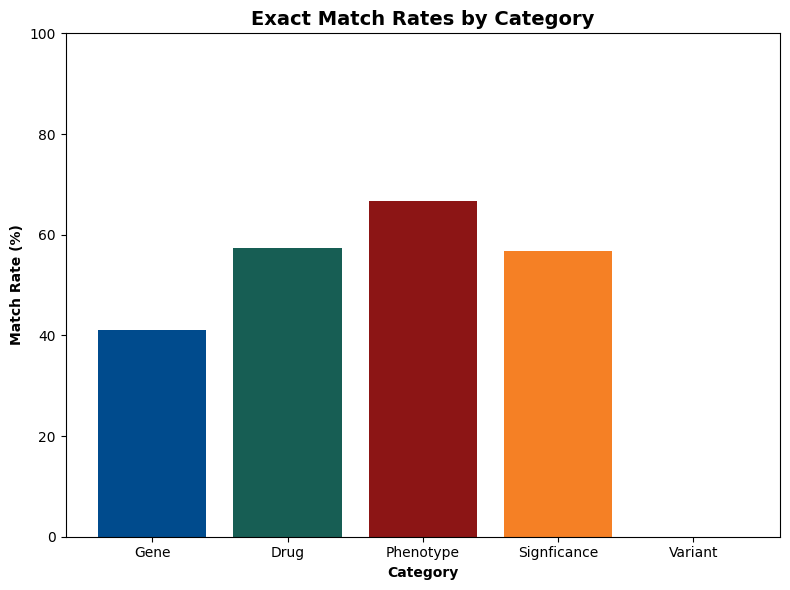

In [ ]:
import matplotlib.pyplot as plt
# 1. Bar plot to visualize match rates for Gene, Drug, and Phenotype
match_fields = ['Gene', 'Drug', 'Phenotype','Signficance',"Variant"]

match_rates = [match_stats['gene_match_rate'], match_stats['drug_match_rate'], match_stats['phenotype_match_rate'],match_stats['significance_match_rate'],match_stats['variant_match_rate']]

plt.figure(figsize=(8, 6))
plt.bar(match_fields, match_rates, color = ['#004B8D', '#175E54', '#8C1515', '#F58025','#5D4B3C']
)
plt.title('Exact Match Rates by Category', fontweight='bold', fontsize=14)

plt.ylabel('Match Rate (%)',fontweight="bold")
plt.xlabel('Category',fontweight='bold')
plt.ylim(0, 100)  # Ensure the y-axis goes from 0 to 100
plt.tight_layout()
plt.show()

# 2. Pie chart to visualize the exact vs partial match rates




# Example usage





# 3. Stacked bar plot for Exact Match, Partial Match, and Mismatch Rates


# If you want to see the aligned dataset for further inspection:
# df_aligned_pmid.head()

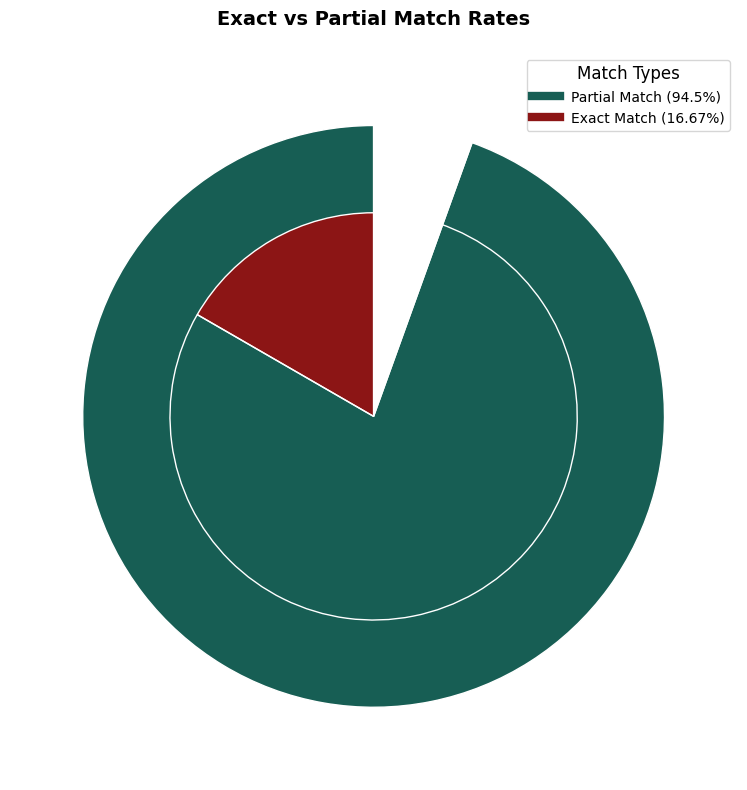

In [ ]:
import matplotlib.pyplot as plt

# Example match statistics

# Data for Partial Match (outer pie chart)
sizes_partial = [match_stats['partial_match_rate'], 100 - match_stats['partial_match_rate']]
colors_partial = ['#175E54', 'none']  # Stanford Green for relevant portion

# Data for Exact Match (inner pie chart)
sizes_exact = [match_stats['exact_match_rate'], 100 - match_stats['exact_match_rate']]
colors_exact = ['#8C1515', 'none']  # Cardinal Red for relevant portion

# Create the figure
plt.figure(figsize=(8, 8))

# Plot the larger pie chart (Partial Match)
plt.pie(
    sizes_partial,
    colors=colors_partial,
    startangle=90,
    radius=1.0,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    labels=None  # No direct labels, handled in legend
)

# Plot the smaller pie chart (Exact Match) on top
plt.pie(
    sizes_exact,
    colors=colors_exact,
    startangle=90,
    radius=0.7,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    labels=None  # No direct labels, handled in legend
)

# Add legend with appropriate colors
legend_labels = [
    f"Partial Match ({round(match_stats['partial_match_rate'],2)}%)",
    f"Exact Match ({round(match_stats['exact_match_rate'],3)}%)"
]
legend_colors = ['#175E54', '#8C1515']  # Match the colors used in the chart

plt.legend(
    handles=[
        plt.Line2D([0], [0], color=legend_colors[0], lw=6),  # Partial Match color
        plt.Line2D([0], [0], color=legend_colors[1], lw=6)   # Exact Match color
    ],
    labels=legend_labels,
    loc='upper right',
    fontsize=10,
    frameon=True,
    title="Match Types",
    title_fontsize=12
)

# Add a title
plt.title('Exact vs Partial Match Rates', fontweight = "bold",fontsize=14, pad=20)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


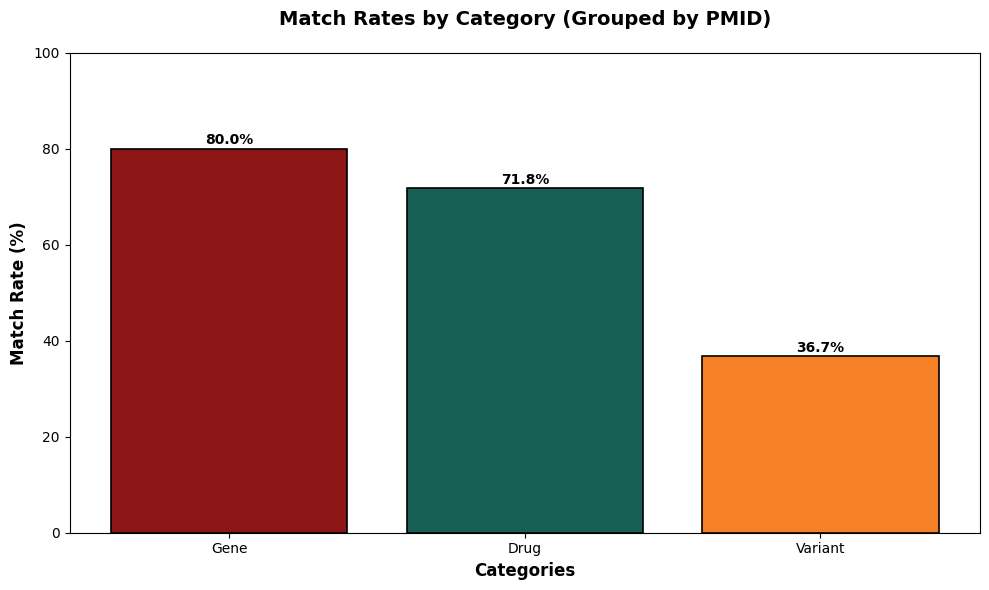

In [ ]:
import matplotlib.pyplot as plt

# Match rates grouped by PMID (these variables should be defined in your data)
# Example: average_gene_match_rate, average_variant_match_rate, average_drug_match_rate
categories = ['Gene',  'Drug','Variant']
match_rates = [average_gene_match_rate*100,  average_drug_match_rate*100,average_variant_match_rate*100,]

# Stanford-inspired colors for bars
colors = ['#8C1515', '#175E54', '#F58025']  # Cardinal Red, Stanford Green, Stanford Orange

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, match_rates, color=colors, edgecolor='black', linewidth=1.2)

# Add values on top of bars
for bar, rate in zip(bars, match_rates):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,  # Adjust height for the text
        f'{rate:.1f}%',  # Rounded percentage
        ha='center',
        fontweight="bold",
        fontsize=10,
        color='black'
    )

# Title and labels
plt.title('Match Rates by Category (Grouped by PMID)',fontweight="bold", fontsize=14, pad=20)
plt.ylabel('Match Rate (%)',fontweight="bold",fontsize=12)
plt.xlabel('Categories',fontweight="bold", fontsize=12)

# Adjust ticks for readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set y-axis limits
plt.ylim(0, 100)  # Assuming match rates are percentages

# Add grid for better readability


# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace the path with the correct file location in Colab)
wholecsv = pd.read_csv('/content/wholecsv.csv')

# Summarizing match statistics based on the pre-marked columns
match_columns = [
    'Match metabolizer',
    'Match significance',
    'Match all drug',
    'Match Any Drug',
    'Match gene',
    'Match phenotype',
    'Match population'
]

# Calculating the percentage of matches for each attribute
match_stats_new = wholecsv[match_columns].mean() * 100

# Adjusting the color scheme to be more neutral and less bright
plt.figure(figsize=(10, 6))
plt.bar(match_stats_new.index, match_stats_new.values, color=['#2E8B57', '#4682B4', '#6A5ACD', '#D2691E', '#556B2F', '#8B4513', '#2F4F4F'])
plt.title('Match Statistics for Different Attributes', fontsize=16)
plt.ylabel('Match Percentage (%)', fontsize=12)
plt.xlabel('Attributes', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


# Creating the table summarizing match statistics for the poster
table_data = match_stats_new.reset_index()
table_data.columns = ['Attribute', 'Match Percentage']

# Displaying the table for review
import ace_tools as tools; tools.display_dataframe_to_user(name="Match Statistics Table for Poster", dataframe=table_data)

# If you want to print the table to the console (optional):
print(table_data)


KeyError: "None of [Index(['Match metabolizer', 'Match significance', 'Match all drug',\n       'Match Any Drug', 'Match gene', 'Match phenotype', 'Match population'],\n      dtype='object')] are in the [columns]"

In [ ]:
#@title agent manager